In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
import itertools

In [8]:
# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_1259/603319519.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Application Data

In [11]:
applicationDF = pd.read_csv("application_data.csv")

In [12]:
applicationDF

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [13]:
applicationDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [14]:
applicationDF.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
applicationDF.shape

(307511, 122)

In [16]:
applicationDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [17]:
applicationDF.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# Data Cleaning & Imputation - Suggestions

In [18]:
# Check for missing values in percentage 

round(100 * applicationDF.isnull().mean(),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

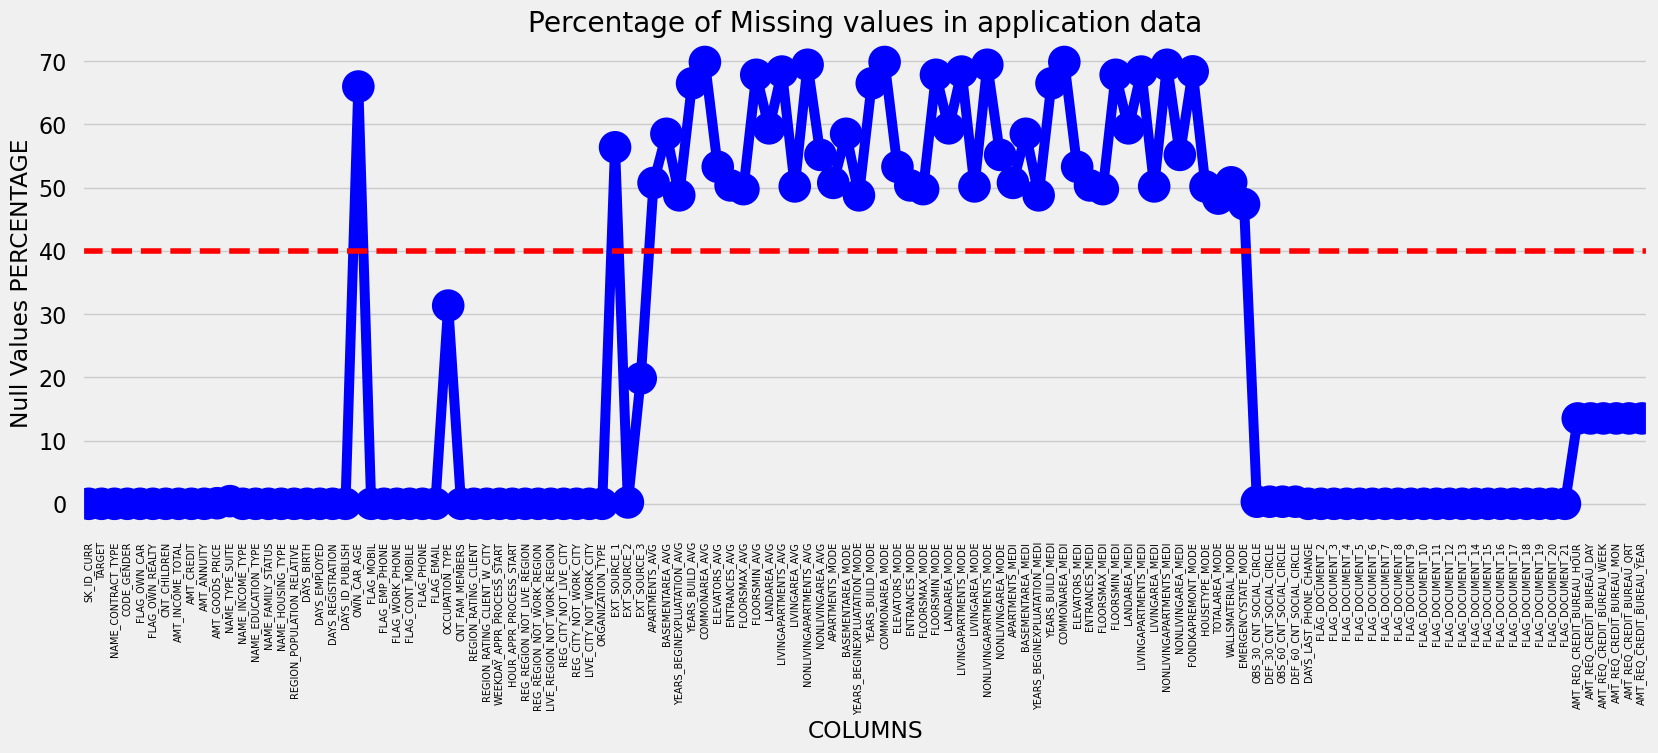

In [19]:
null_applicationDF = pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [20]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]
nullcol_40_application

Column Name  Null Values Percentage
21                   OWN_CAR_AGE               65.990810
41                  EXT_SOURCE_1               56.381073
44                APARTMENTS_AVG               50.749729
45              BASEMENTAREA_AVG               58.515956
46   YEARS_BEGINEXPLUATATION_AVG               48.781019
47               YEARS_BUILD_AVG               66.497784
48                COMMONAREA_AVG               69.872297
49                 ELEVATORS_AVG               53.295980
50                 ENTRANCES_AVG               50.348768
51                 FLOORSMAX_AVG               49.760822
52                 FLOORSMIN_AVG               67.848630
53                  LANDAREA_AVG               59.376738
54          LIVINGAPARTMENTS_AVG               68.354953
55                LIVINGAREA_AVG               50.193326
56       NONLIVINGAPARTMENTS_AVG               69.432963
57             NONLIVINGAREA_AVG               55.179164
58               APARTMENTS_MODE               50.749729
59             BASEMENTAREA_MODE               58.515956
60  YEARS_BEGINEXPLUATATION_MODE               48.781019
61              YEARS_BUILD_MODE               66.497784
62               COMMONAREA_MODE               69.872297
63                ELEVATORS_MODE               53.295980
64                ENTRANCES_MODE               50.348768
65                FLOORSMAX_MODE               49.760822
66                FLOORSMIN_MODE               67.848630
67                 LANDAREA_MODE               59.376738
68         LIVINGAPARTMENTS_MODE               68.354953
69               LIVINGAREA_MODE               50.193326
70      NONLIVINGAPARTMENTS_MODE               69.432963
71            NONLIVINGAREA_MODE               55.179164
72               APARTMENTS_MEDI               50.749729
73             BASEMENTAREA_MEDI               58.515956
74  YEARS_BEGINEXPLUATATION_MEDI               48.781019
75              YEARS_BUILD_MEDI               66.497784
76               COMMONAREA_MEDI               69.872297
77                ELEVATORS_MEDI               53.295980
78                ENTRANCES_MEDI               50.348768
79                FLOORSMAX_MEDI               49.760822
80                FLOORSMIN_MEDI               67.848630
81                 LANDAREA_MEDI               59.376738
82         LIVINGAPARTMENTS_MEDI               68.354953
83               LIVINGAREA_MEDI               50.193326
84      NONLIVINGAPARTMENTS_MEDI               69.432963
85            NONLIVINGAREA_MEDI               55.179164
86            FONDKAPREMONT_MODE               68.386172
87                HOUSETYPE_MODE               50.176091
88                TOTALAREA_MODE               48.268517
89            WALLSMATERIAL_MODE               50.840783
90           EMERGENCYSTATE_MODE               47.398304

In [21]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

# Analyze & Delete Unnecessary Columns in application_data

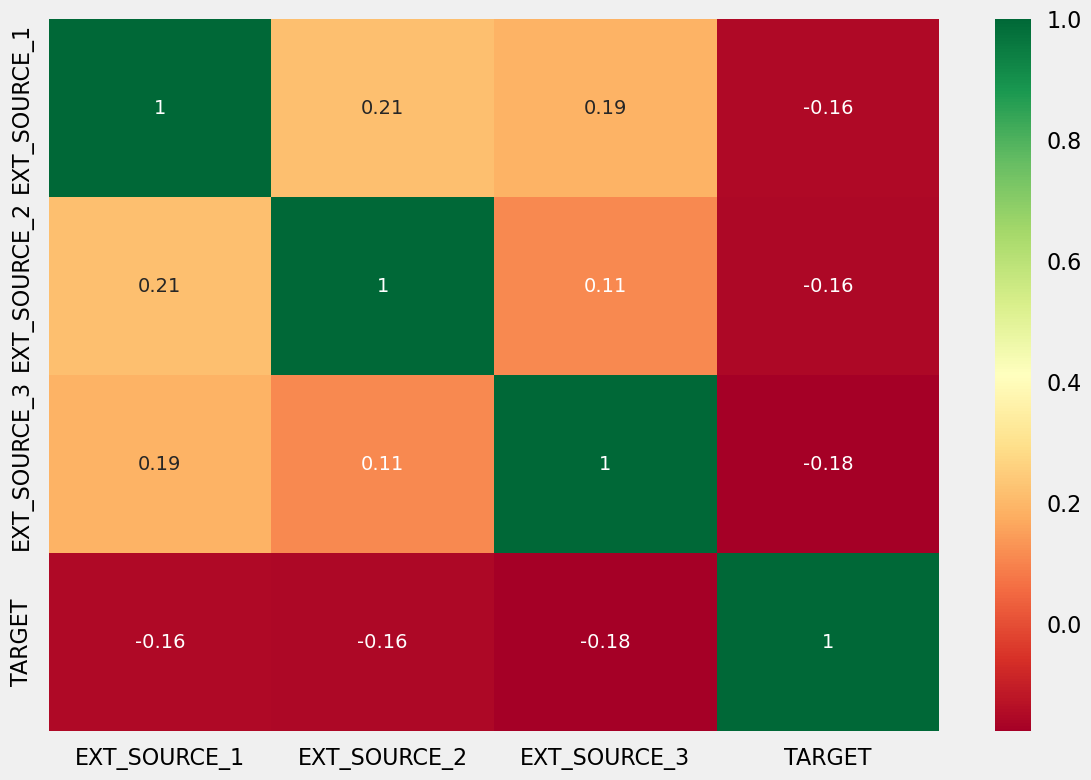

In [22]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = applicationDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

 Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [23]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

51

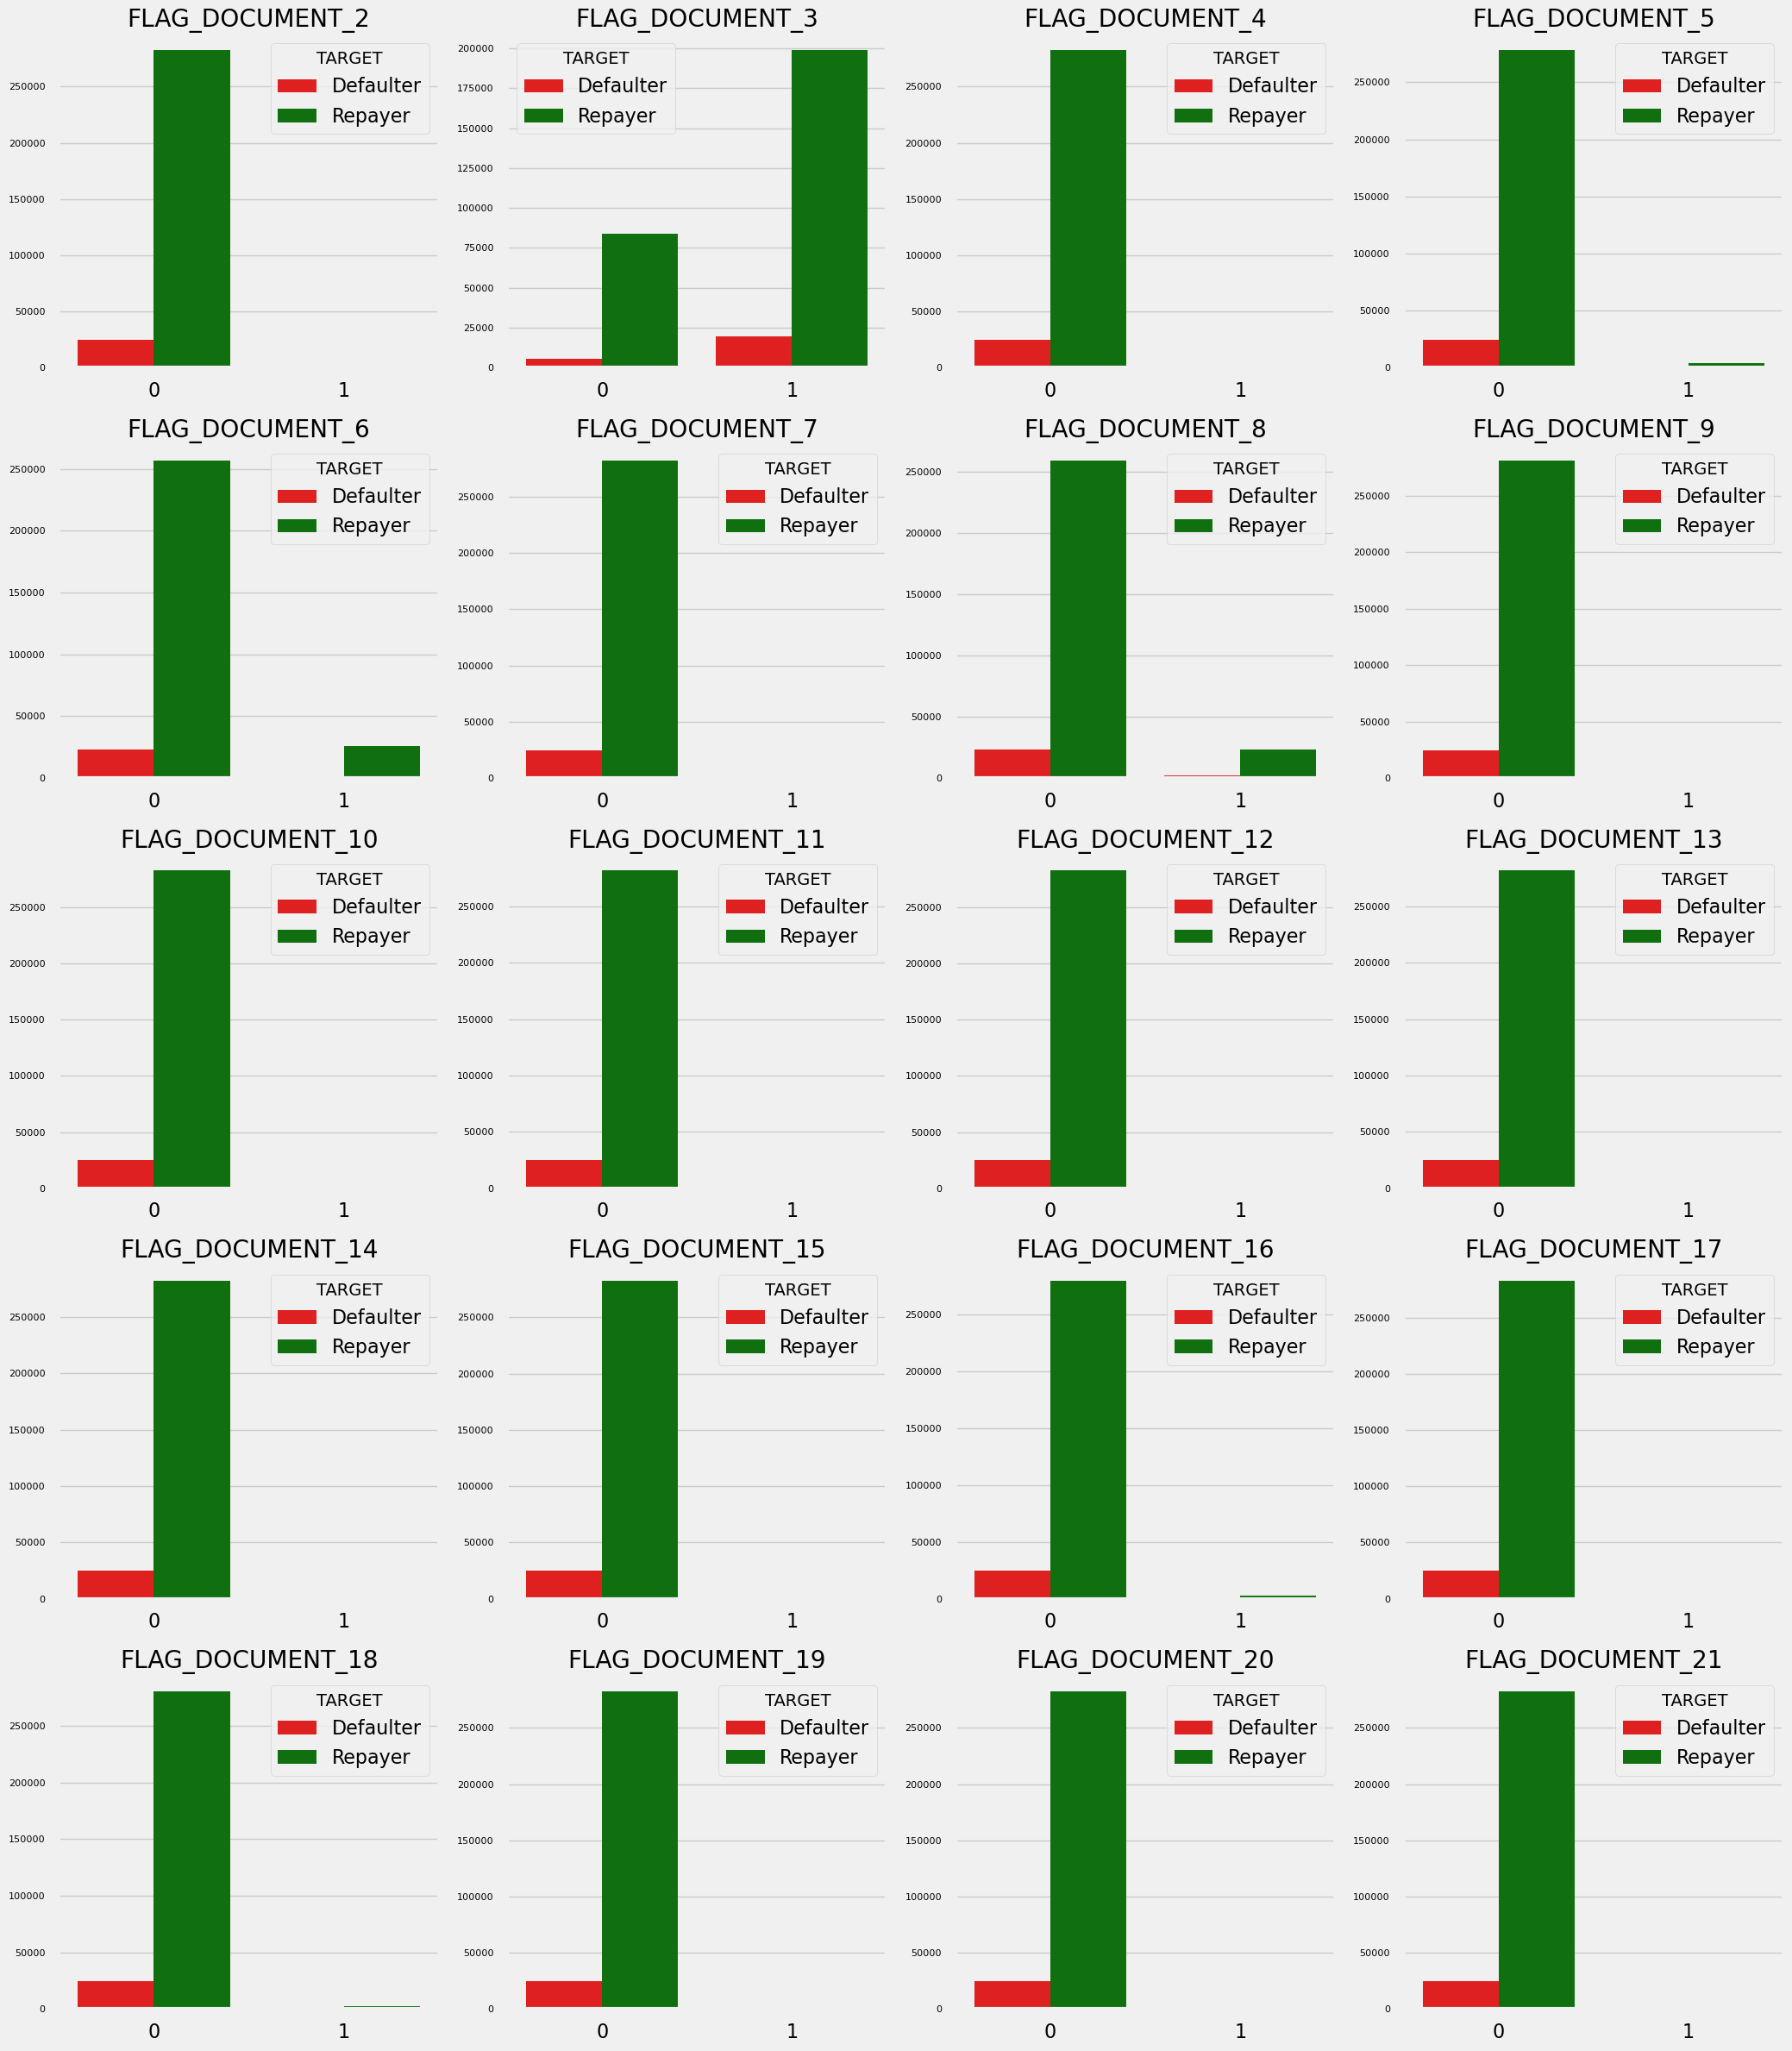

In [24]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = applicationDF[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(21, 24))

for i, (col, ax) in enumerate(zip(col_Doc, axes.flatten())):
    sns.countplot(x=col, hue="TARGET", data=df_flag, palette=["r", "g"], ax=ax)
    ax.tick_params(axis='y', labelsize=8)  # Set font size for y-axis labels
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(col)

plt.tight_layout()
plt.show()

The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [25]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

In [26]:
Unwanted_application

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

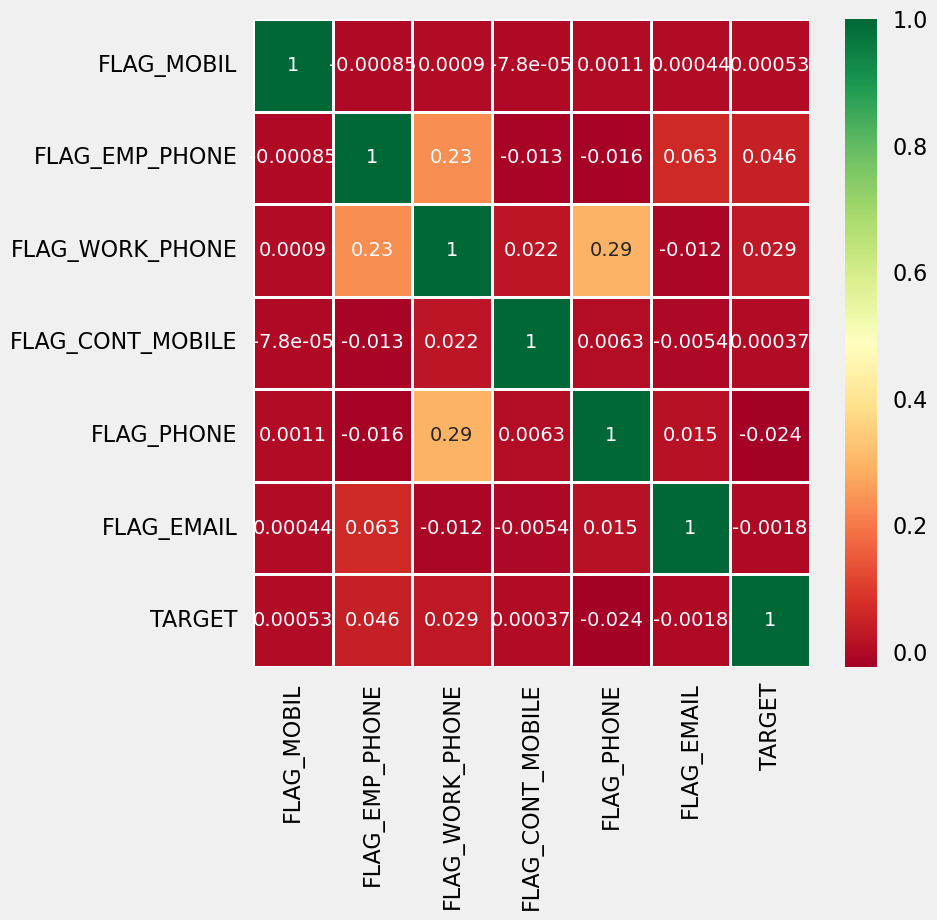

In [27]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = applicationDF[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [28]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

Total 76 columns can be deleted from applicationDF

In [29]:
# Dropping the unnecessary columns from applicationDF
applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)

In [30]:
# Inspecting the dataframe after removal of unnecessary columns
applicationDF.shape

(307511, 46)

In [31]:
# inspecting the column types after removal of unnecessary columns
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

After deleting unnecessary columns, there are 46 columns remaining in applicationDF

# Standardize Values

## Strategy for applicationDF:
    > Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days     cannot be negative.
    > Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns
    > Categorize the amount variables into bins
    > Convert region rating column and few other columns to categorical

In [32]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    applicationDF[col] = abs(applicationDF[col])

In [33]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
applicationDF['AMT_INCOME_TOTAL']=applicationDF['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

applicationDF['AMT_INCOME_RANGE']=pd.cut(applicationDF['AMT_INCOME_TOTAL'],bins,labels=slot)

In [34]:
applicationDF['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [35]:
# Creating bins for Credit amount
applicationDF['AMT_CREDIT']=applicationDF['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

applicationDF['AMT_CREDIT_RANGE']=pd.cut(applicationDF['AMT_CREDIT'],bins=bins,labels=slots)

In [36]:
#checking the binning of data and % of data in each category
applicationDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: proportion, dtype: float64

More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [37]:
# Creating bins for Age
applicationDF['AGE'] = applicationDF['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

applicationDF['AGE_GROUP']=pd.cut(applicationDF['AGE'],bins=bins,labels=slots)

In [38]:
#checking the binning of data and % of data in each category
applicationDF['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [39]:
# Creating bins for Employement Time
applicationDF['YEARS_EMPLOYED'] = applicationDF['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

applicationDF['EMPLOYMENT_YEAR']=pd.cut(applicationDF['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [40]:
#checking the binning of data and % of data in each category
applicationDF['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: proportion, dtype: float64

More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience

In [41]:
#Checking the number of unique values each column possess to identify categorical columns
applicationDF.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

# Data Type Conversion

In [42]:
# inspecting the column types if they are in correct data type using the above result.
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.

In [43]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    applicationDF[col] =pd.Categorical(applicationDF[col])

In [44]:
# inspecting the column types if the above conversion is reflected
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

# Null Value Data Imputation

## Strategy for applicationDF:
    > To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.
    > To impute null values in categorical variables which has higher null percentage, a new category is created.
    > To impute null values in numerical variables which has lower null percentage, median() is used as
    > There are no outliers in the columns
    > Mean returned decimal values and median returned whole numbers and the columns were number of requests

In [45]:
# checking the null value % of each column in applicationDF dataframe
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:

In [46]:
applicationDF['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [47]:
applicationDF['NAME_TYPE_SUITE'].fillna((applicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:

In [48]:
applicationDF['OCCUPATION_TYPE'] = applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:

In [49]:
applicationDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

Impute with median as mean has decimals and this is number of requests

In [50]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    applicationDF[col].fillna(applicationDF[col].median(),inplace = True)

In [58]:
# checking the null value % of each column in previousDF dataframe
round(applicationDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.

# Identifying the outliers

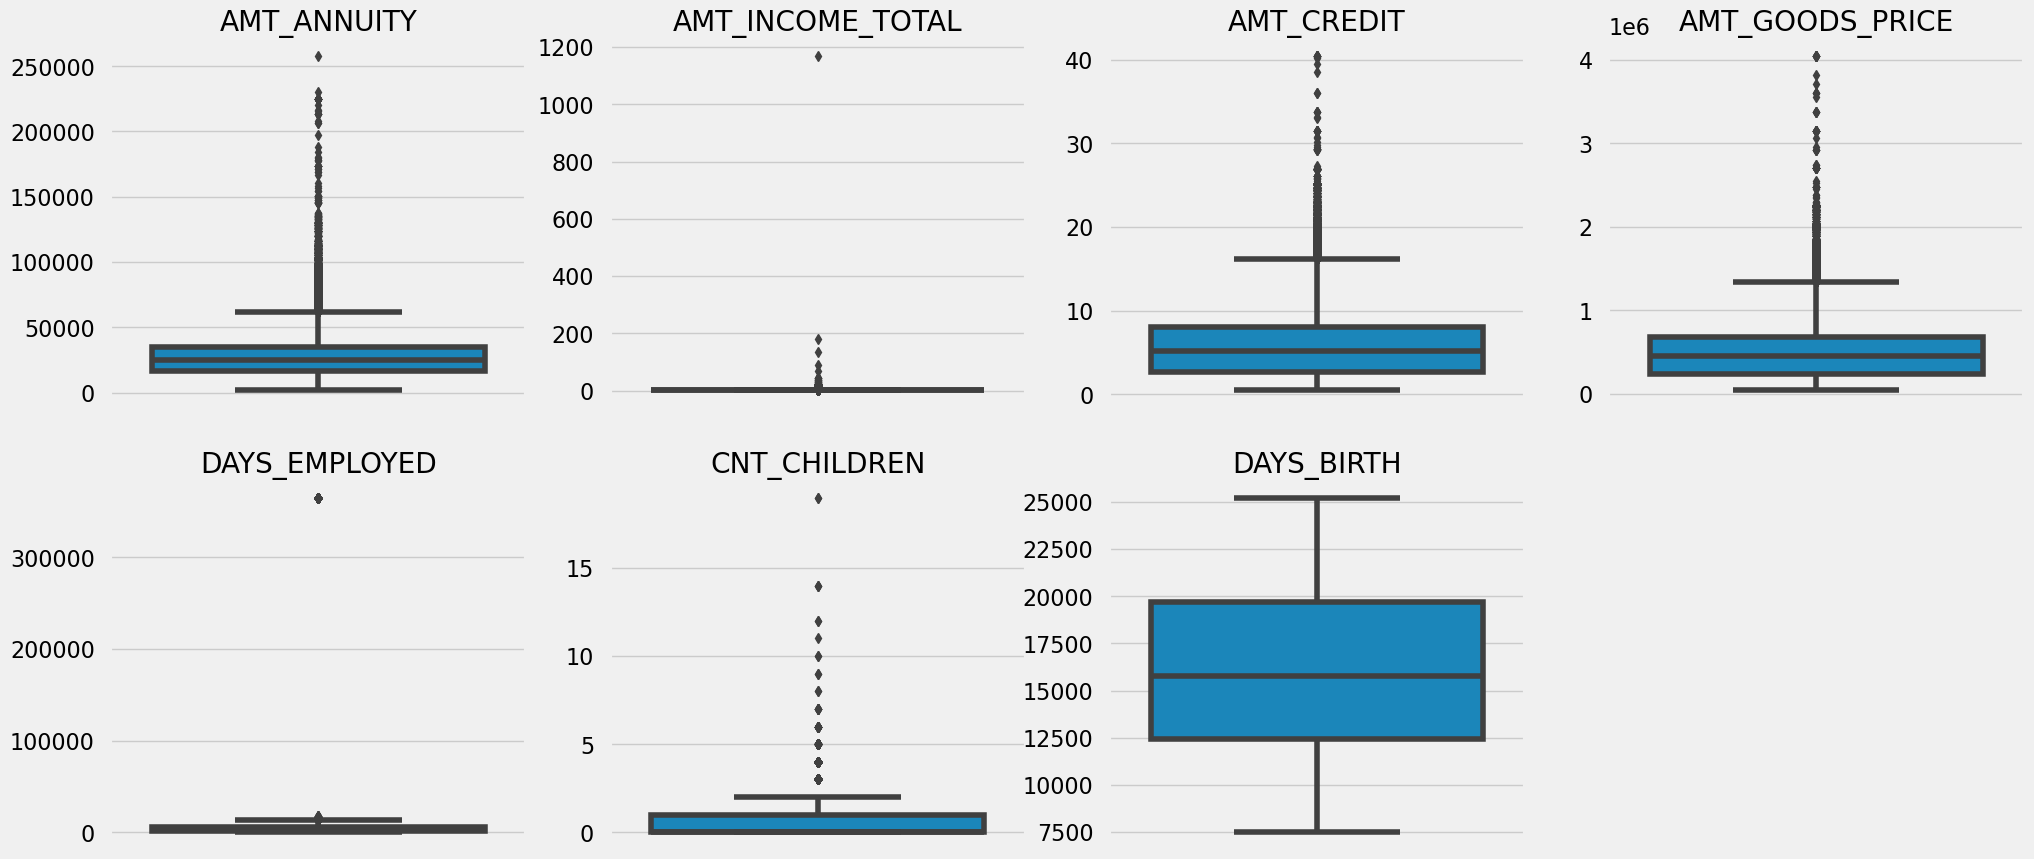

In [52]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

It can be seen that in current application data


1.AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

2.AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.

3.DAYS_BIRTH has no outliers which means the data available is reliable.

4.DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [53]:
applicationDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE  \
count  307499.000000     307511.000000  307511.000000     3.072330e+05   
mean    27108.573909          1.687979       5.990260     5.383962e+05   
std     14493.737315          2.371231       4.024908     3.694465e+05   
min      1615.500000          0.256500       0.450000     4.050000e+04   
25%     16524.000000          1.125000       2.700000     2.385000e+05   
50%     24903.000000          1.471500       5.135310     4.500000e+05   
75%     34596.000000          2.025000       8.086500     6.795000e+05   
max    258025.500000       1170.000000      40.500000     4.050000e+06   

          DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED  
count  307511.000000  307511.000000  307511.000000  
mean    16036.995067       0.417052   67724.742149  
std      4363.988632       0.722121  139443.751806  
min      7489.000000       0.000000       0.000000  
25%     12413.000000       0.000000     933.000000  
50%     15750.000000       0.000000    2219.000000  
75%     19682.000000       1.000000    5707.000000  
max     25229.000000      19.000000  365243.000000

In [191]:
# applicationDF.to_csv('application_df.csv', index=False)

# Previous Application Data

In [54]:
previousDF = pd.read_csv("previous_application.csv")

In [55]:
previousDF

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   

In [56]:
previousDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [57]:
previousDF.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [59]:
previousDF.shape

(1670214, 37)

In [60]:
previousDF.size

61797918

In [61]:
previousDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [62]:
previousDF.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

# Data Cleaning & Imputation - Suggestions

In [63]:
# Check for missing values in percentage 

round(100 * previousDF.isnull().mean(),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

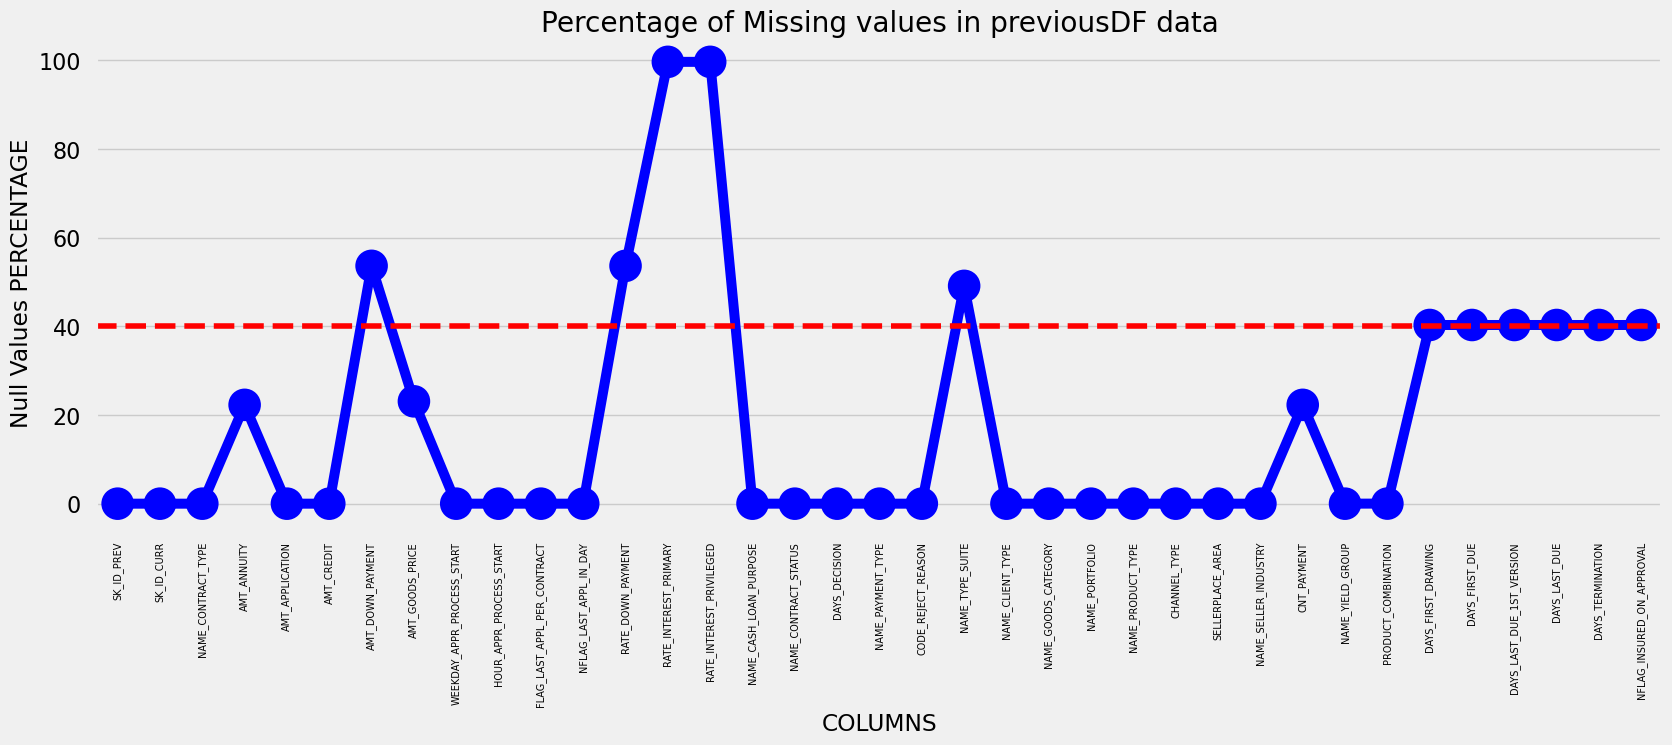

In [64]:
null_previousDF = pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
null_previousDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_previousDF,color ='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in previousDF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [65]:
# more than or equal to 40% empty rows columns
nullcol_40_previous = null_previousDF[null_previousDF["Null Values Percentage"]>=40]
nullcol_40_previous

Column Name  Null Values Percentage
6            AMT_DOWN_PAYMENT               53.636480
12          RATE_DOWN_PAYMENT               53.636480
13      RATE_INTEREST_PRIMARY               99.643698
14   RATE_INTEREST_PRIVILEGED               99.643698
20            NAME_TYPE_SUITE               49.119754
31         DAYS_FIRST_DRAWING               40.298129
32             DAYS_FIRST_DUE               40.298129
33  DAYS_LAST_DUE_1ST_VERSION               40.298129
34              DAYS_LAST_DUE               40.298129
35           DAYS_TERMINATION               40.298129
36  NFLAG_INSURED_ON_APPROVAL               40.298129

In [66]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_previous)

11

Total of 11 columns are there which have more than 40% null values. These columns can be deleted. Before deleting these columns, let's review if there are more columns which can be dropped or not

# Analyze & Delete Unnecessary Columns in previousDF

In [67]:
# Getting the 11 columns which has more than 40% unknown
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [68]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [69]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

15

Total 15 columns can be deleted from previousDF

In [70]:
# Dropping the unnecessary columns from previous
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)
# Inspecting the dataframe after removal of unnecessary columns
previousDF.shape

(1670214, 22)

In [71]:
# inspecting the column types after after removal of unnecessary columns
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

After deleting unnecessary columns, there are 22 columns remaining in previousDF

# Standardize Values

## Strategy for previousDF:

    > Convert DAYS_DECISION from negative to positive values and create categorical bins columns.
    > Convert loan purpose and few other columns to categorical.

In [72]:
#Checking the number of unique values each column possess to identify categorical columns
previousDF.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [73]:
# inspecting the column types if the above conversion is reflected
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [74]:
#Converting negative days to positive days 
previousDF['DAYS_DECISION'] = abs(previousDF['DAYS_DECISION'])

In [75]:
#age group calculation e.g. 388 will be grouped as 300-400
previousDF['DAYS_DECISION_GROUP'] = (previousDF['DAYS_DECISION']-(previousDF['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previousDF['DAYS_DECISION'] - (previousDF['DAYS_DECISION'] % 400)) + (previousDF['DAYS_DECISION'] % 400) + (400 - (previousDF['DAYS_DECISION'] % 400))).astype(str)

In [76]:
previousDF['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

DAYS_DECISION_GROUP
0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: proportion, dtype: float64

Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision

In [77]:
#Converting Categorical columns from Object to categorical 
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    previousDF[col] =pd.Categorical(previousDF[col])

In [78]:
# inspecting the column types after conversion
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

# Null Value Data Imputation

## Strategy for applicationDF:
    > To impute null values in numerical column, we analysed the loan status and assigned values.
    > To impute null values in continuous variables, we plotted the distribution of the columns and used
        > median if the distribution is skewed
        > mode if the distribution pattern is preserved.

In [79]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

Impute AMT_ANNUITY with median as the distribution is greatly skewed:

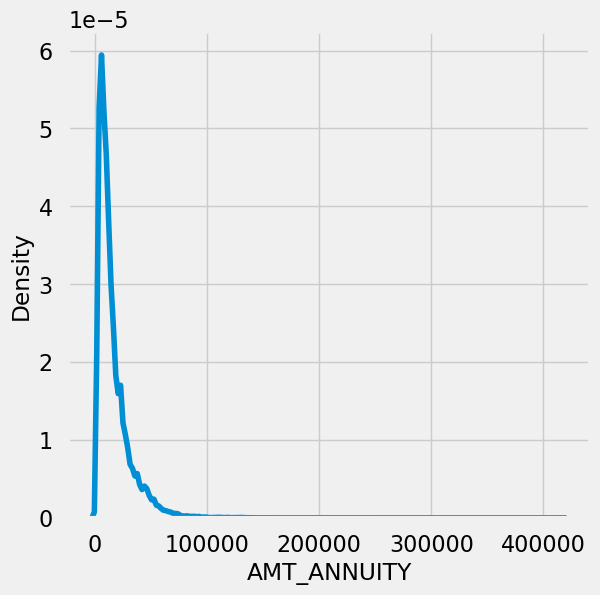

In [80]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_ANNUITY'])
plt.show()

There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.

In [81]:
previousDF['AMT_ANNUITY'].fillna(previousDF['AMT_ANNUITY'].median(),inplace = True)

Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:

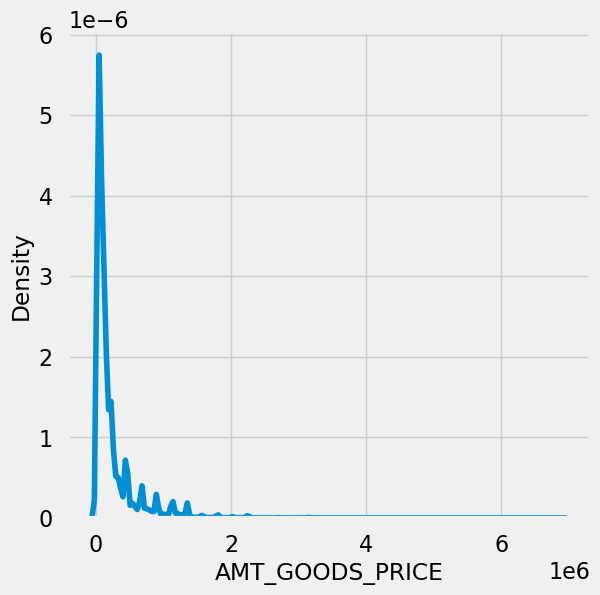

In [82]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])])
plt.show()

There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.

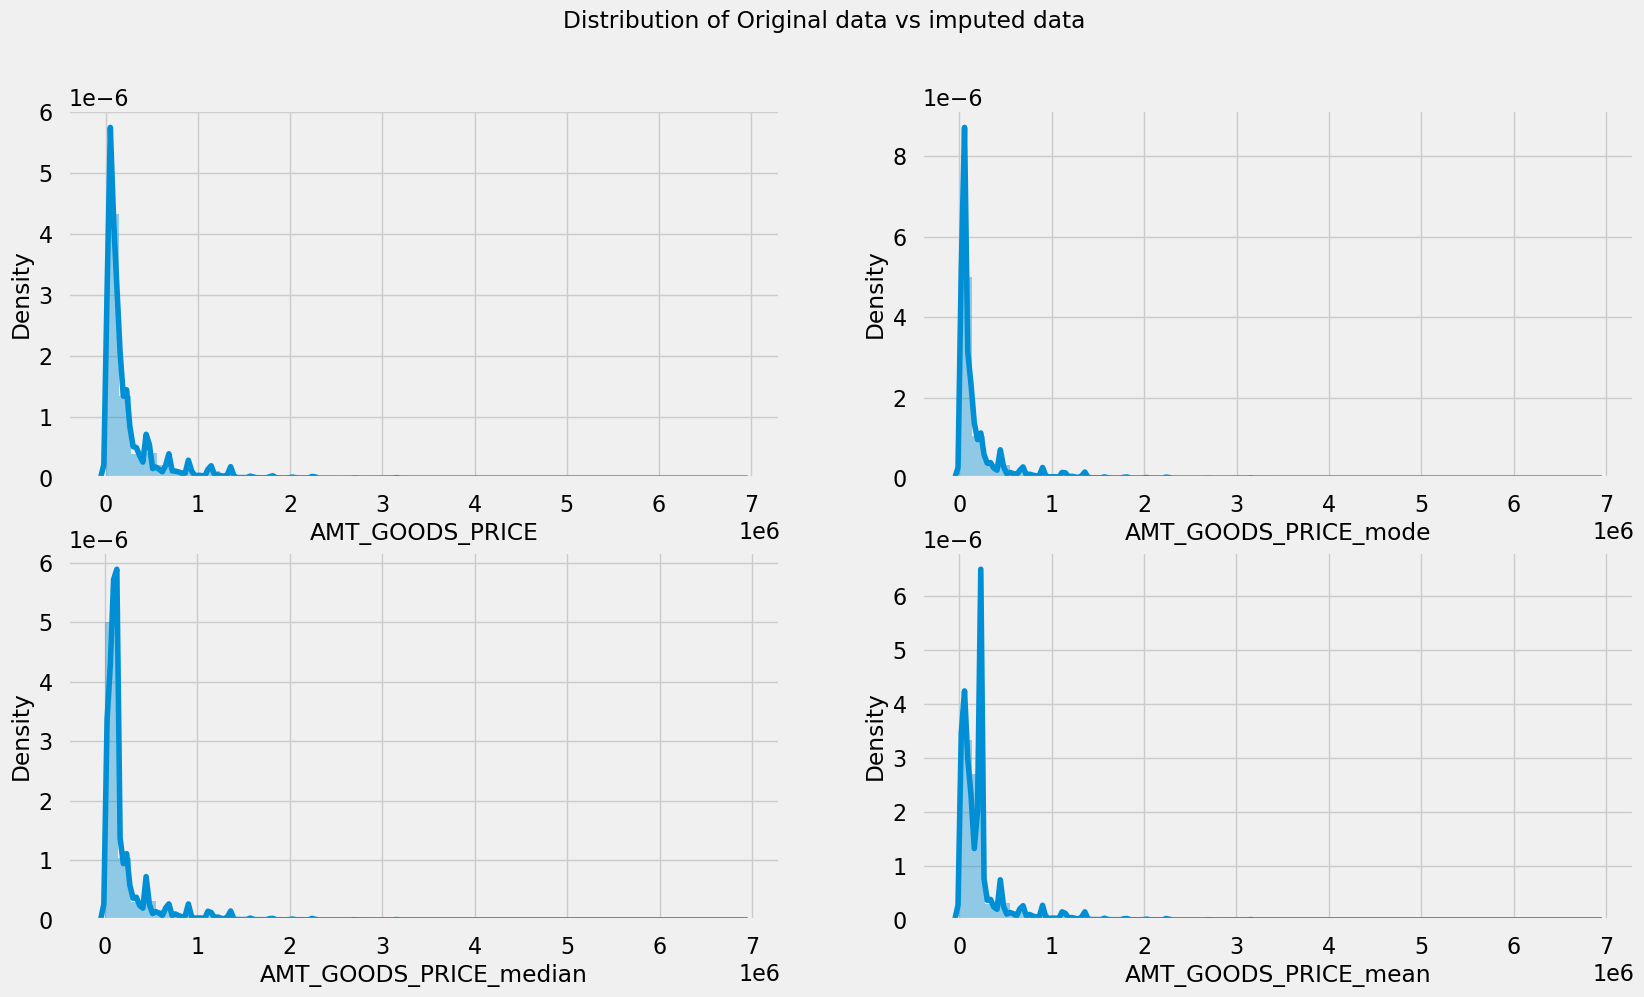

In [83]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

The original distribution is closer with the distribution of data imputed with mode in this case

In [84]:
previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)

Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [85]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [86]:
previousDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [87]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.

# Identifying the outliers

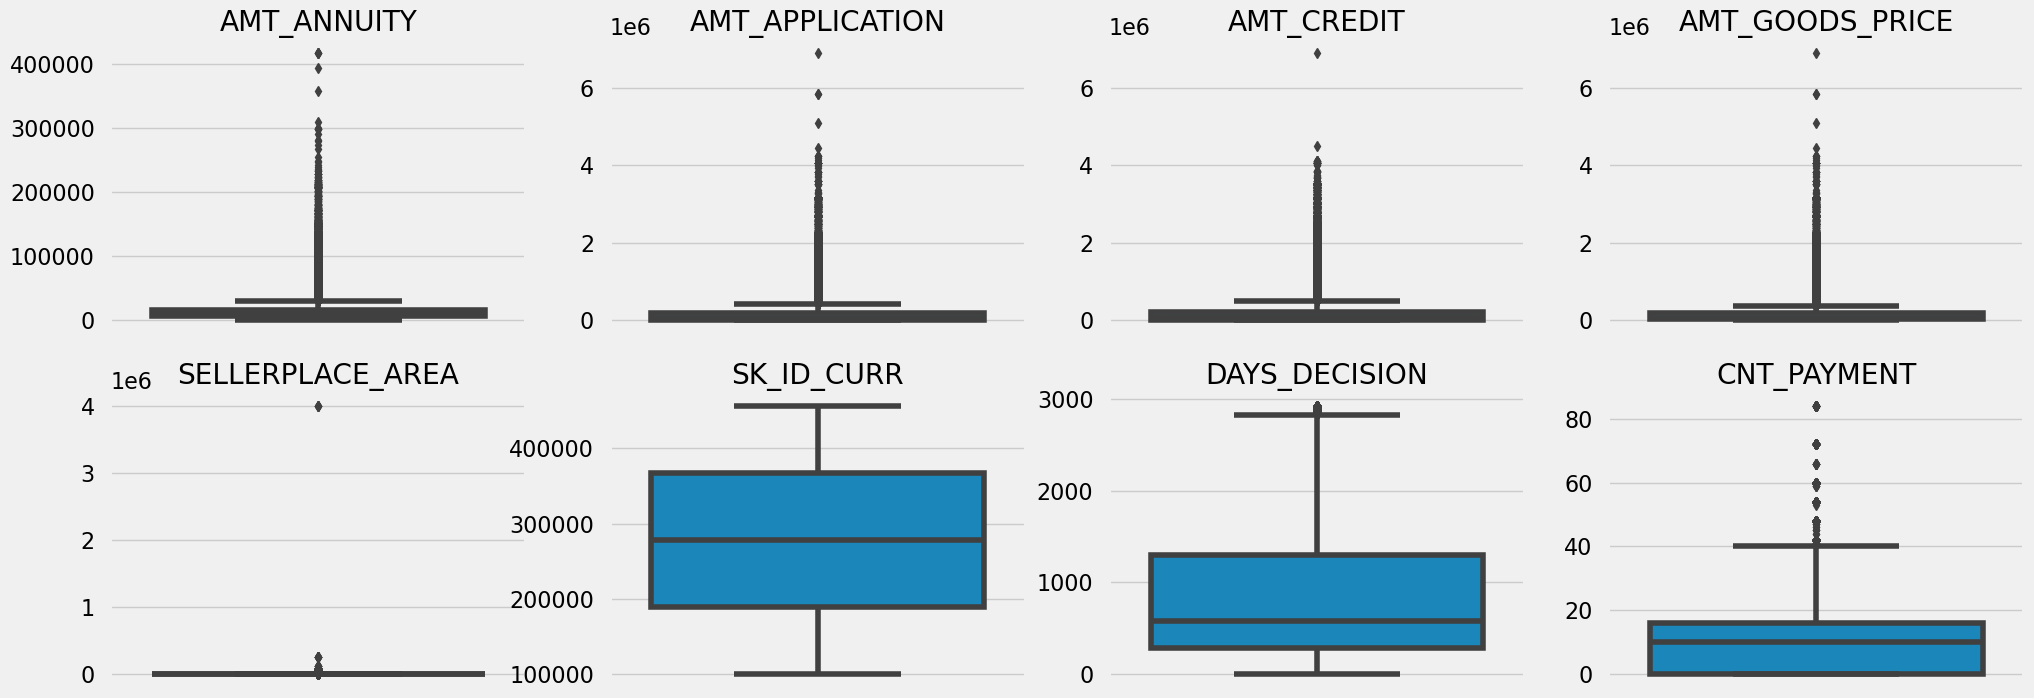

In [88]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

It can be seen that in previous application data


1.AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.

2.CNT_PAYMENT has few outlier values.

3.SK_ID_CURR is an ID column and hence no outliers.

4.DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

In [89]:
previousDF[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06   
mean   1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05   
std    1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04   
50%    1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04   
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05   
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION  
count      1.670214e+06  1.670214e+06   1.670214e+06  
mean       3.139511e+02  1.247621e+01   8.806797e+02  
std        7.127443e+03  1.447588e+01   7.790997e+02  
min       -1.000000e+00  0.000000e+00   1.000000e+00  
25%       -1.000000e+00  0.000000e+00   2.800000e+02  
50%        3.000000e+00  1.000000e+01   5.810000e+02  
75%        8.200000e+01  1.600000e+01   1.300000e+03  
max        4.000000e+06  8.400000e+01   2.922000e+03

In [190]:
# previousDF.to_csv('previous_df.csv', index=False)

# EDA Analysis

The data analysis flow has been planned in following way :

Imbalance in Data

Categorical Data Analysis

    Categorical segmented Univariate Analysis
    
    Categorical Bi/Multivariate analysis
Numeric Data Analysis

    Bi-furcation of databased based on TARGET data
    
    Correlation Matrix
    
    Numerical segmented Univariate Analysis
    
    Numerical Bi/Multivariate analysis

### Imbalance Analysis

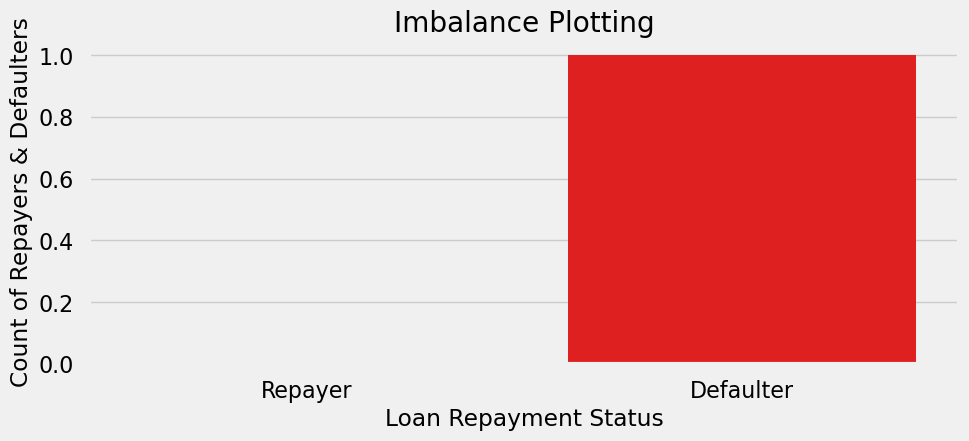

In [90]:
Imbalance = applicationDF["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10, 4))
x = ['Repayer', 'Defaulter']
sns.barplot(x=x, y="TARGET", data=Imbalance, palette=['g', 'r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [91]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 0.00 and 100.00
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 0.00 : 1 (approx)


In [92]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = applicationDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = applicationDF[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [93]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [94]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=applicationDF, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [95]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [96]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

### Categorical Variables Analysis

#### Segmented Univariate Analysis

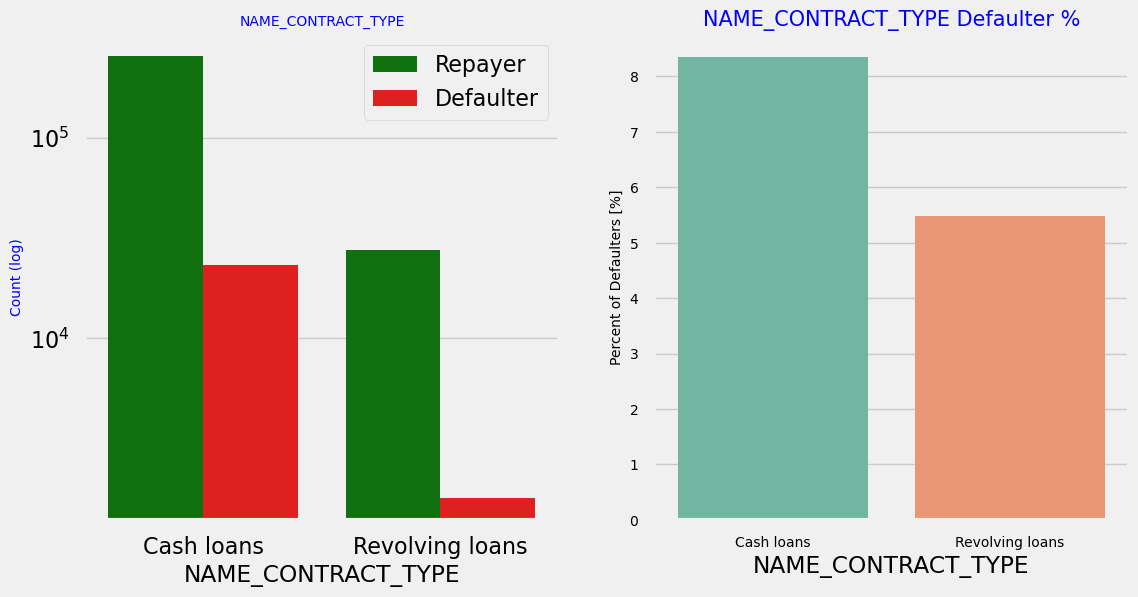

In [97]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

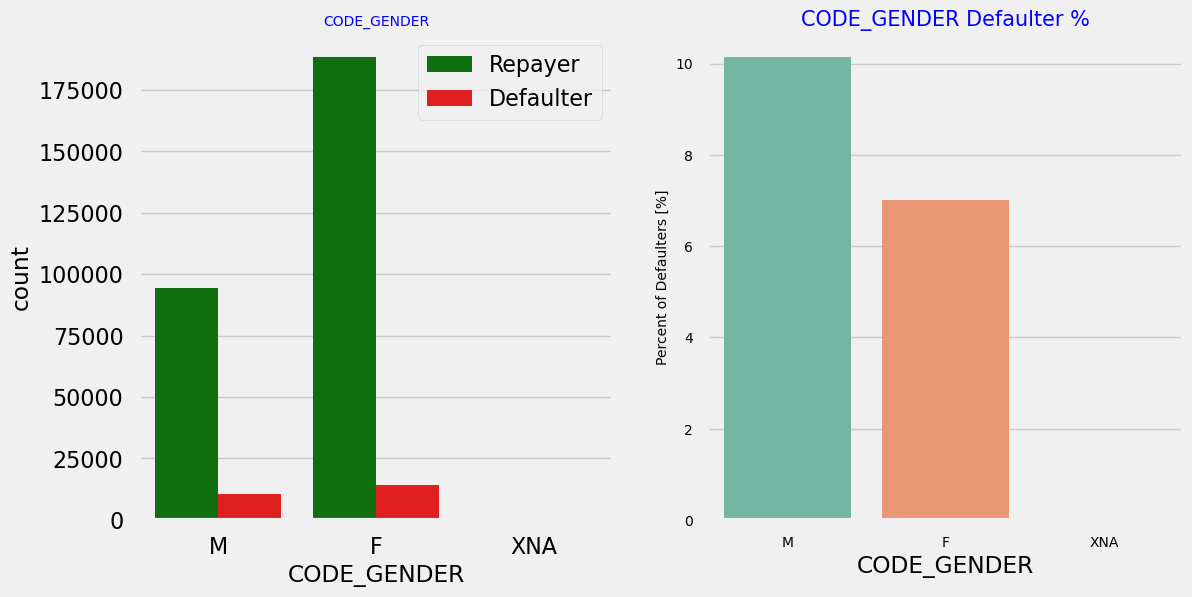

In [98]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (app.10%), comparing with women (app.7%)

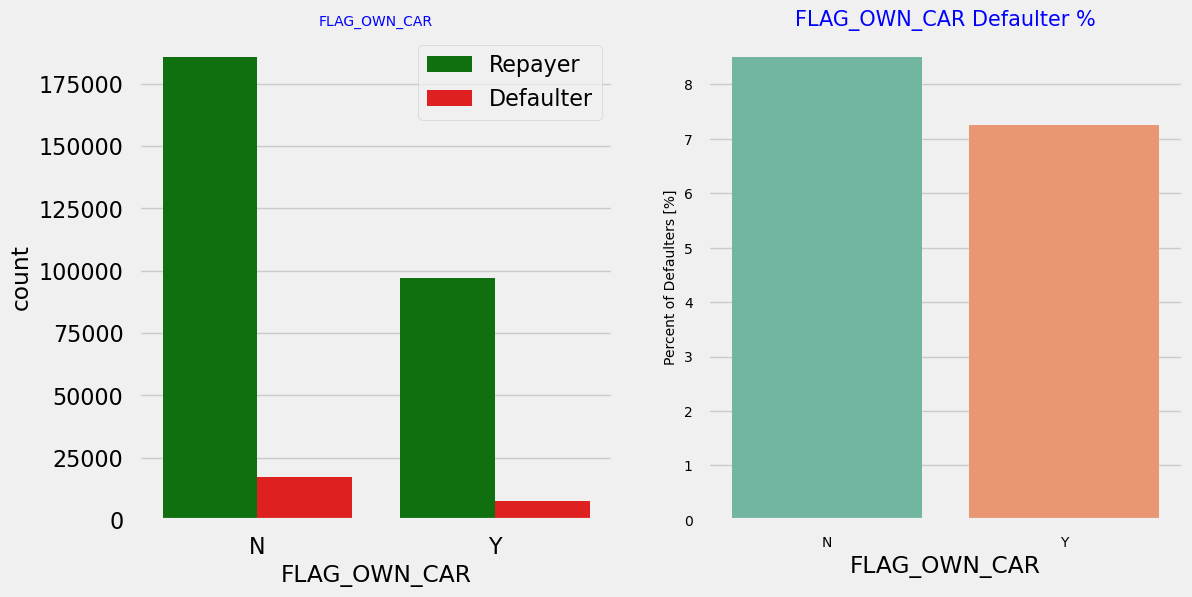

In [99]:

# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

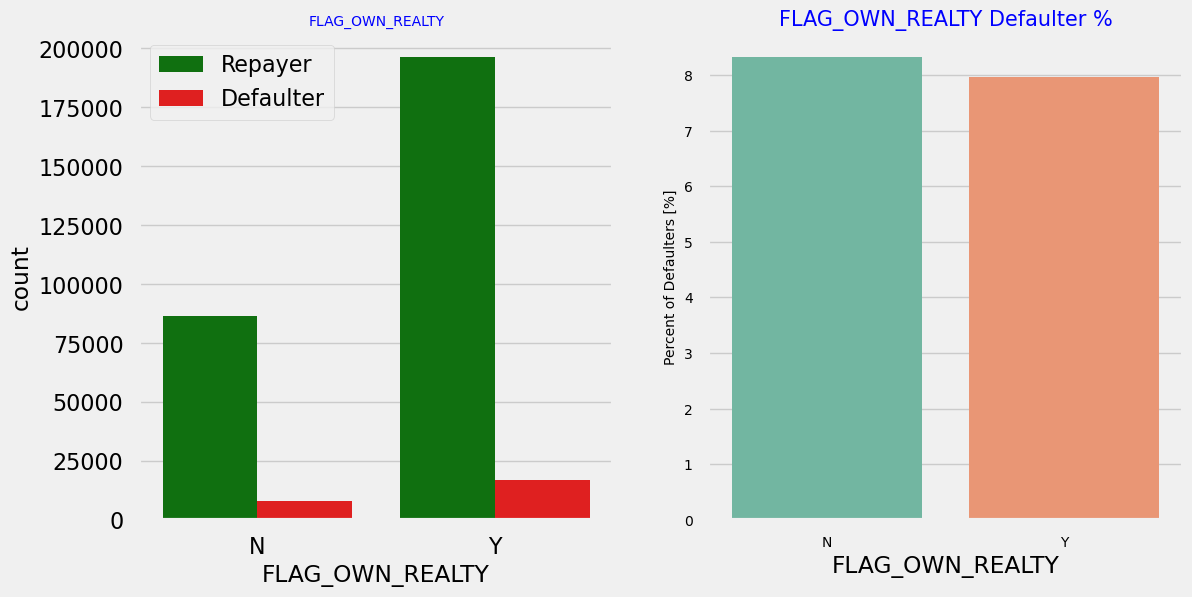

In [100]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (app.8%). Thus there is no correlation between owning a reality and defaulting the loan.

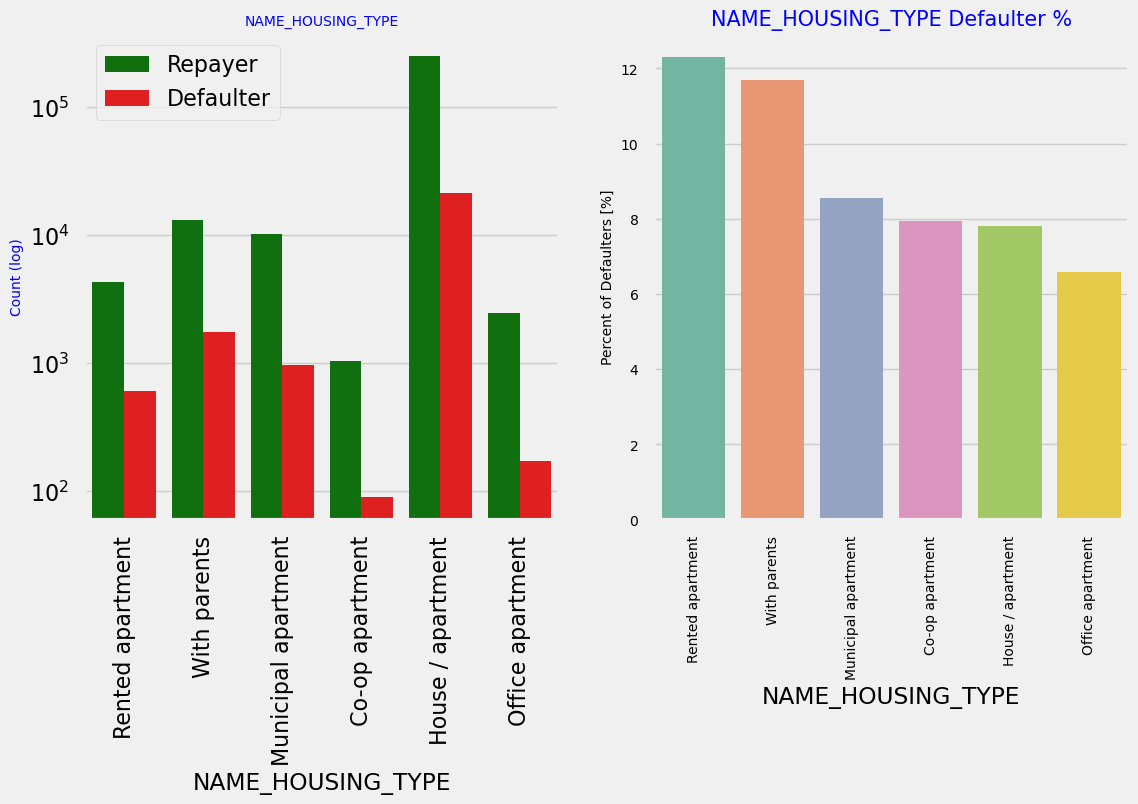

In [101]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

1.Majority of people live in House/apartment

2.People living in office apartments have lowest default rate

3.People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

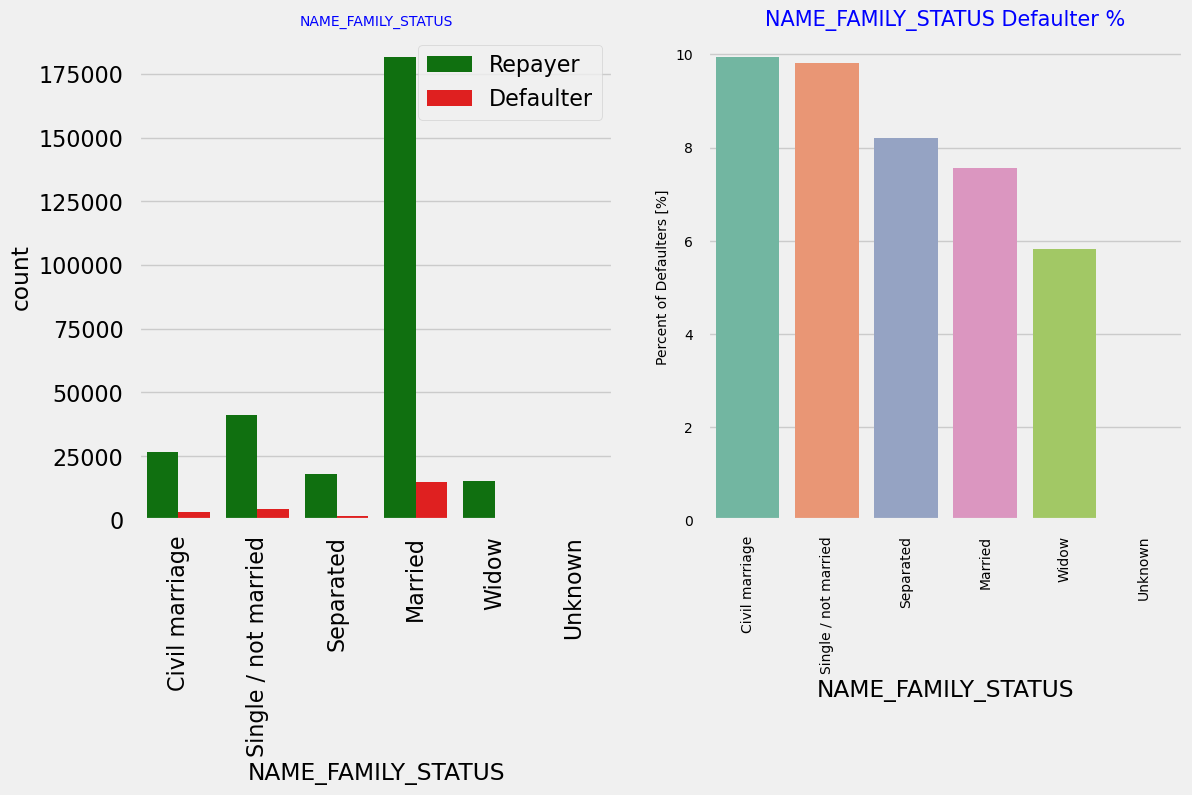

In [102]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

1.Most of the people who have taken loan are married, followed by Single/not married and civil marriage

2.In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

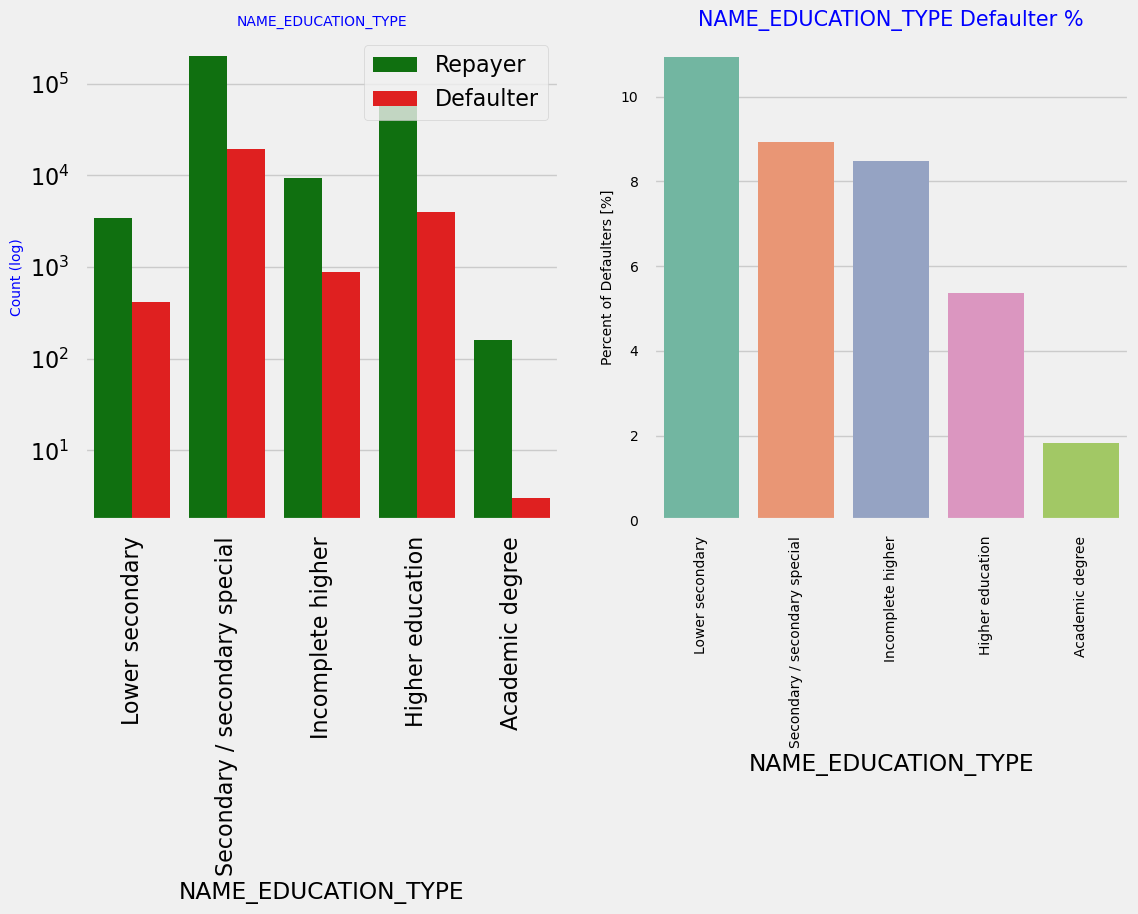

In [103]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

1.Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree

2.The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.

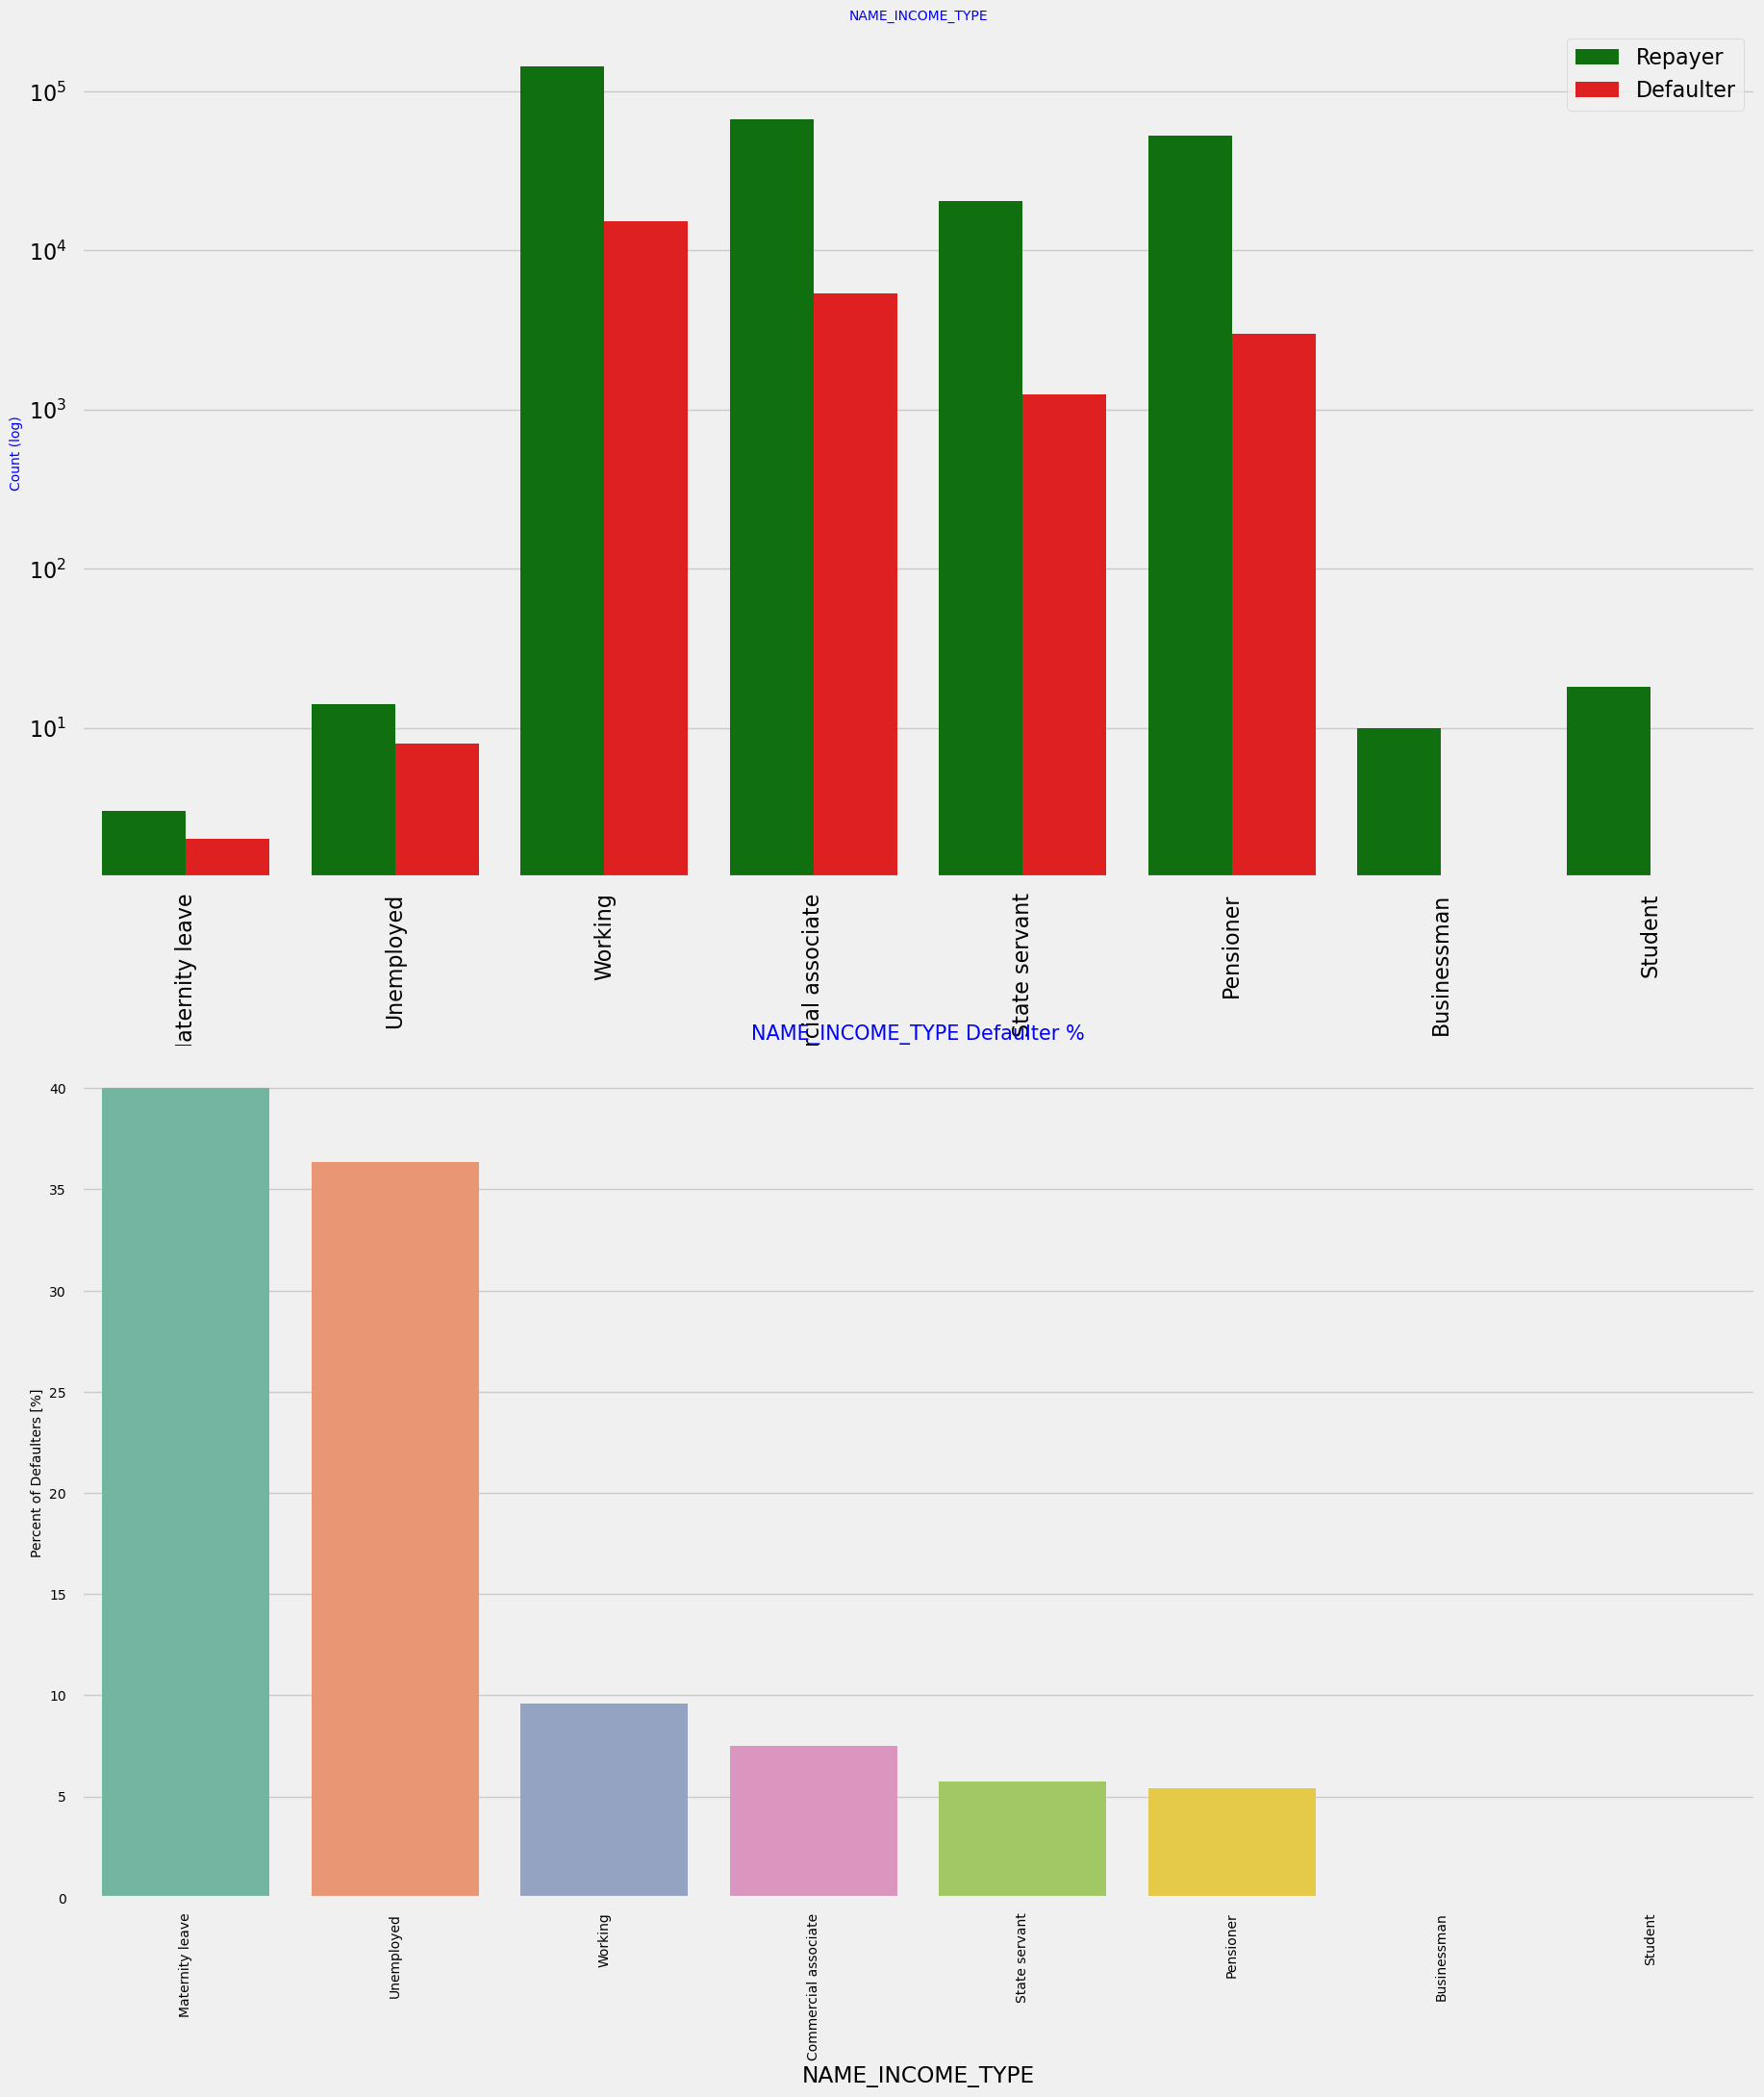

In [104]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

1.Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.

2.The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

3.Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

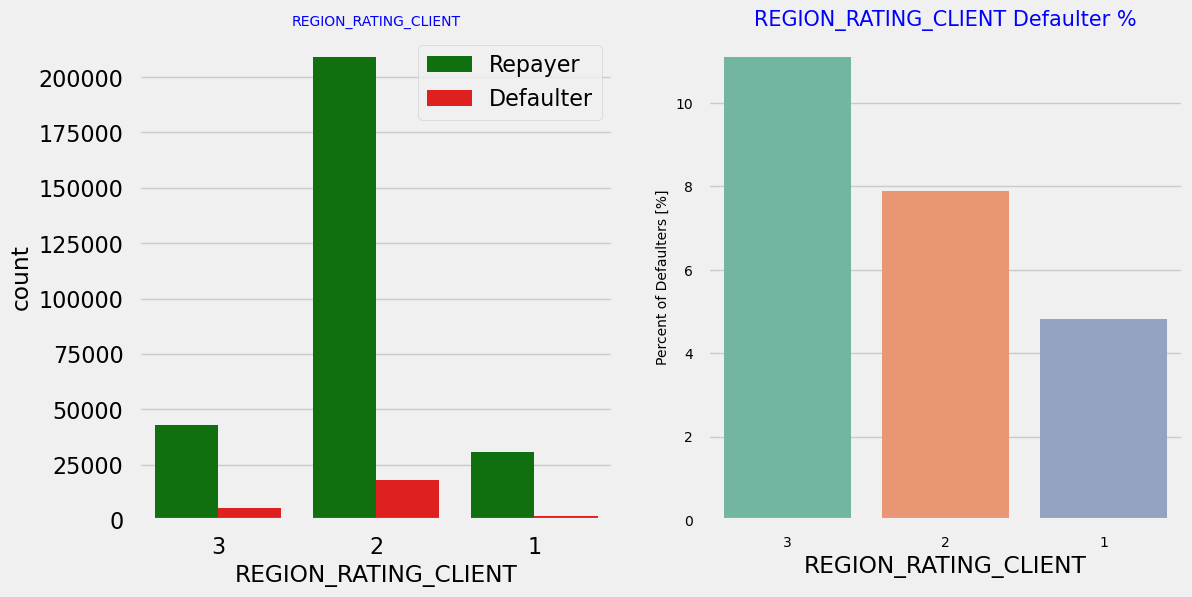

In [105]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

1.Most of the applicants are living in Region_Rating 2 place.

2.Region Rating 3 has the highest default rate (11%)

3.Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

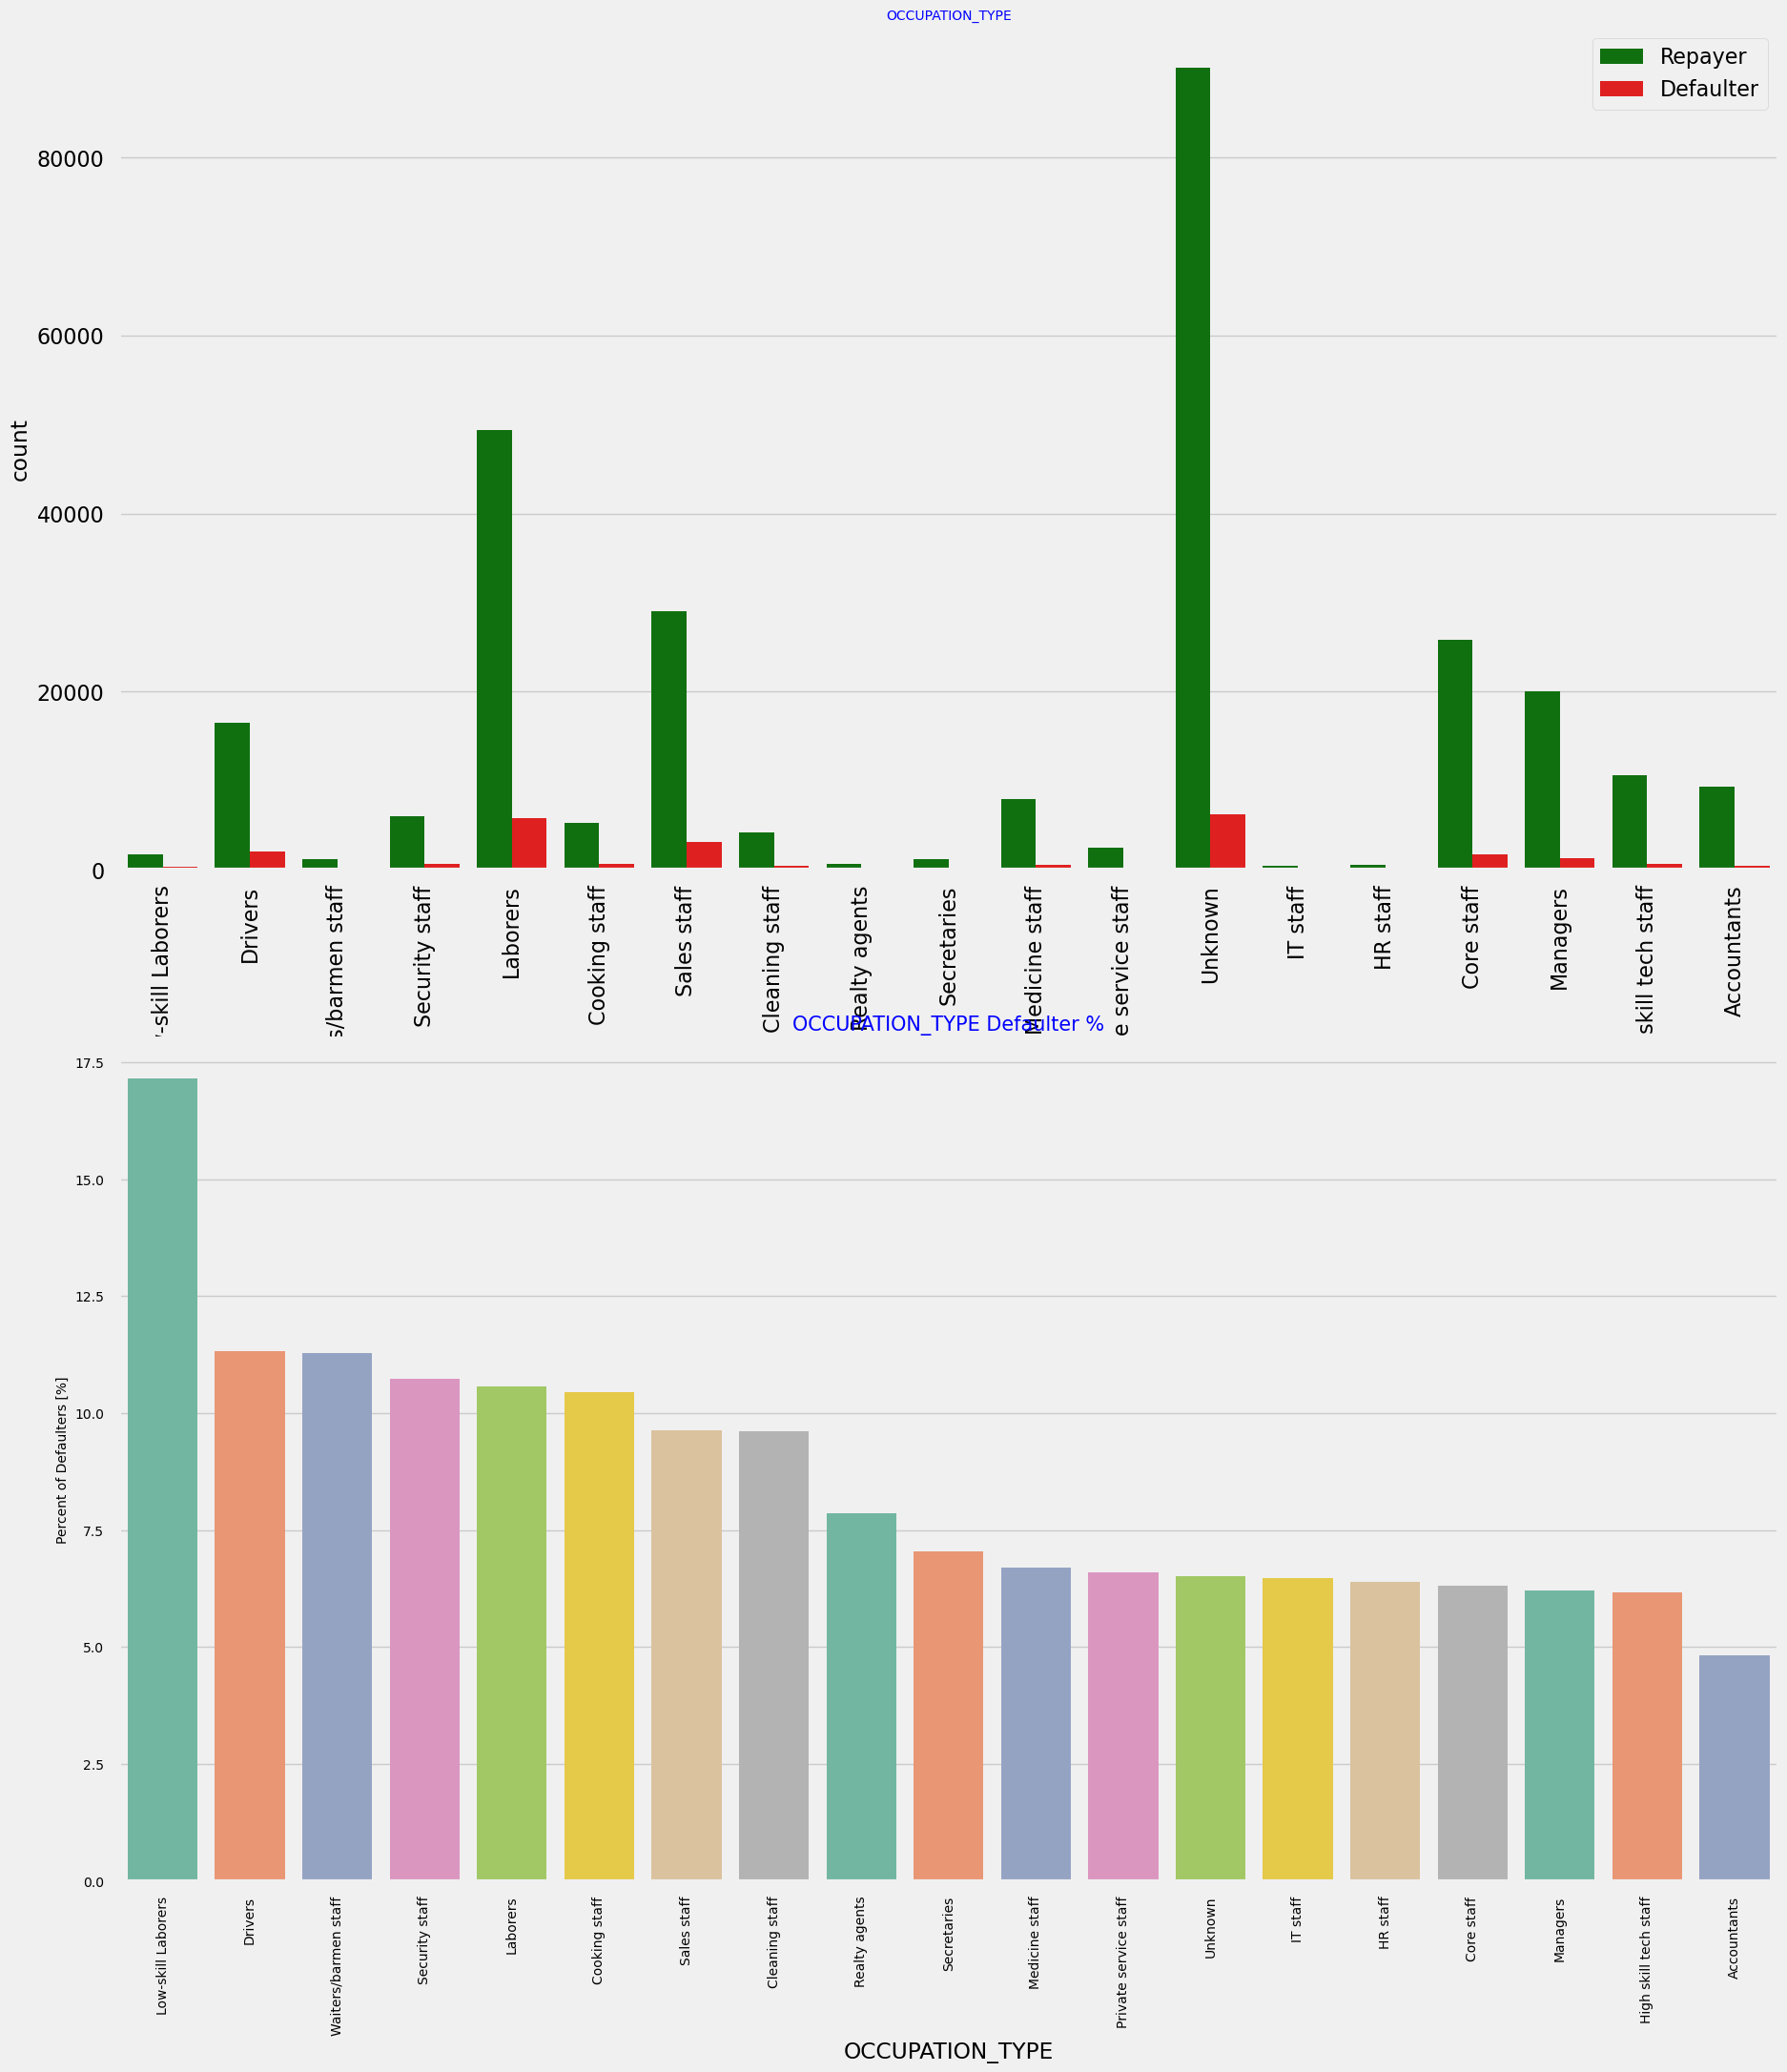

In [106]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

1.Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

2.The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

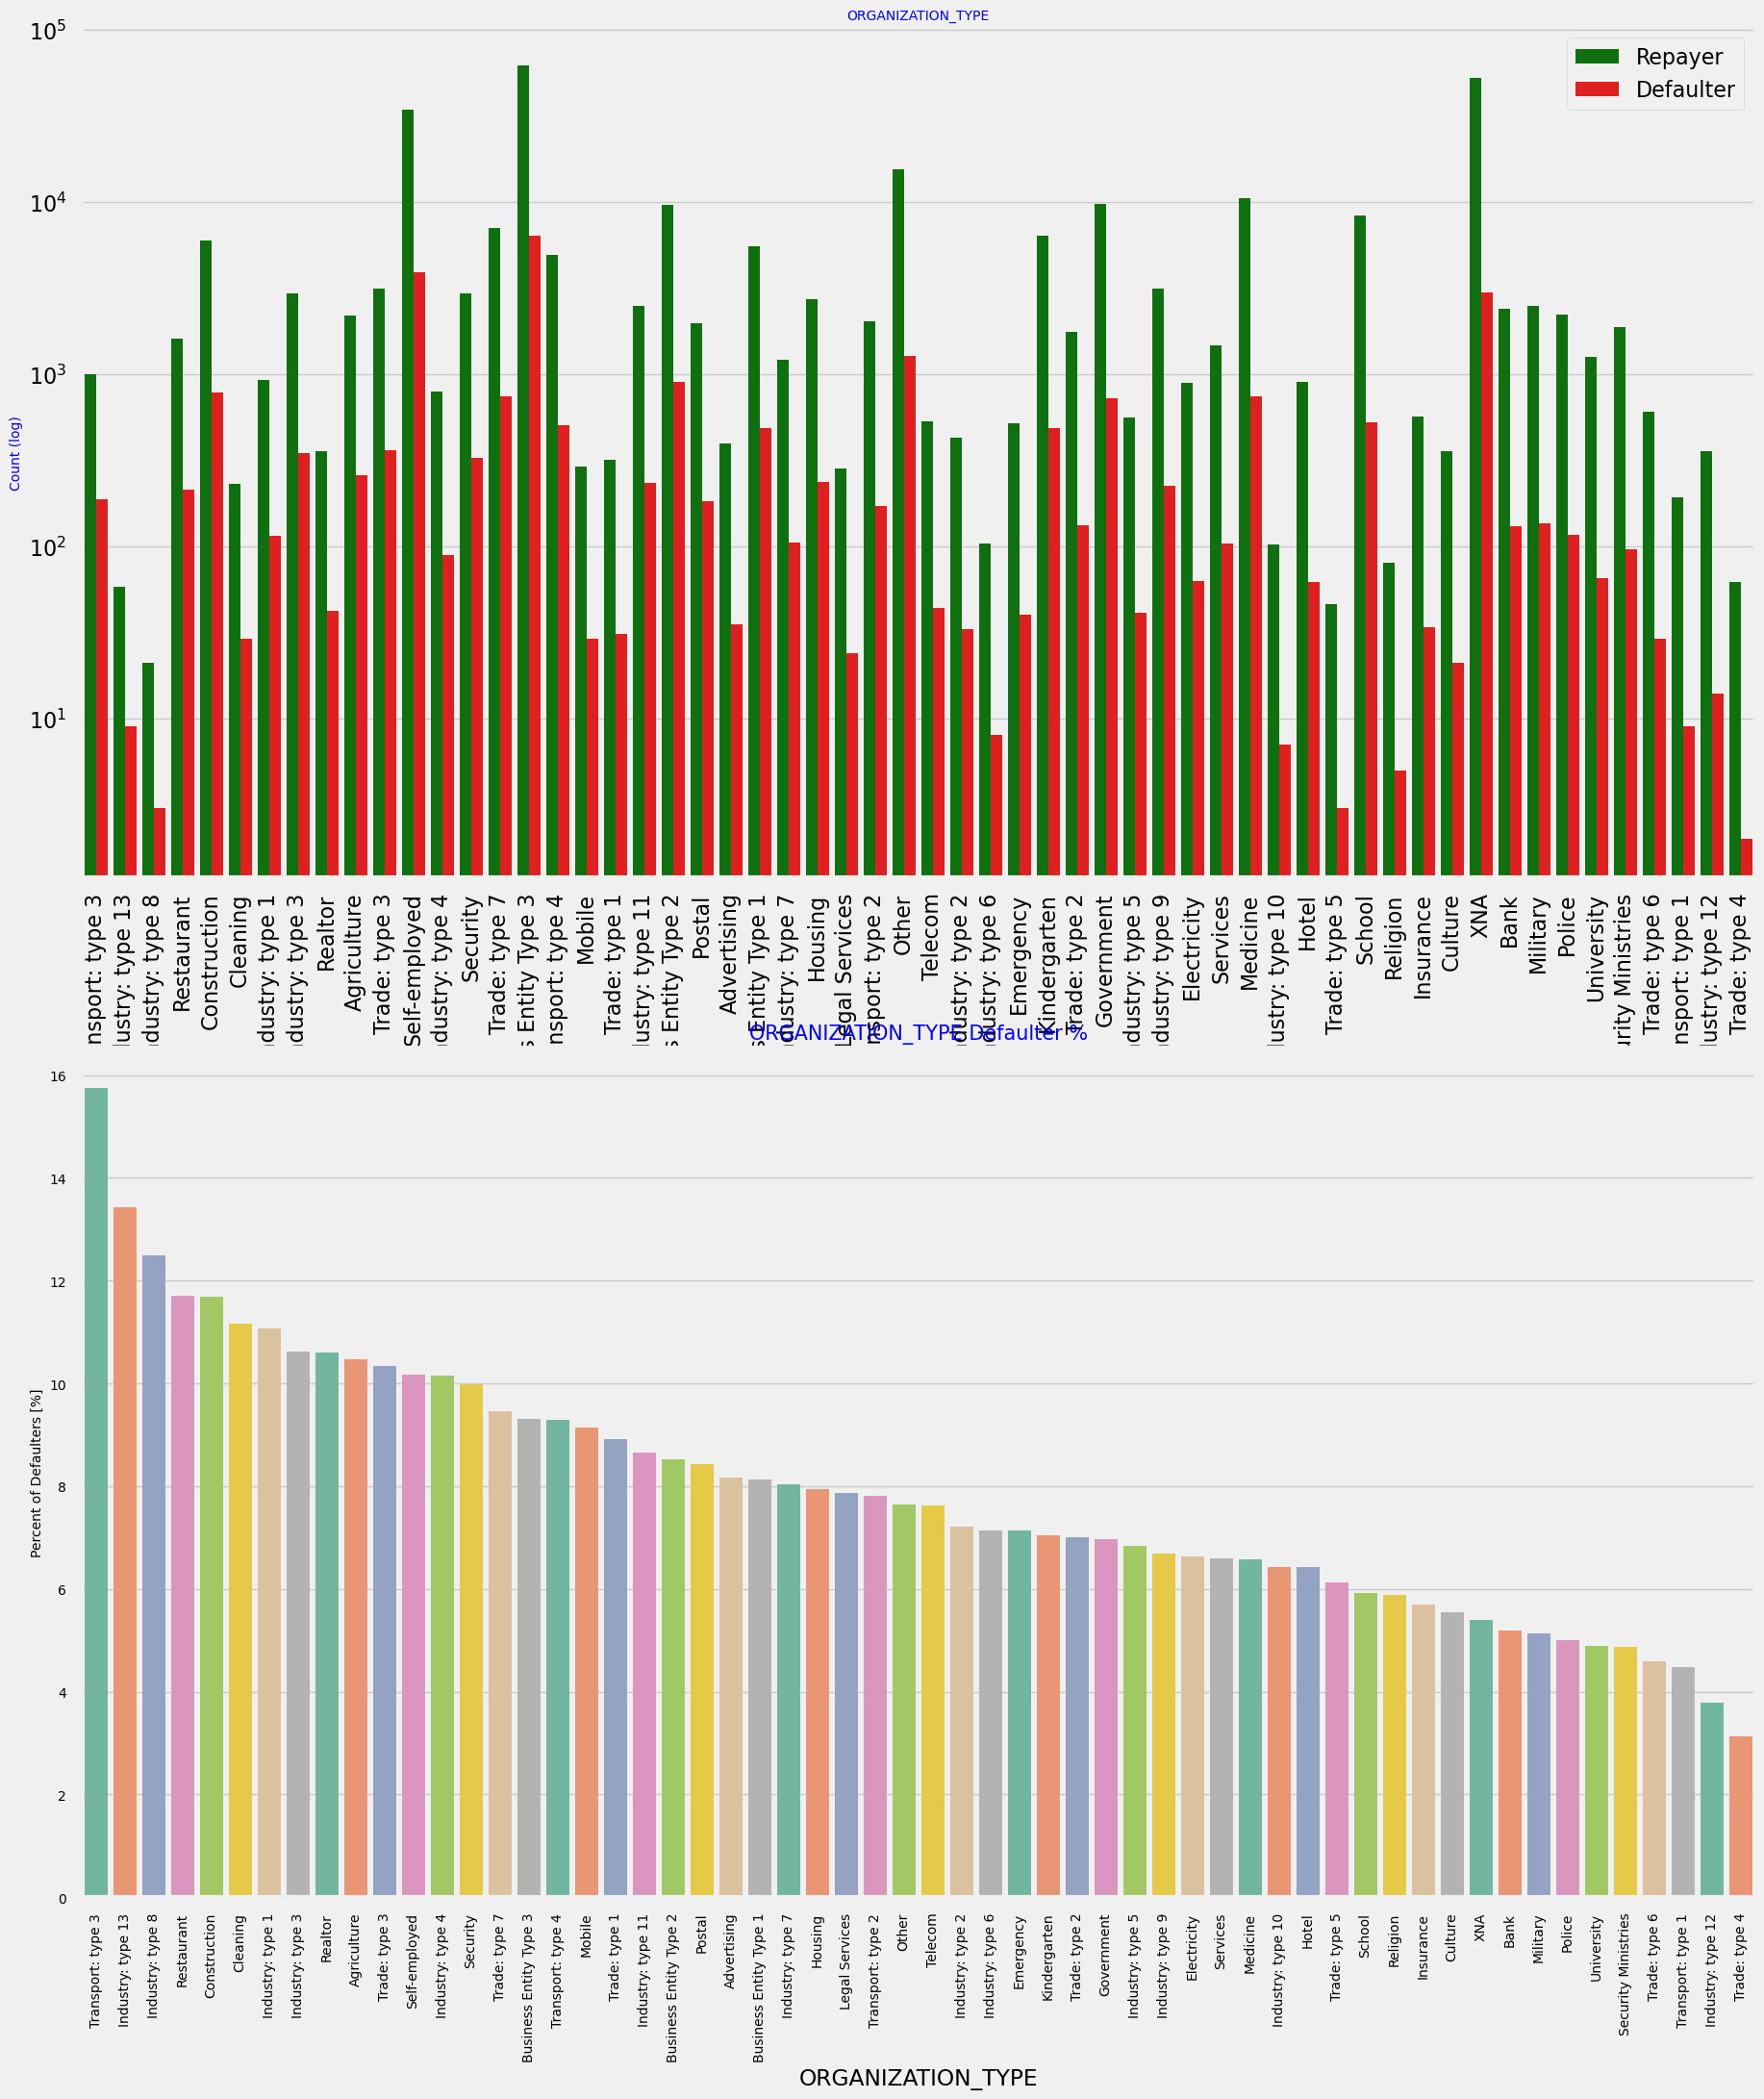

In [107]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

1.Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

2.Most of the people application for loan are from Business Entity Type 3

3.For a very high number of applications, Organization type information is unavailable(XNA)

It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:

    1.Trade Type 4 and 5
    2.Industry type 8

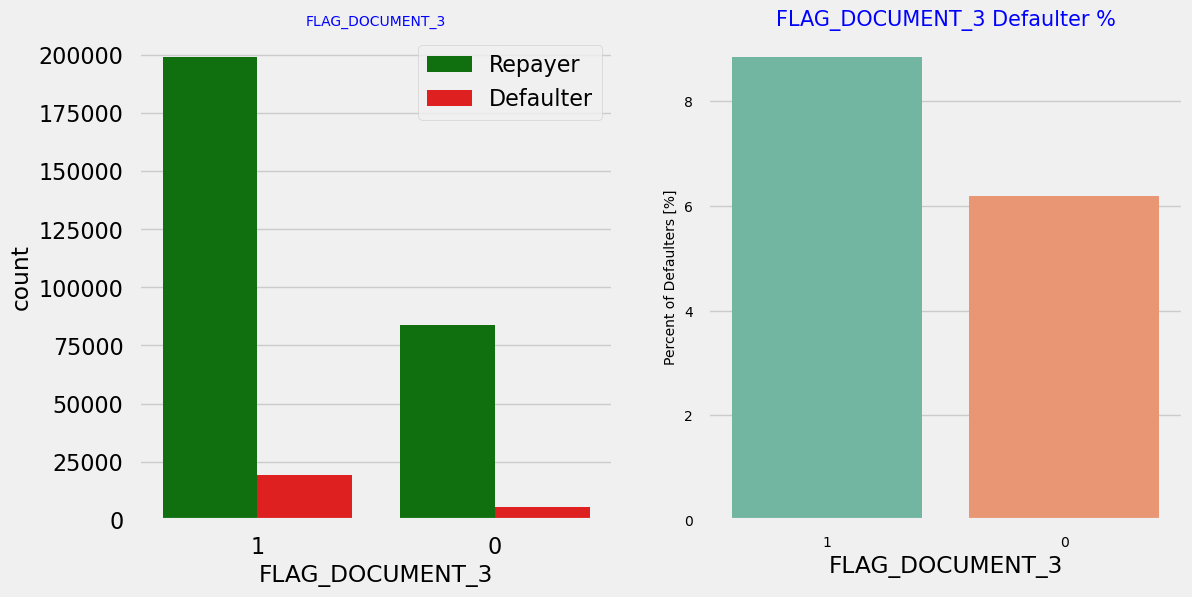

In [108]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (app.9%) than who have not submitted the document (6%)

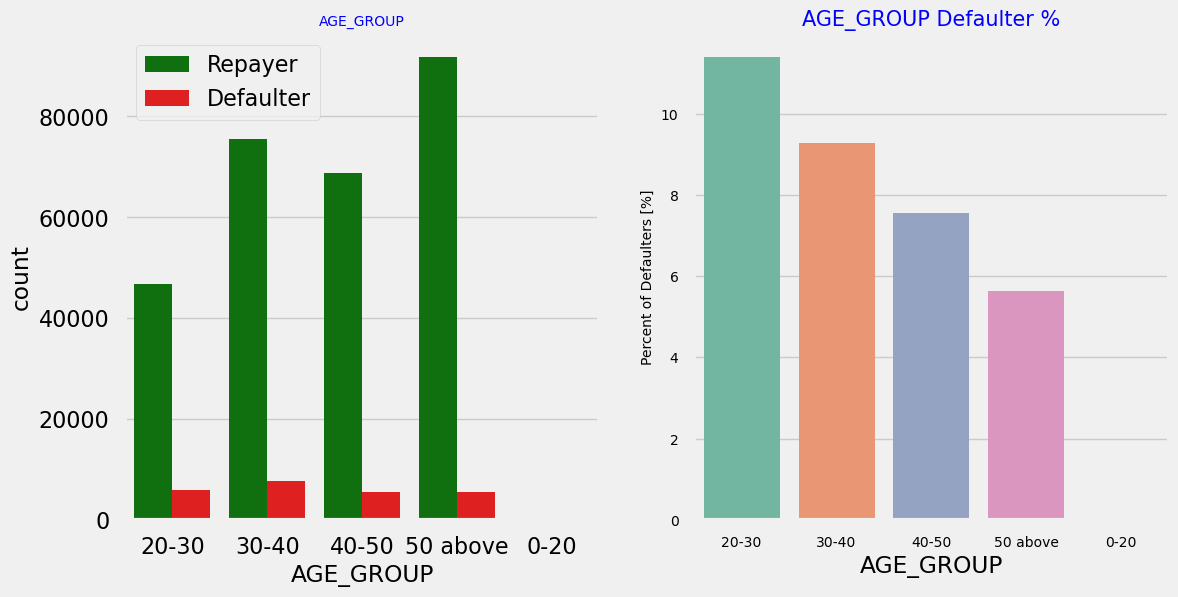

In [109]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

1.People in the age group range 20-40 have higher probability of defaulting

2.People above age of 50 have low probability of defailting

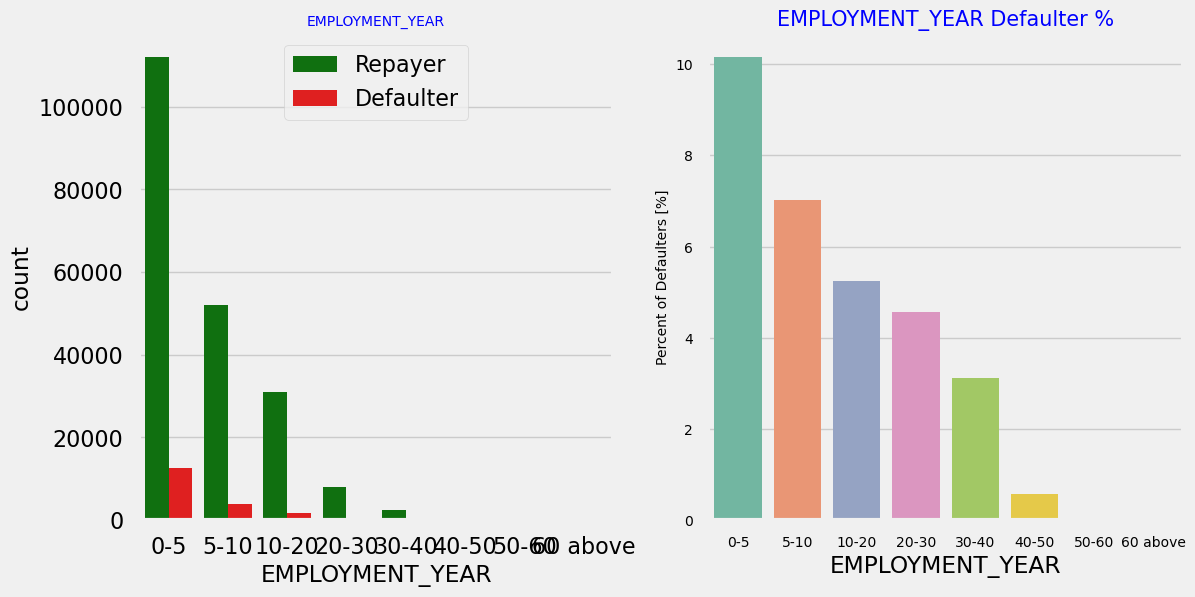

In [110]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

1.Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%

2.With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

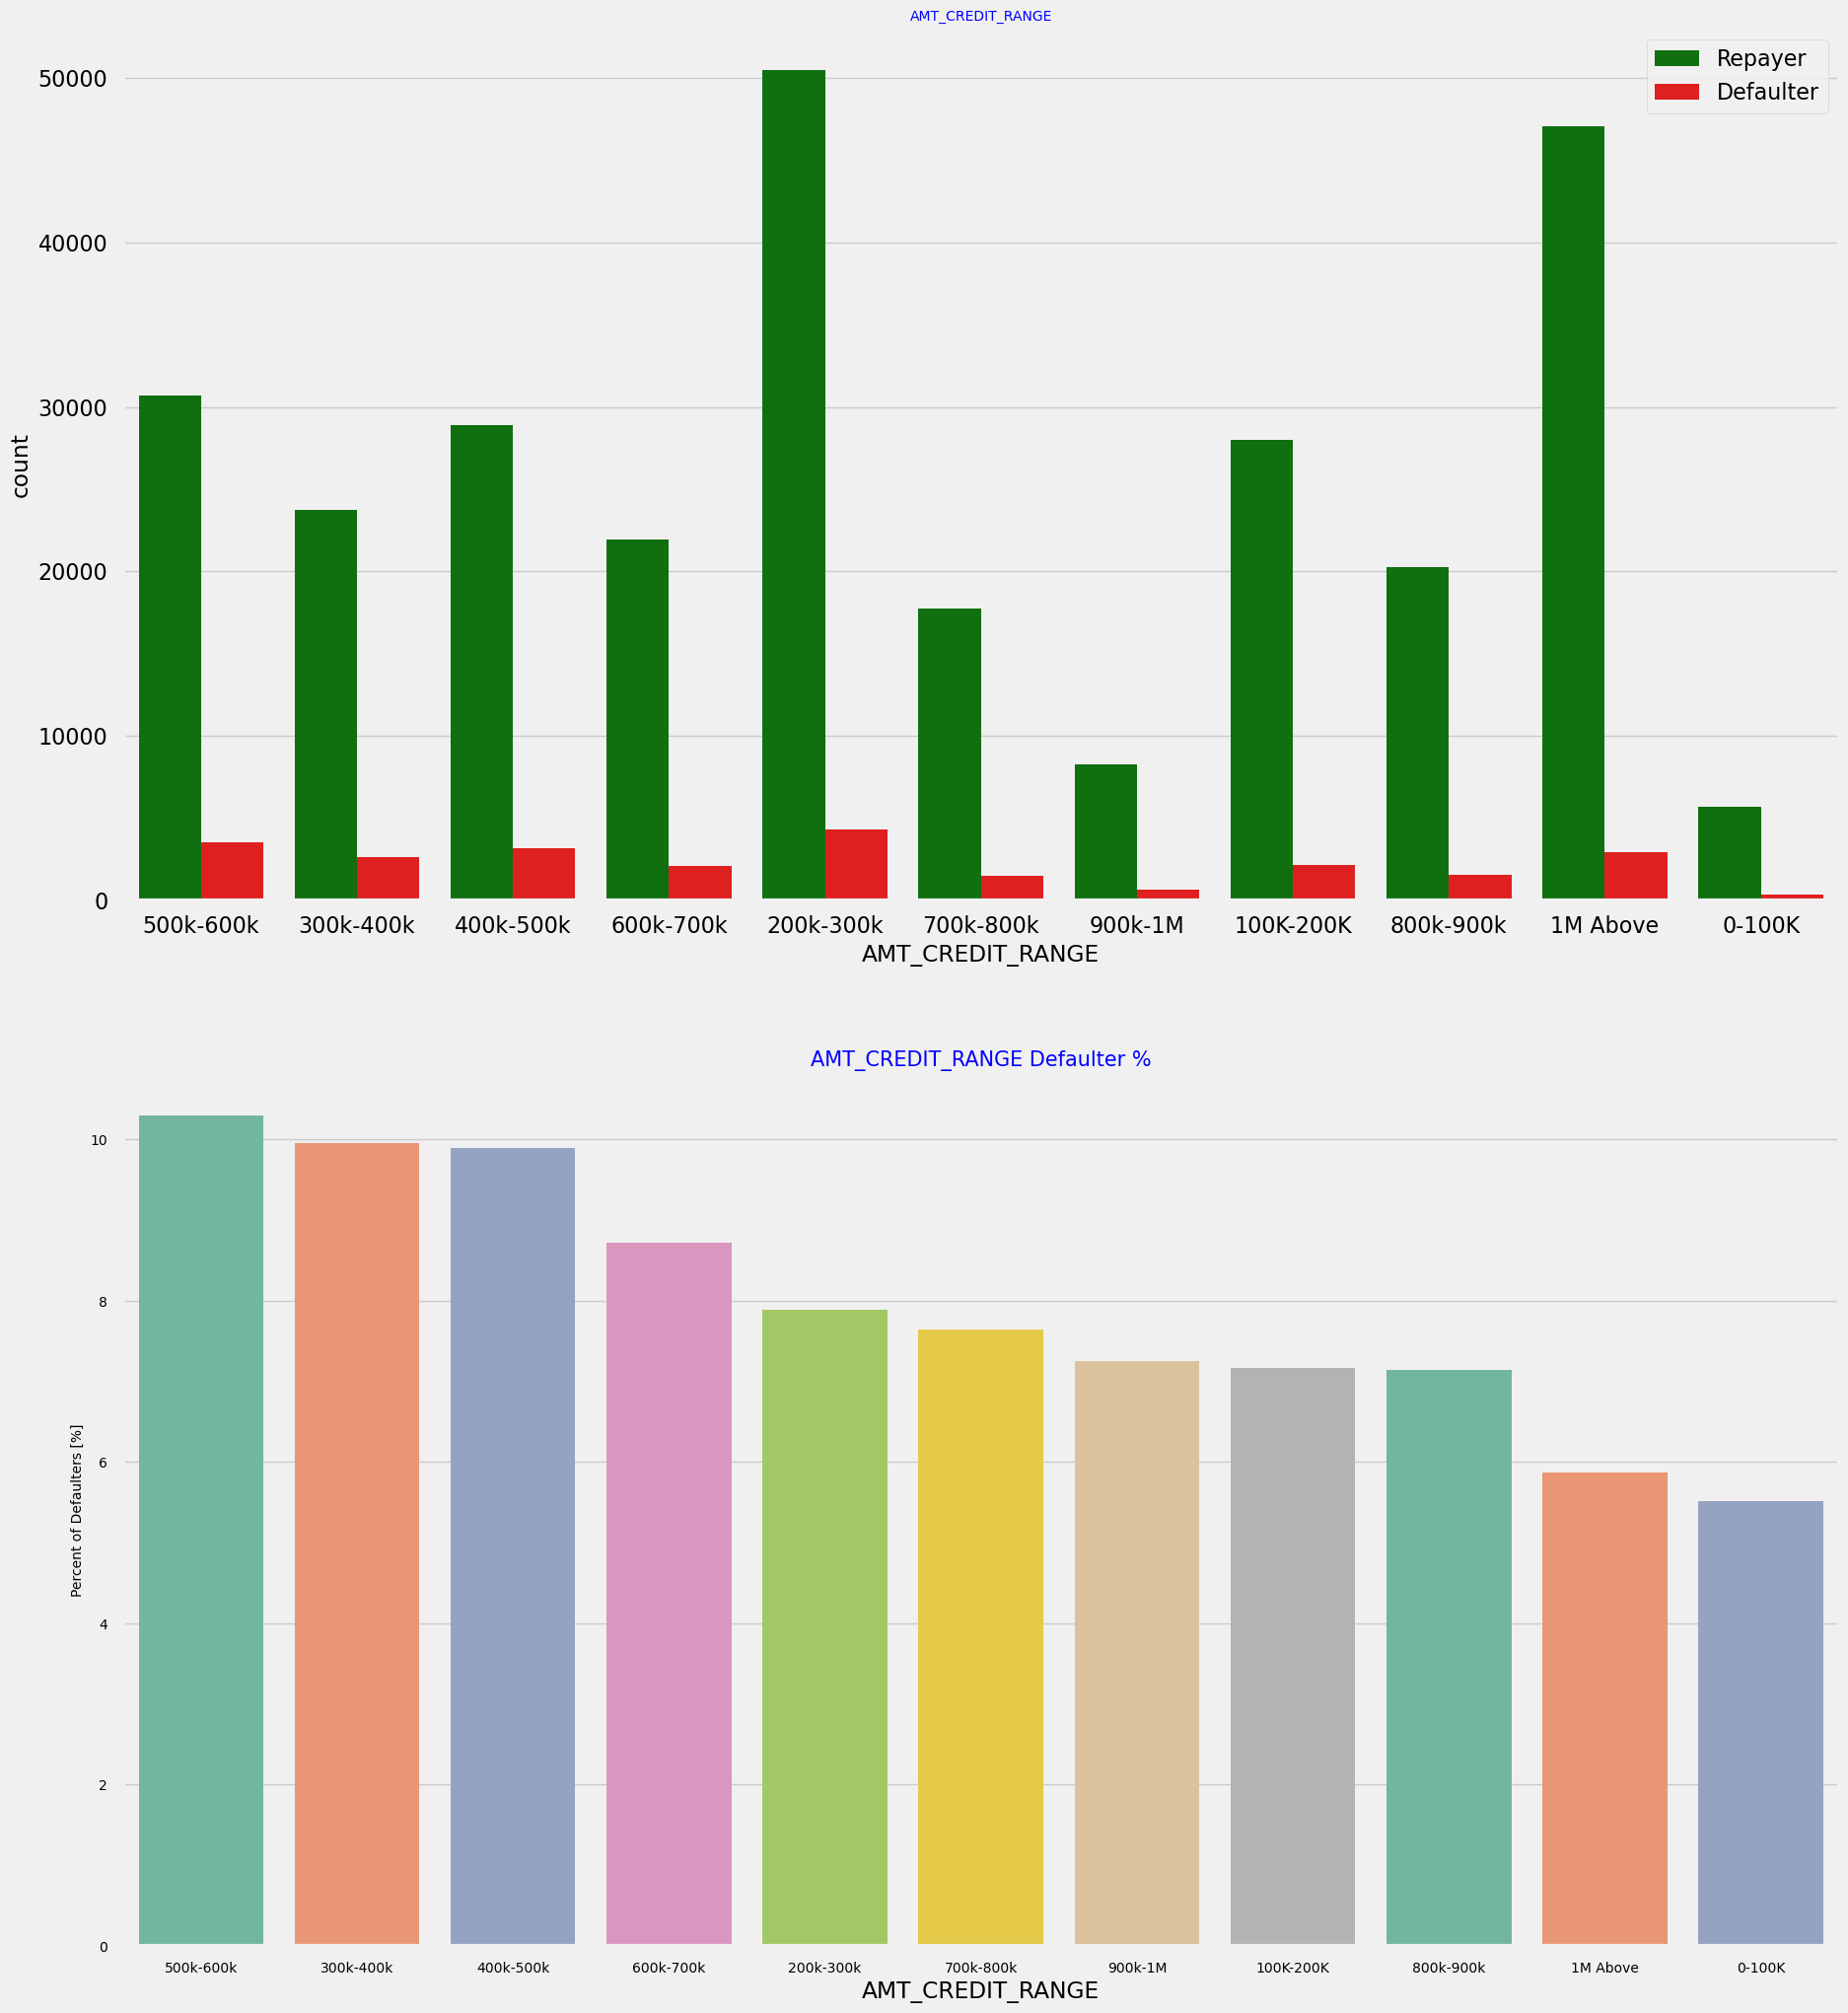

In [111]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

1.More than 80% of the loan provided are for amount less than 900,000

2.People who get loan for 300-600k tend to default more than others.

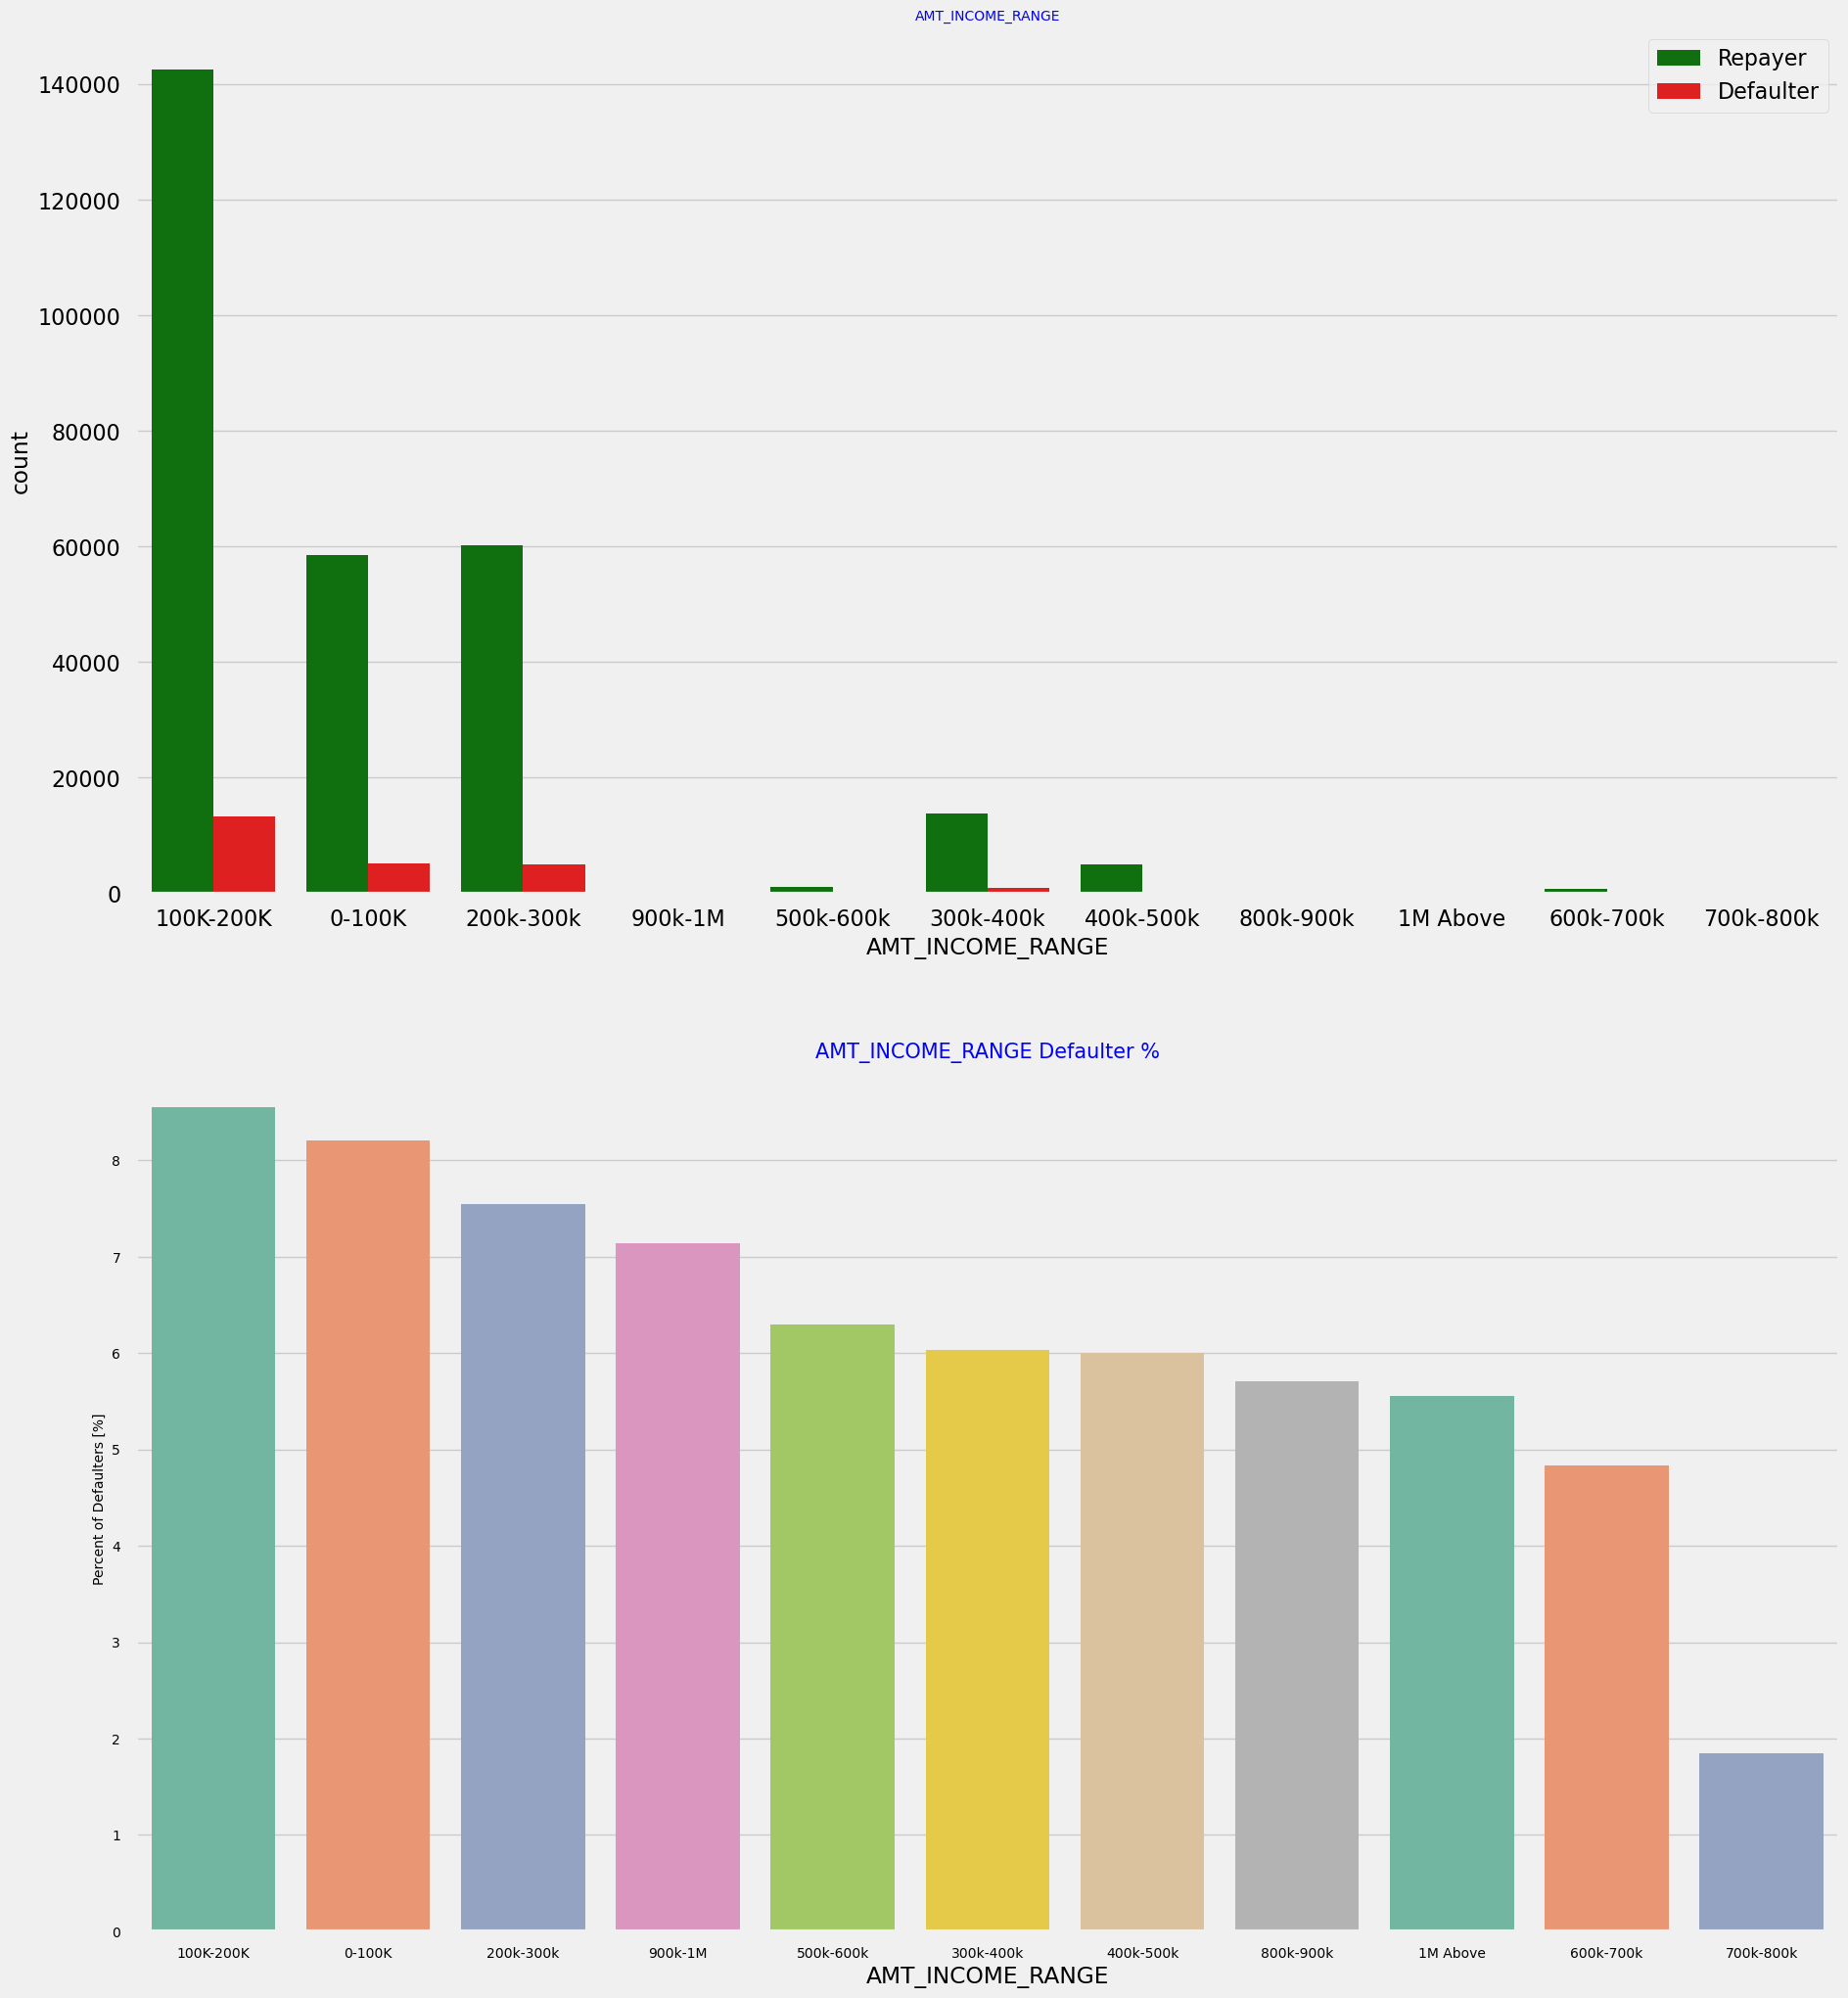

In [112]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

1.90% of the applications have Income total less than 300,000

2.Application with Income less than 300,000 has high probability of defaulting

3.Applicant with Income more than 700,000 are less likely to default

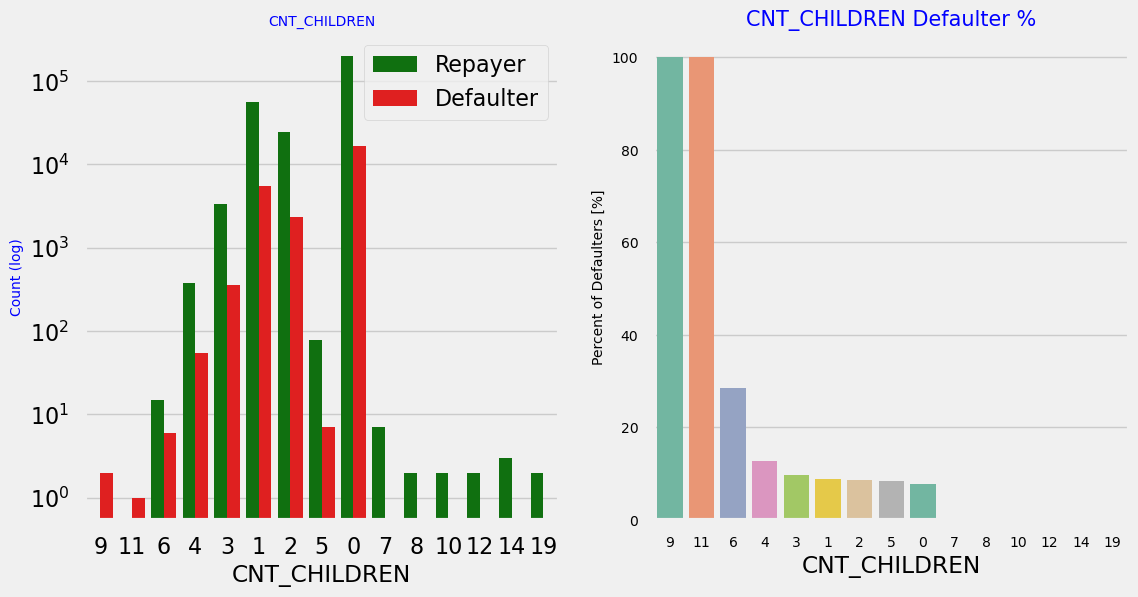

In [113]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

1.Most of the applicants do not have children

2.Very few clients have more than 3 children.

3.Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

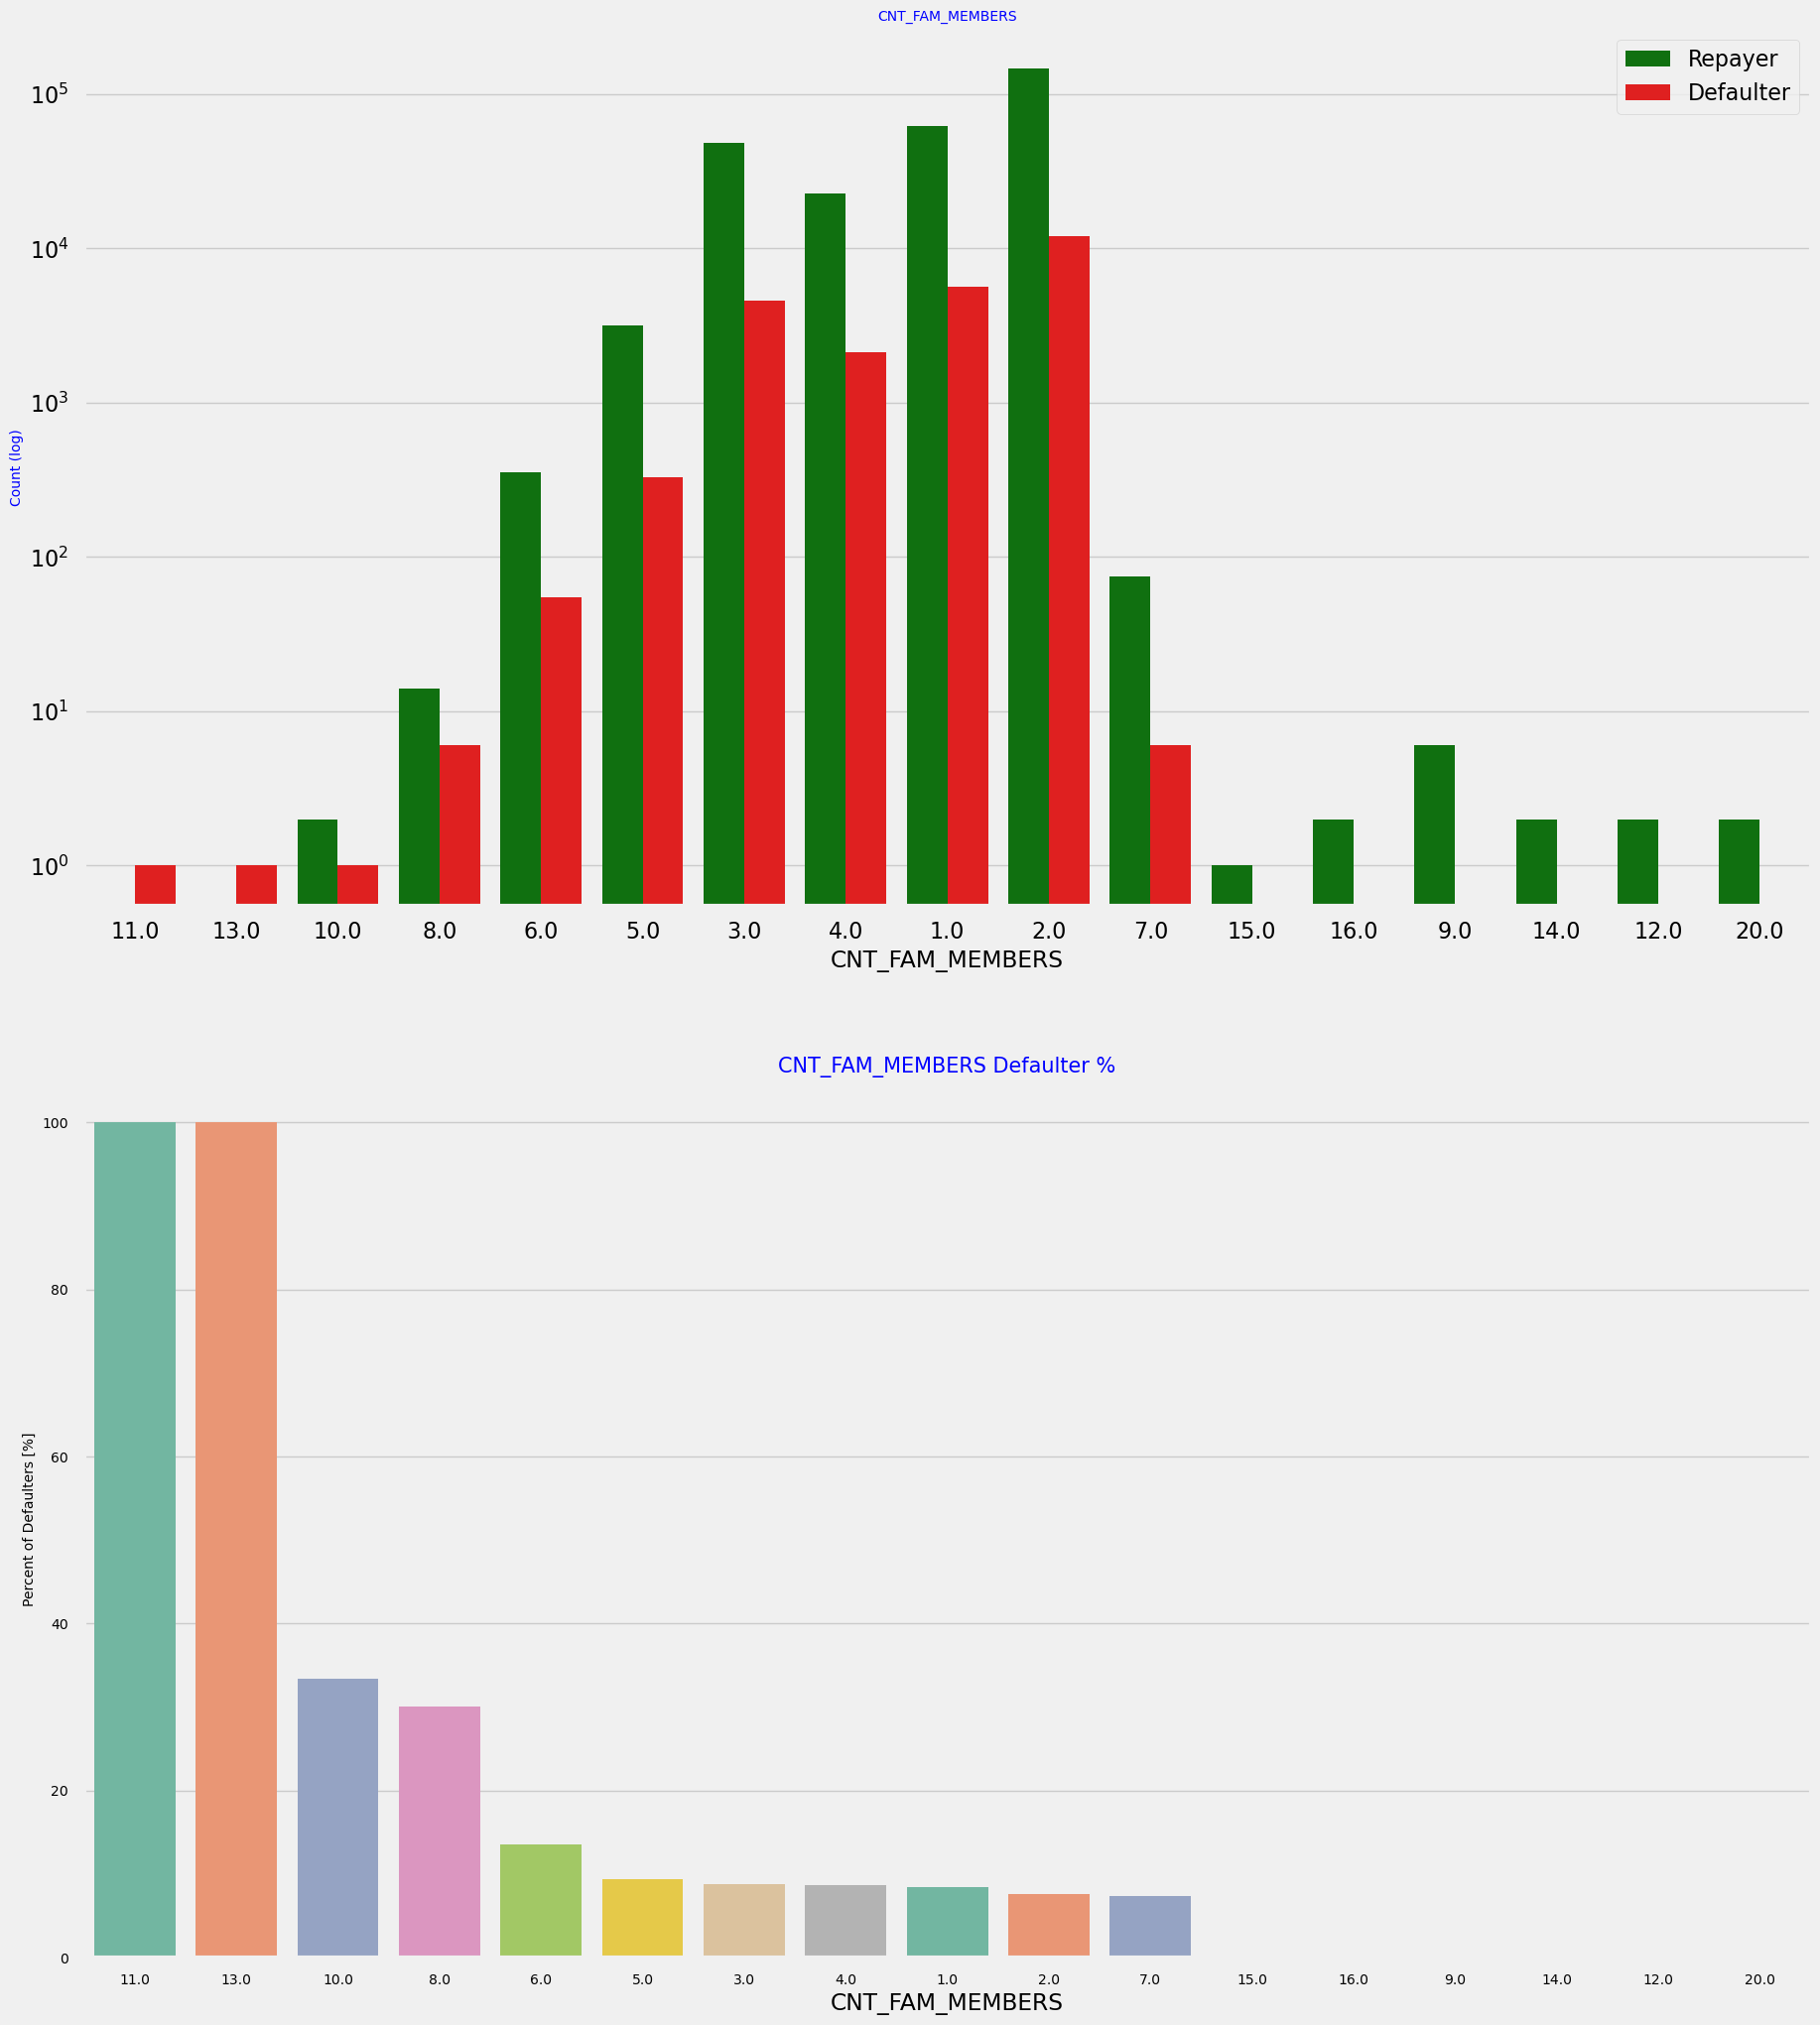

In [114]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

Family member follows the same trend as children where having more family members increases the risk of defaulting

#### Categorical Bi/Multivariate Analysis

In [115]:
applicationDF.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%  \
NAME_INCOME_TYPE                                                            
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500   
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000   
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000   
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700   
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750   
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750   
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875   
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500   

                          75%        max  
NAME_INCOME_TYPE                          
Businessman           8.43750    22.5000  
Commercial associate  2.25000   180.0009  
Maternity leave       1.35000     3.6000  
Pensioner             1.66500    22.5000  
State servant         2.25000    31.5000  
Student               1.78875     5.6250  
Unemployed            1.35000     3.3750  
Working               2.02500  1170.0000

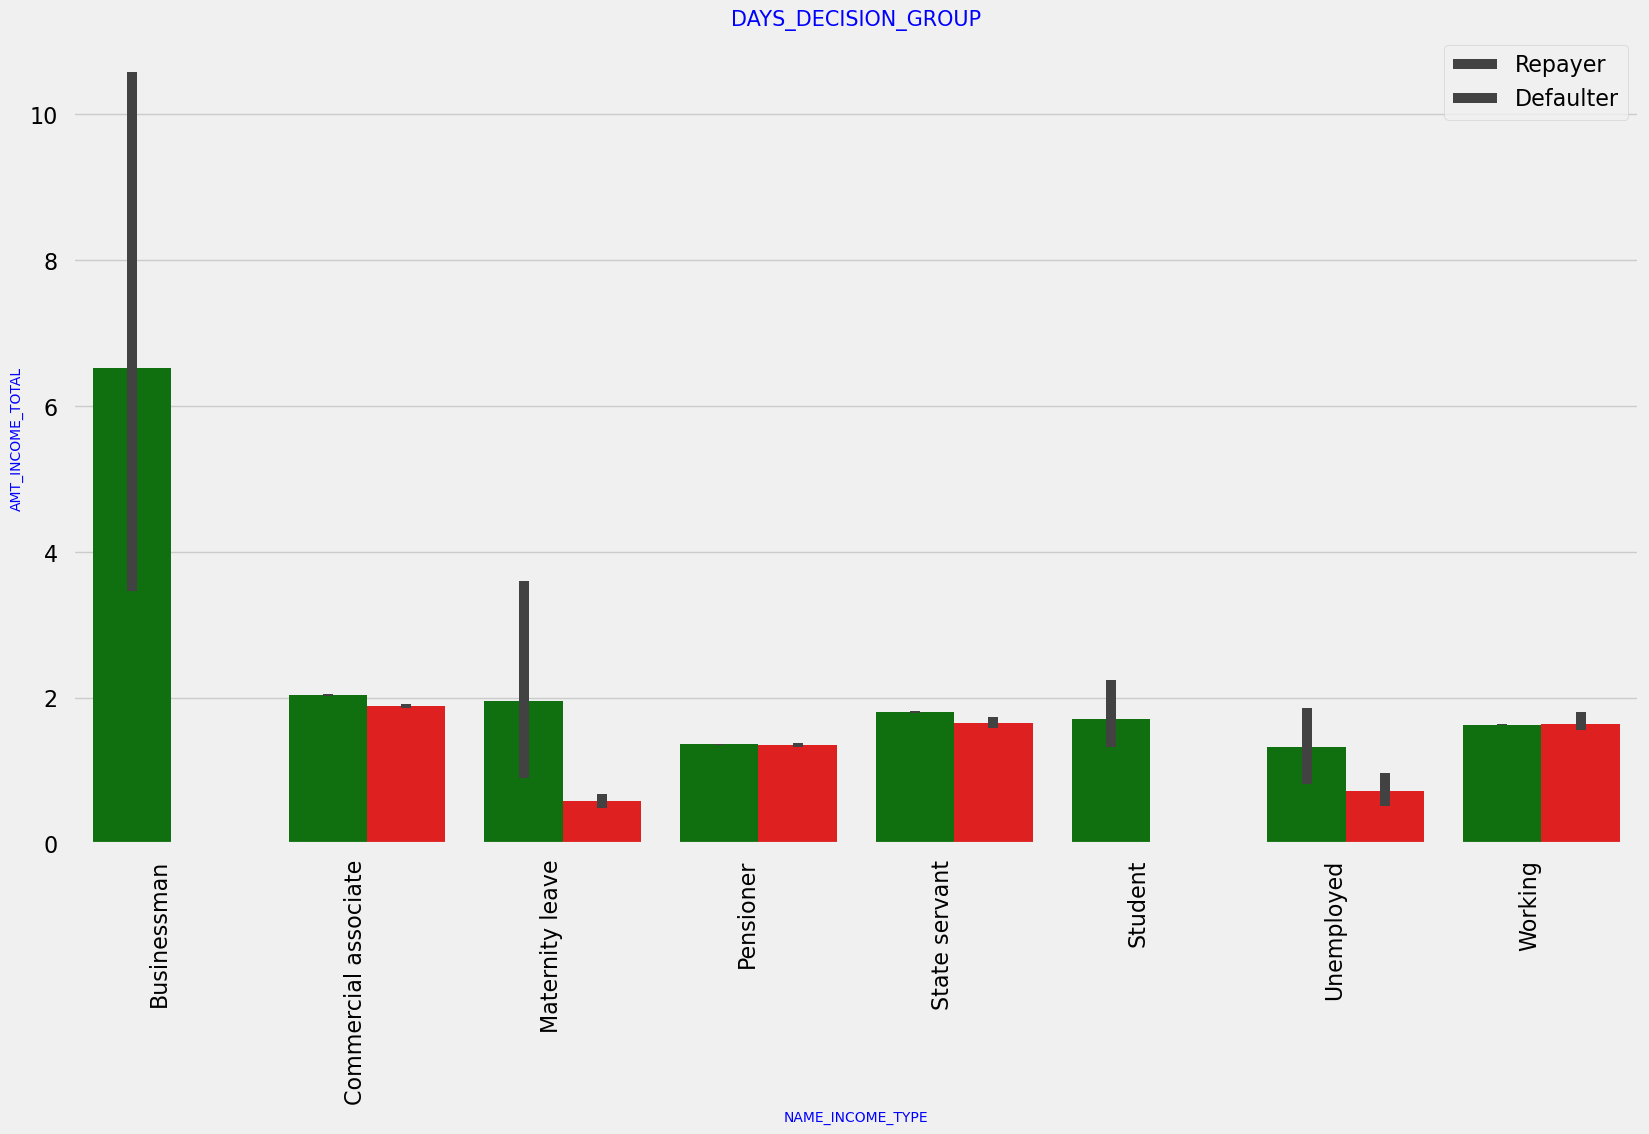

In [116]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",applicationDF,"TARGET",(18,10))

It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

## Numeric Variables Analysis

#### Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

In [117]:
applicationDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [118]:
len(applicationDF.columns)

52

In [119]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = applicationDF.loc[applicationDF['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = applicationDF.loc[applicationDF['TARGET']==1, cols_for_correlation] # Defaulters

In [120]:
len(cols_for_correlation)

42

#### Numerical Univariate Analysis

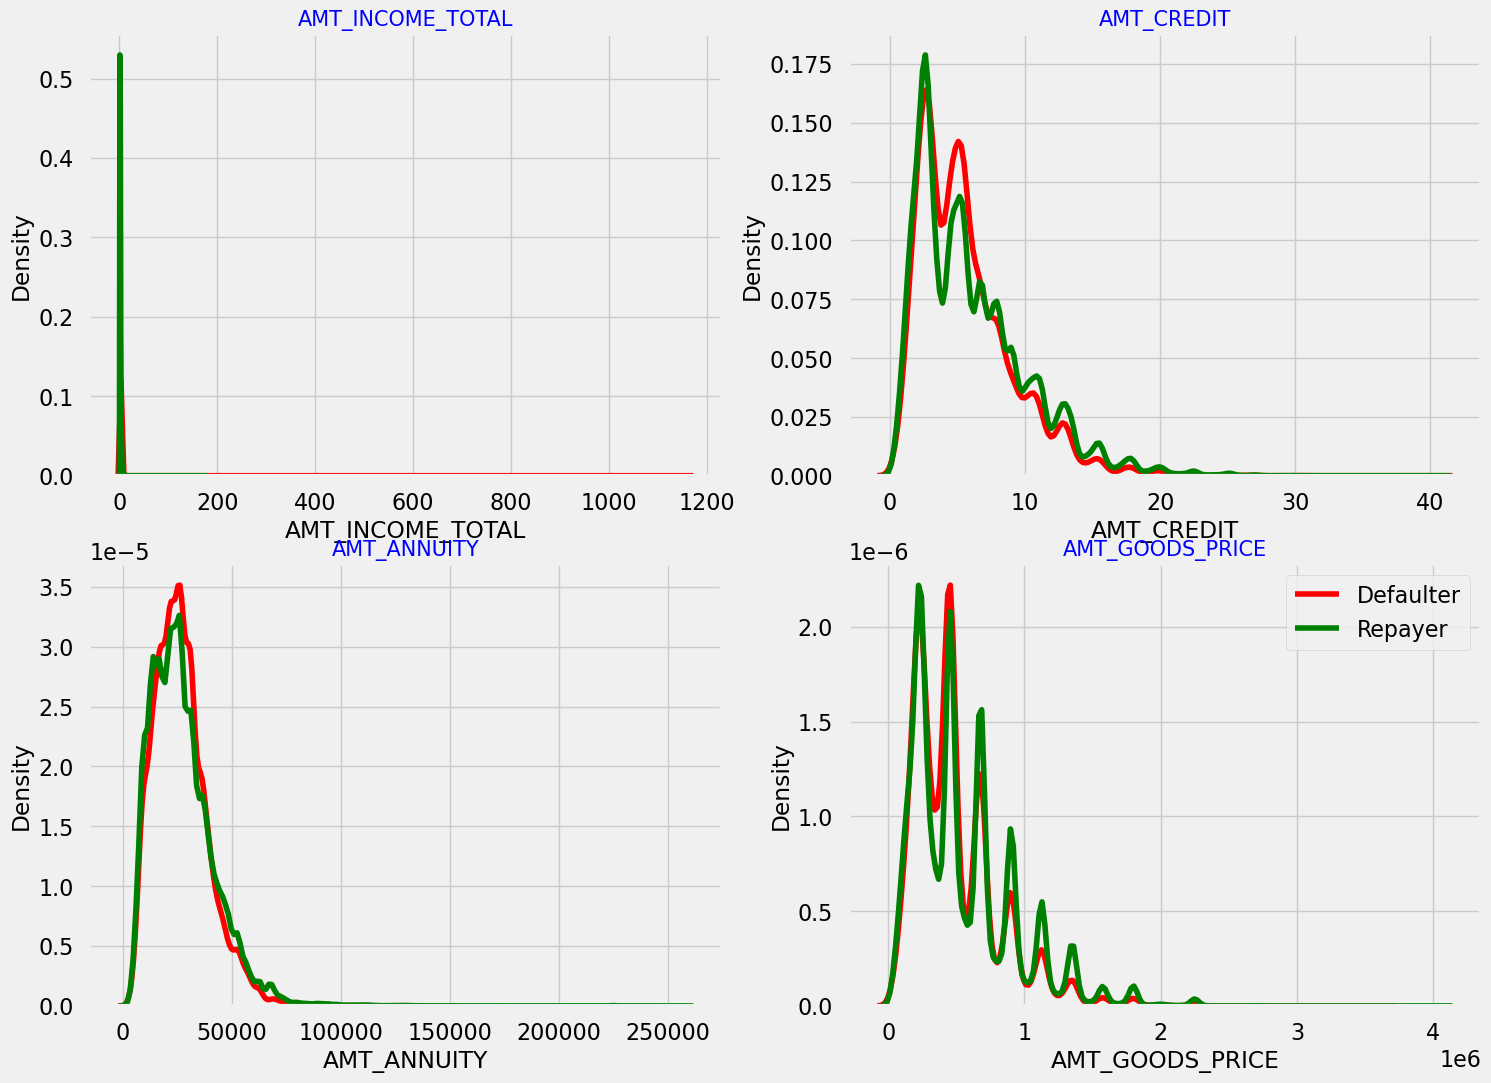

In [121]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

Most no of loans are given for goods price below 10 lakhs

Most people pay annuity below 50000 for the credit loan

Credit amount of the loan is mostly less then 10 lakhs

The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

#### Numerical Bivariate Analysis

<Figure size 1500x600 with 0 Axes>

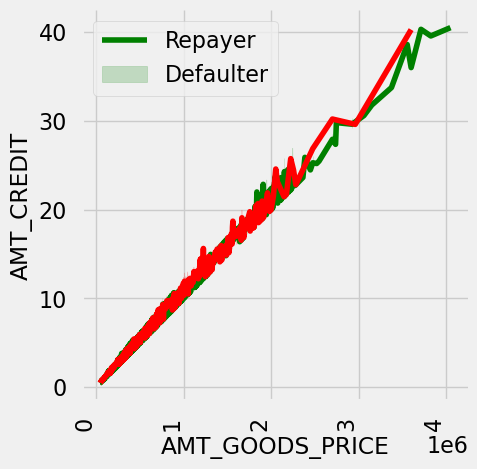

In [122]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',applicationDF,"TARGET", "line", ['g','r'], False,(15,6))

When the credit amount goes beyond 3M, there is an increase in defaulters.

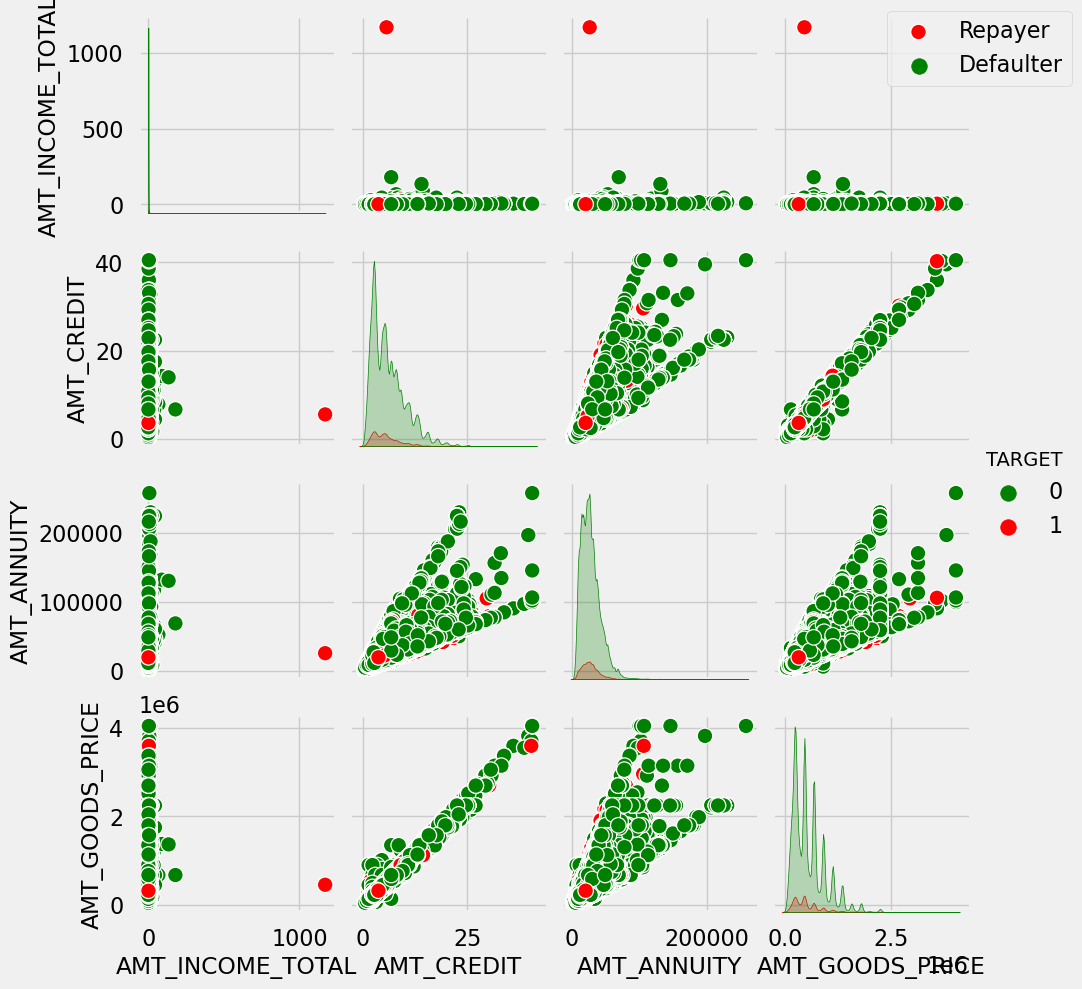

In [123]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line

There are very less defaulters for AMT_CREDIT >3M

Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

# Merged Dataframes Analysis

In [124]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(applicationDF, previousDF, how='inner', on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             2.025      4.065975   
1               N             0             2.700     12.935025   
2               N             0             2.700     12.935025   
3               N             0             2.700     12.935025   
4               Y             0             0.675      1.350000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                    2   
1              291      Core staff              2.0                    1   
2              291      Core staff              2.0                    1   
3              291      Core staff              2.0                    1   
4             2531        Laborers              1.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           1                     MONDAY   
3                           1                     MONDAY   
4                           2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0  

In [125]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [126]:
# Checking the element count of the dataframe
loan_process_df.size

104613874

In [127]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [128]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+00   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+00   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+00   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+00   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+00   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+03   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.412493e+06   
mean   5.875537e+00   2.701702e+04       5.277186e+05   
std    3.849173e+00   1.395116e+04       3.532465e+05   
min    4.500000e-01   1.615500e+03       4.050000e+04   
25%    2.700000e+00   1.682100e+04       2.385000e+05   
50%    5.084955e+00   2.492550e+04       4.500000e+05   
75%    8.079840e+00   3.454200e+04       6.795000e+05   
max    4.050000e+01   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.413701e+06  1.413701e+06   1.413701e+06   
mean                 2.074985e-02  1.632105e+04   7.266347e+04   
std                  1.334702e-02  4.344557e+03   1.433374e+05   
min                  2.900000e-04  7.489000e+03   0.000000e+00   
25%                  1.003200e-02  1.273900e+04   1.042000e+03   
50%                  1.885000e-02  1.604400e+04   2.401000e+03   
75%                  2.866300e-02  1.998000e+04   6.313000e+03   
max                  7.250800e-02  2.520100e+04   3.652430e+05   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count       1.413701e+06     1.413701e+06     1.413701e+06   
mean        5.003233e+03     3.034563e+03     2.150501e+00   
std         3.551051e+03     1.507376e+03     9.006787e-01   
min         0.000000e+00     0.000000e+00     1.000000e+00   
25%         2.001000e+03     1.783000e+03     2.000000e+00   
50%         4.508000e+03     3.330000e+03     2.000000e+00   
75%         7.510000e+03     4.319000e+03     3.000000e+00   
max         2.467200e+04     7.197000e+03     2.000000e+01   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             1.413701e+06                1.413701e+06   
mean              1.198433e+01                1.207327e-02   
std               3.232181e+00                1.092132e-01   
min               0.000000e+00                0.000000e+00   
25%               1.000000e+01                0.000000e+00   
50%               1.200000e+01                0.000000e+00   
75%               1.400000e+01                0.000000e+00   
max               2.300000e+01                1.000000e+00   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.544176e+00              1.540436e-01   
std                2.530715e+00              4.658973e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.480000e+02              3.400000e+01   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.526303e+00              1.080426e-01   
std                2.508953e+00              3.790588e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.440000e+02              2.400000e+01   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CRED

In [129]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

### Plotting Contract Status vs purpose of the loan:

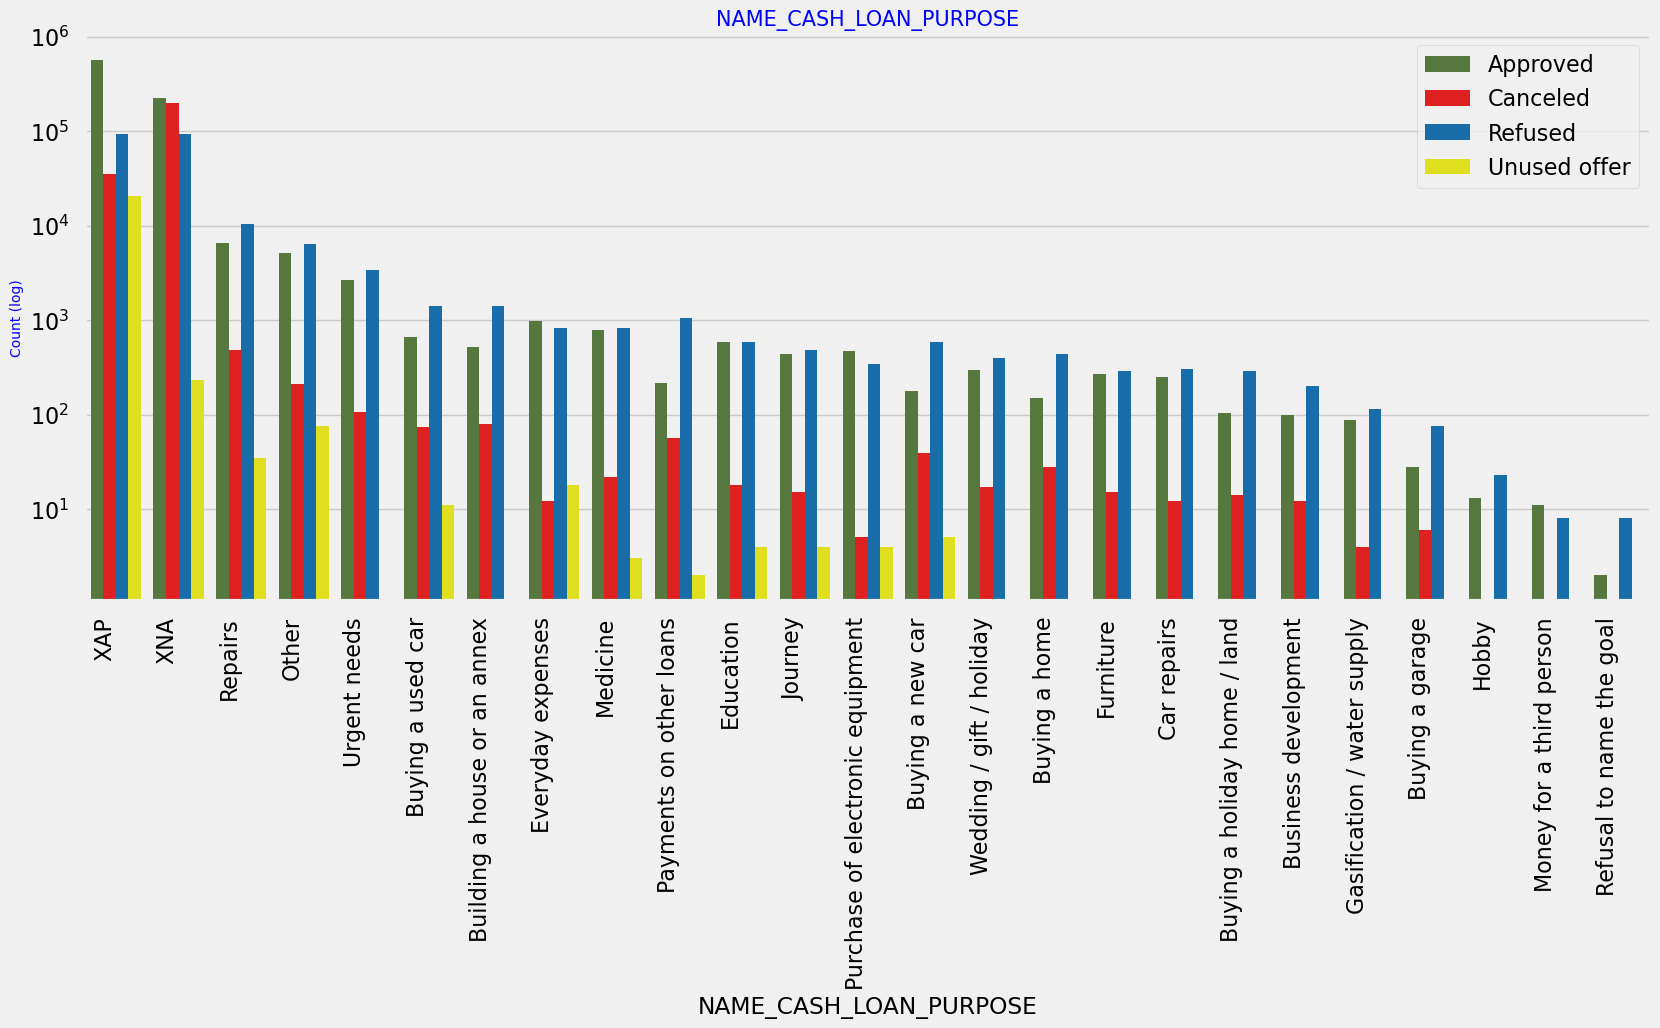

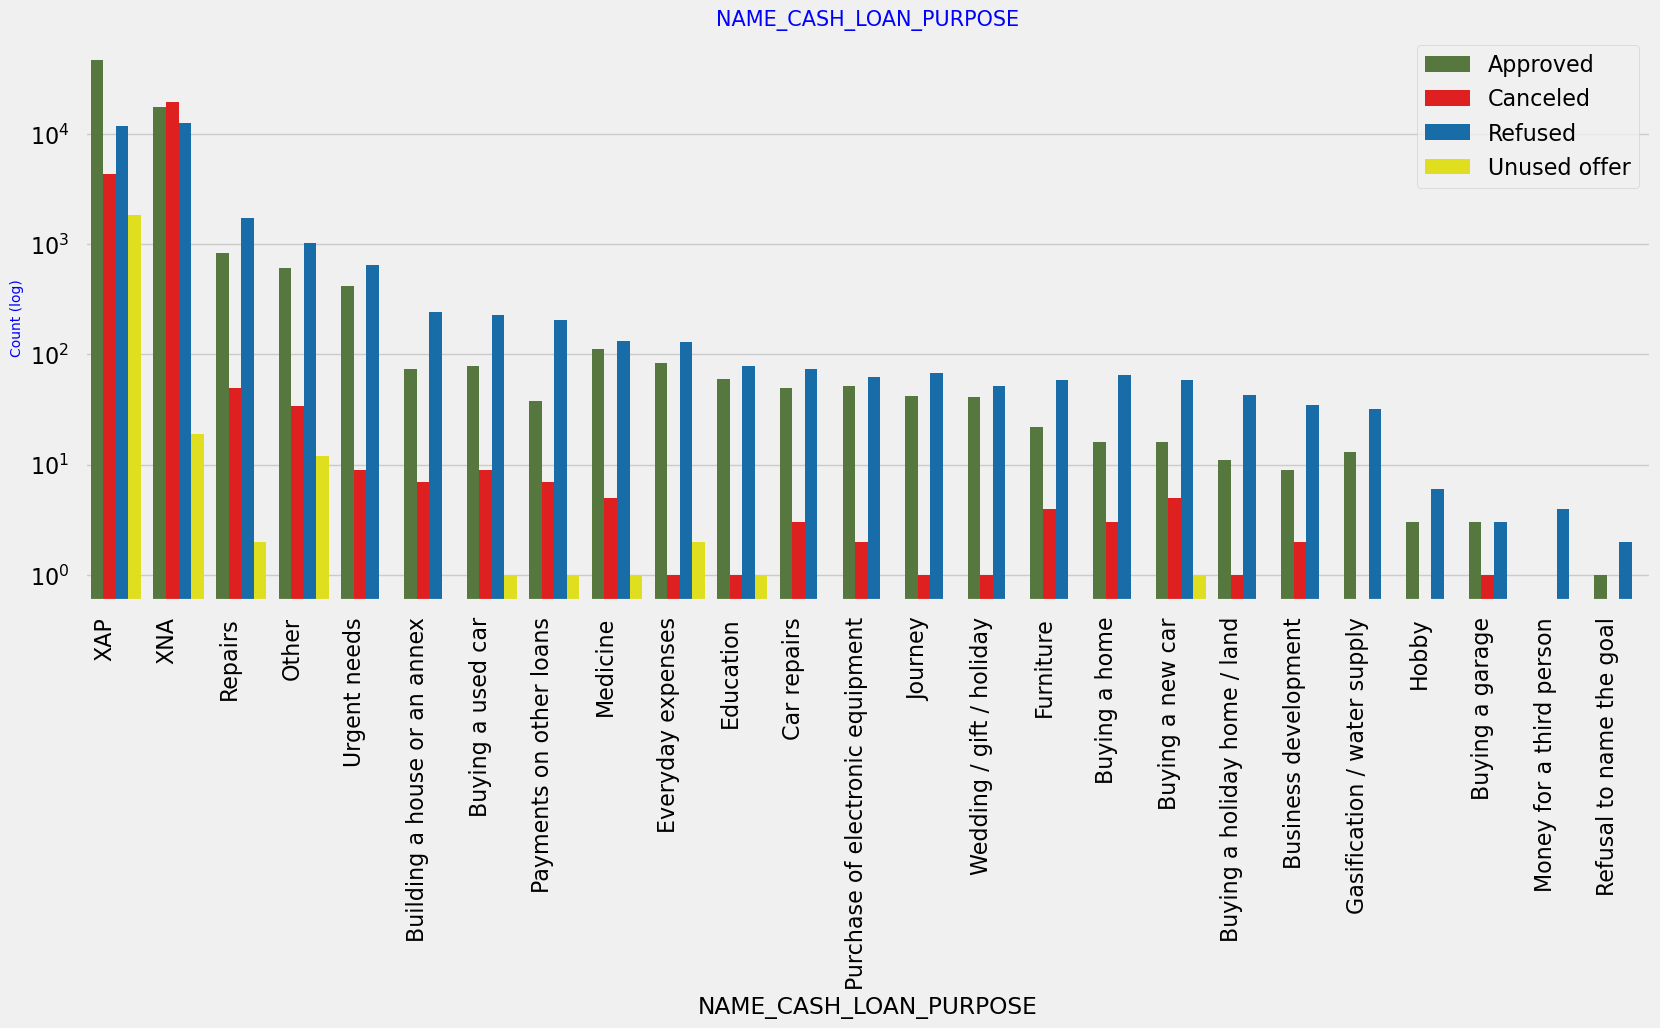

In [130]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

Loan purpose has high number of unknown values (XAP, XNA)

Loan taken for the purpose of Repairs seems to have highest default rate

A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

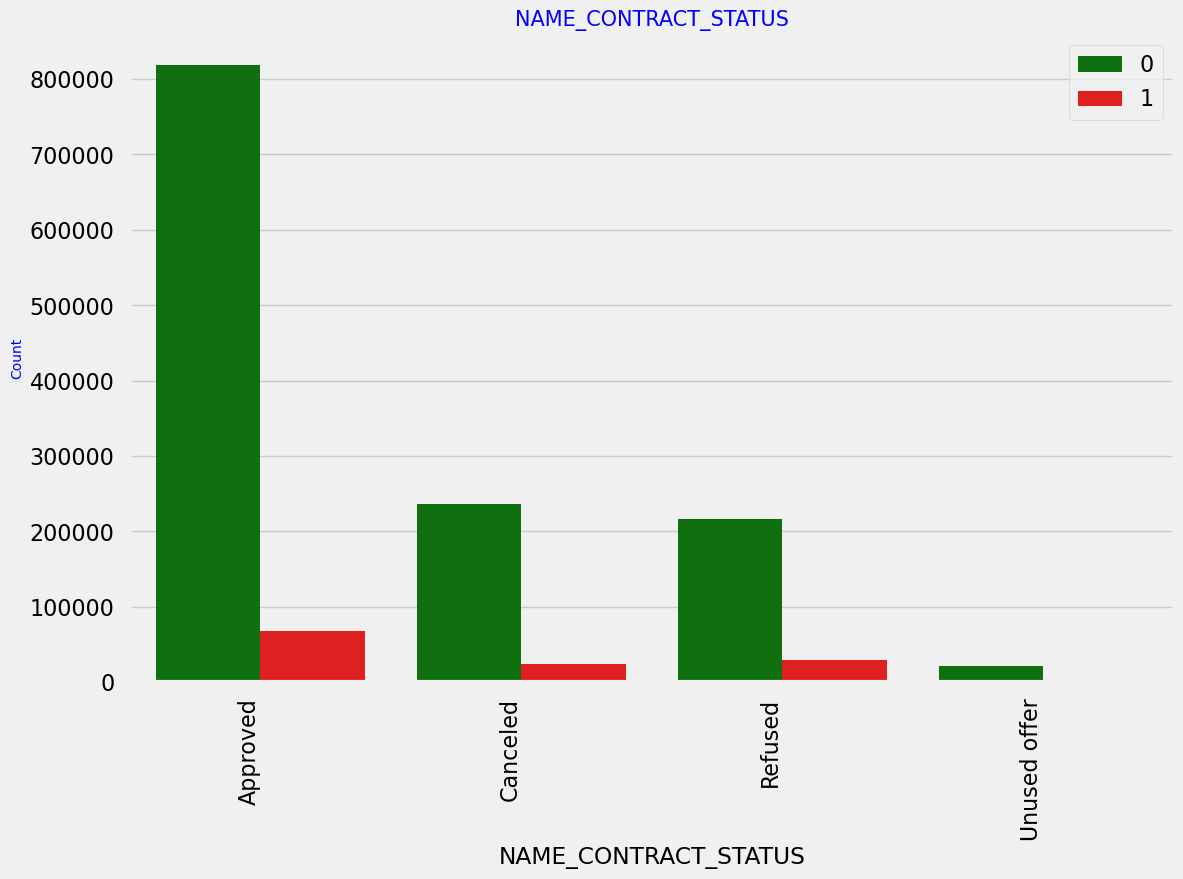

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [131]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients

88% of the clients who have been previously refused a loan has payed back the loan in current case.

Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

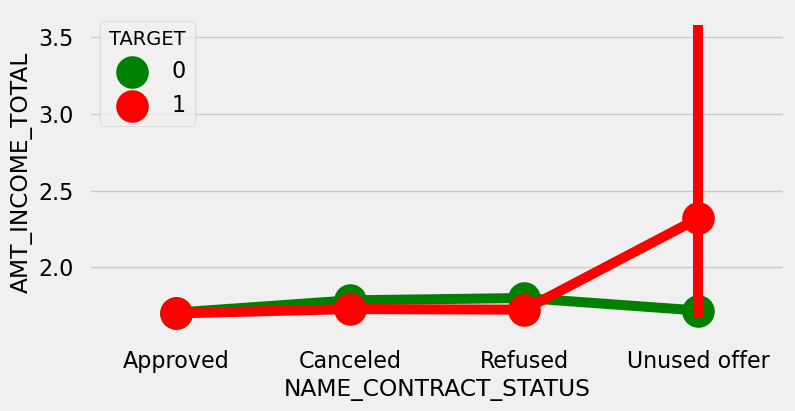

In [132]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others

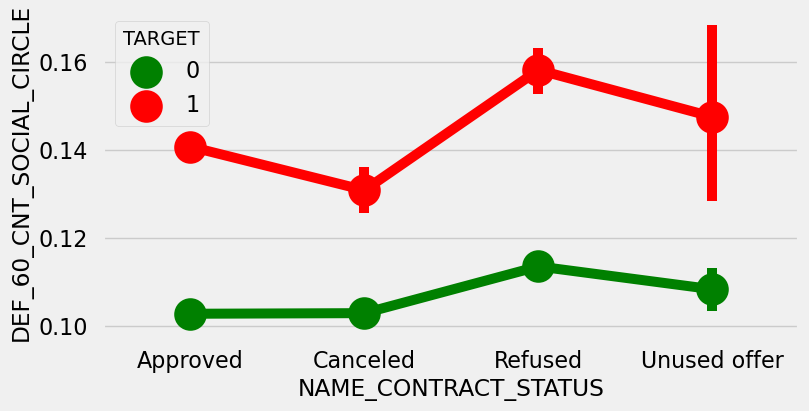

In [133]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

In [134]:
loan_process_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1413696      456255       0           Cash loans           F            N   
1413697      456255       0           Cash loans           F            N   
1413698      456255       0           Cash loans           F            N   
1413699      456255       0           Cash loans           F            N   
1413700      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0             2.025      4.065975   
1                     N             0             2.700     12.935025   
2                     N             0             2.700     12.935025   
3                     N             0             2.700     12.935025   
4                     Y             0             0.675      1.350000   
...                 ...           ...               ...           ...   
1413696               N             0             1.575      6.750000   
1413697               N             0             1.575      6.750000   
1413698               N             0             1.575      6.750000   
1413699               N             0             1.575      6.750000   
1413700               N             0             1.575      6.750000   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE  \
0              24700.5           351000.0   Unaccompanied   
1              35698.5          1129500.0          Family   
2              35698.5          1129500.0          Family   
3              35698.5          1129500.0          Family   
4               6750.0           135000.0   Unaccompanied   
...                ...                ...             ...   
1413696        49117.5           675000.0   Unaccompanied   
1413697        49117.5           675000.0   Unaccompanied   
1413698        49117.5           675000.0   Unaccompanied   
1413699        49117.5           675000.0   Unaccompanied   
1413700        49117.5           675000.0   Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1413696  Commercial associate               Higher education   
1413697  Commercial associate               Higher education   
1413698  Commercial associate               Higher education   
1413699  Commercial associate               Higher education   
1413700  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
...                       ...                ...                         ...   
1413696               Married  House / apartment                    0.046220   
1413697               Married  House / apartment                 

In [135]:
# Remove unwanted columns

loan_process_df.drop(['REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START',
             'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR','AGE','YEARS_EMPLOYED', 'EMPLOYMENT_YEAR','SELLERPLACE_AREA','DAYS_DECISION_GROUP'],axis=1,inplace=True)



In [136]:
loan_process_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE', 'AGE_GROUP', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
     

In [137]:
# Rename the column Names

new_column_names = {'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR',
                         'AMT_CREDIT_x':'AMT_CREDIT_CURR',
                        'AMT_ANNUITY_x':'AMT_ANNUITY_CURR',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                         'NAME_CONTRACT_TYPE_y ':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                         'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                        'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV'}

loan_process_df.rename(columns=new_column_names, inplace=True)

In [138]:
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 47 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   SK_ID_CURR               1413701 non-null  int64   
 1   TARGET                   1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_CURR  1413701 non-null  category
 3   CODE_GENDER              1413701 non-null  category
 4   FLAG_OWN_CAR             1413701 non-null  category
 5   FLAG_OWN_REALTY          1413701 non-null  category
 6   CNT_CHILDREN             1413701 non-null  int64   
 7   AMT_INCOME_TOTAL         1413701 non-null  float64 
 8   AMT_CREDIT_CURR          1413701 non-null  float64 
 9   AMT_ANNUITY_CURR         1413608 non-null  float64 
 10  AMT_GOODS_PRICE_CURR     1412493 non-null  float64 
 11  NAME_TYPE_SUITE          1413701 non-null  category
 12  NAME_INCOME_TYPE         1413701 non-null  category
 13  NAME_EDUCATION_TYPE      14

In [139]:
loan_process_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CURR CODE_GENDER FLAG_OWN_CAR  \
0            100002       1              Cash loans           M            N   
1            100003       0              Cash loans           F            N   
2            100003       0              Cash loans           F            N   
3            100003       0              Cash loans           F            N   
4            100004       0         Revolving loans           M            Y   
...             ...     ...                     ...         ...          ...   
1413696      456255       0              Cash loans           F            N   
1413697      456255       0              Cash loans           F            N   
1413698      456255       0              Cash loans           F            N   
1413699      456255       0              Cash loans           F            N   
1413700      456255       0              Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
0                     Y             0             2.025         4.065975   
1                     N             0             2.700        12.935025   
2                     N             0             2.700        12.935025   
3                     N             0             2.700        12.935025   
4                     Y             0             0.675         1.350000   
...                 ...           ...               ...              ...   
1413696               N             0             1.575         6.750000   
1413697               N             0             1.575         6.750000   
1413698               N             0             1.575         6.750000   
1413699               N             0             1.575         6.750000   
1413700               N             0             1.575         6.750000   

         AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR NAME_TYPE_SUITE  \
0                 24700.5              351000.0   Unaccompanied   
1                 35698.5             1129500.0          Family   
2                 35698.5             1129500.0          Family   
3                 35698.5             1129500.0          Family   
4                  6750.0              135000.0   Unaccompanied   
...                   ...                   ...             ...   
1413696           49117.5              675000.0   Unaccompanied   
1413697           49117.5              675000.0   Unaccompanied   
1413698           49117.5              675000.0   Unaccompanied   
1413699           49117.5              675000.0   Unaccompanied   
1413700           49117.5              675000.0   Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1413696  Commercial associate               Higher education   
1413697  Commercial associate               Higher education   
1413698  Commercial associate               Higher education   
1413699  Commercial associate               Higher education   
1413700  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Single / not married  House / apartment        9461            637   
1                     Married  House / apartment       16765           1188   
2                     Married  House / apartment       16765           1188   
3                     Married  House / apartment       16765           1188   
4        Single / not married  House / apartment       19046            225   
...                       ...                ...         ...            ...   
1413696 

In [140]:
# loan_process_df.to_csv('sample_detection.csv', index=False)

# Lable Encoding 

In [141]:
columns_to_fill = ['AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR','AMT_CREDIT_PREV']  # Replace with your actual column names

# Fill NaN values with the mean of each column
loan_process_df[columns_to_fill] = loan_process_df[columns_to_fill].fillna(loan_process_df[columns_to_fill].mean())
# loan_process_df['PRODUCT_COMBINATION'].fillna('Not Mentioned', inplace=True)

loan_process_df = loan_process_df.dropna(subset=['PRODUCT_COMBINATION'])
loan_process_df = loan_process_df.dropna(subset=['AMT_INCOME_RANGE'])


In [142]:
loan_process_df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE_CURR    0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT_CURR            0
AMT_ANNUITY_CURR           0
AMT_GOODS_PRICE_CURR       0
NAME_TYPE_SUITE            0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
DAYS_REGISTRATION          0
DAYS_ID_PUBLISH            0
OCCUPATION_TYPE            0
CNT_FAM_MEMBERS            0
ORGANIZATION_TYPE          0
FLAG_DOCUMENT_3            0
AMT_INCOME_RANGE           0
AMT_CREDIT_RANGE           0
AGE_GROUP                  0
SK_ID_PREV                 0
NAME_CONTRACT_TYPE_y       0
AMT_ANNUITY_PREV           0
AMT_APPLICATION            0
AMT_CREDIT_PREV            0
AMT_GOODS_PRICE_PREV       0
NAME_CASH_LOAN_PURPOSE     0
NAME_CONTRACT_

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
categorical_columns = ['NAME_CONTRACT_TYPE_CURR','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
           'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE',
          'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AGE_GROUP','NAME_CONTRACT_TYPE_y','NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
          'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 
           'NAME_PRODUCT_TYPE','CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [145]:
# Initialize LabelEncoder and mapping dictionary
label_encoder = LabelEncoder()
label_mappings = {}

# Iterate through each specified categorical column, encode values, and store mappings
for column in categorical_columns:
    loan_process_df[column] = label_encoder.fit_transform(loan_process_df[column])
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the DataFrame with encoded values
loan_process_df



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_CURR  CODE_GENDER  \
0            100002       1                        0            1   
1            100003       0                        0            0   
2            100003       0                        0            0   
3            100003       0                        0            0   
4            100004       0                        1            1   
...             ...     ...                      ...          ...   
1413696      456255       0                        0            0   
1413697      456255       0                        0            0   
1413698      456255       0                        0            0   
1413699      456255       0                        0            0   
1413700      456255       0                        0            0   

         FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0                   0                1             0             2.025   
1                   0                0             0             2.700   
2                   0                0             0             2.700   
3                   0                0             0             2.700   
4                   1                1             0             0.675   
...               ...              ...           ...               ...   
1413696             0                0             0             1.575   
1413697             0                0             0             1.575   
1413698             0                0             0             1.575   
1413699             0                0             0             1.575   
1413700             0                0             0             1.575   

         AMT_CREDIT_CURR  AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR  \
0               4.065975           24700.5              351000.0   
1              12.935025           35698.5             1129500.0   
2              12.935025           35698.5             1129500.0   
3              12.935025           35698.5             1129500.0   
4               1.350000            6750.0              135000.0   
...                  ...               ...                   ...   
1413696         6.750000           49117.5              675000.0   
1413697         6.750000           49117.5              675000.0   
1413698         6.750000           49117.5              675000.0   
1413699         6.750000           49117.5              675000.0   
1413700         6.750000           49117.5              675000.0   

         NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0                      6                 6                    4   
1                      1                 3                    1   
2                      1                 3                    1   
3                      1                 3                    1   
4                      6                 6                    4   
...                  ...               ...                  ...   
1413696                6                 0                    1   
1413697                6                 0                    1   
1413698                6                 0                    1   
1413699                6                 0                    1   
1413700                6                 0                    1   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         3                  1        9461            637   
1                         1                  1       16765           1188   
2                         1                  1       16765           1188   
3                         1                  1       16765           1188   
4                         3                  1       19046            225   
...                     ...                ...         ...            ...   
1413696                   1                  1       16856           1262   
1413697                   1                  1       

In [146]:
# Display the mappings
for column, mapping in label_mappings.items():
    print(f"\n{column}:\n{mapping}")


NAME_CONTRACT_TYPE_CURR:
{'Cash loans': 0, 'Revolving loans': 1}

CODE_GENDER:
{'F': 0, 'M': 1, 'XNA': 2}

FLAG_OWN_CAR:
{'N': 0, 'Y': 1}

FLAG_OWN_REALTY:
{'N': 0, 'Y': 1}

NAME_TYPE_SUITE:
{'Children': 0, 'Family': 1, 'Group of people': 2, 'Other_A': 3, 'Other_B': 4, 'Spouse, partner': 5, 'Unaccompanied': 6}

NAME_INCOME_TYPE:
{'Commercial associate': 0, 'Maternity leave': 1, 'Pensioner': 2, 'State servant': 3, 'Student': 4, 'Unemployed': 5, 'Working': 6}

NAME_EDUCATION_TYPE:
{'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}

NAME_FAMILY_STATUS:
{'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}

NAME_HOUSING_TYPE:
{'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}

OCCUPATION_TYPE:
{'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staf

In [147]:
# Display the mappings
for column, mapping in label_mappings.items():
    print(f"\n{mapping}:\n{column}")


{'Cash loans': 0, 'Revolving loans': 1}:
NAME_CONTRACT_TYPE_CURR

{'F': 0, 'M': 1, 'XNA': 2}:
CODE_GENDER

{'N': 0, 'Y': 1}:
FLAG_OWN_CAR

{'N': 0, 'Y': 1}:
FLAG_OWN_REALTY

{'Children': 0, 'Family': 1, 'Group of people': 2, 'Other_A': 3, 'Other_B': 4, 'Spouse, partner': 5, 'Unaccompanied': 6}:
NAME_TYPE_SUITE

{'Commercial associate': 0, 'Maternity leave': 1, 'Pensioner': 2, 'State servant': 3, 'Student': 4, 'Unemployed': 5, 'Working': 6}:
NAME_INCOME_TYPE

{'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}:
NAME_EDUCATION_TYPE

{'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}:
NAME_FAMILY_STATUS

{'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}:
NAME_HOUSING_TYPE

{'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skil

In [148]:
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412711 entries, 0 to 1413700
Data columns (total 47 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   SK_ID_CURR               1412711 non-null  int64  
 1   TARGET                   1412711 non-null  int64  
 2   NAME_CONTRACT_TYPE_CURR  1412711 non-null  int64  
 3   CODE_GENDER              1412711 non-null  int64  
 4   FLAG_OWN_CAR             1412711 non-null  int64  
 5   FLAG_OWN_REALTY          1412711 non-null  int64  
 6   CNT_CHILDREN             1412711 non-null  int64  
 7   AMT_INCOME_TOTAL         1412711 non-null  float64
 8   AMT_CREDIT_CURR          1412711 non-null  float64
 9   AMT_ANNUITY_CURR         1412711 non-null  float64
 10  AMT_GOODS_PRICE_CURR     1412711 non-null  float64
 11  NAME_TYPE_SUITE          1412711 non-null  int64  
 12  NAME_INCOME_TYPE         1412711 non-null  int64  
 13  NAME_EDUCATION_TYPE      1412711 non-null  int6

In [149]:
loan_process_df.nunique()

SK_ID_CURR                  290892
TARGET                           2
NAME_CONTRACT_TYPE_CURR          2
CODE_GENDER                      3
FLAG_OWN_CAR                     2
FLAG_OWN_REALTY                  2
CNT_CHILDREN                    15
AMT_INCOME_TOTAL              1836
AMT_CREDIT_CURR               5493
AMT_ANNUITY_CURR             13362
AMT_GOODS_PRICE_CURR           986
NAME_TYPE_SUITE                  7
NAME_INCOME_TYPE                 7
NAME_EDUCATION_TYPE              5
NAME_FAMILY_STATUS               5
NAME_HOUSING_TYPE                6
DAYS_BIRTH                   17448
DAYS_EMPLOYED                12449
DAYS_REGISTRATION            15606
DAYS_ID_PUBLISH               6159
OCCUPATION_TYPE                 19
CNT_FAM_MEMBERS                 17
ORGANIZATION_TYPE               58
FLAG_DOCUMENT_3                  2
AMT_INCOME_RANGE                11
AMT_CREDIT_RANGE                11
AGE_GROUP                        5
SK_ID_PREV                 1412711
NAME_CONTRACT_TYPE_y

In [150]:
loan_process_df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE_CURR    0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT_CURR            0
AMT_ANNUITY_CURR           0
AMT_GOODS_PRICE_CURR       0
NAME_TYPE_SUITE            0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
DAYS_REGISTRATION          0
DAYS_ID_PUBLISH            0
OCCUPATION_TYPE            0
CNT_FAM_MEMBERS            0
ORGANIZATION_TYPE          0
FLAG_DOCUMENT_3            0
AMT_INCOME_RANGE           0
AMT_CREDIT_RANGE           0
AGE_GROUP                  0
SK_ID_PREV                 0
NAME_CONTRACT_TYPE_y       0
AMT_ANNUITY_PREV           0
AMT_APPLICATION            0
AMT_CREDIT_PREV            0
AMT_GOODS_PRICE_PREV       0
NAME_CASH_LOAN_PURPOSE     0
NAME_CONTRACT_

In [151]:
# loan_process_df.to_csv('final_detection.csv', index=False)

# Correlation Matrix

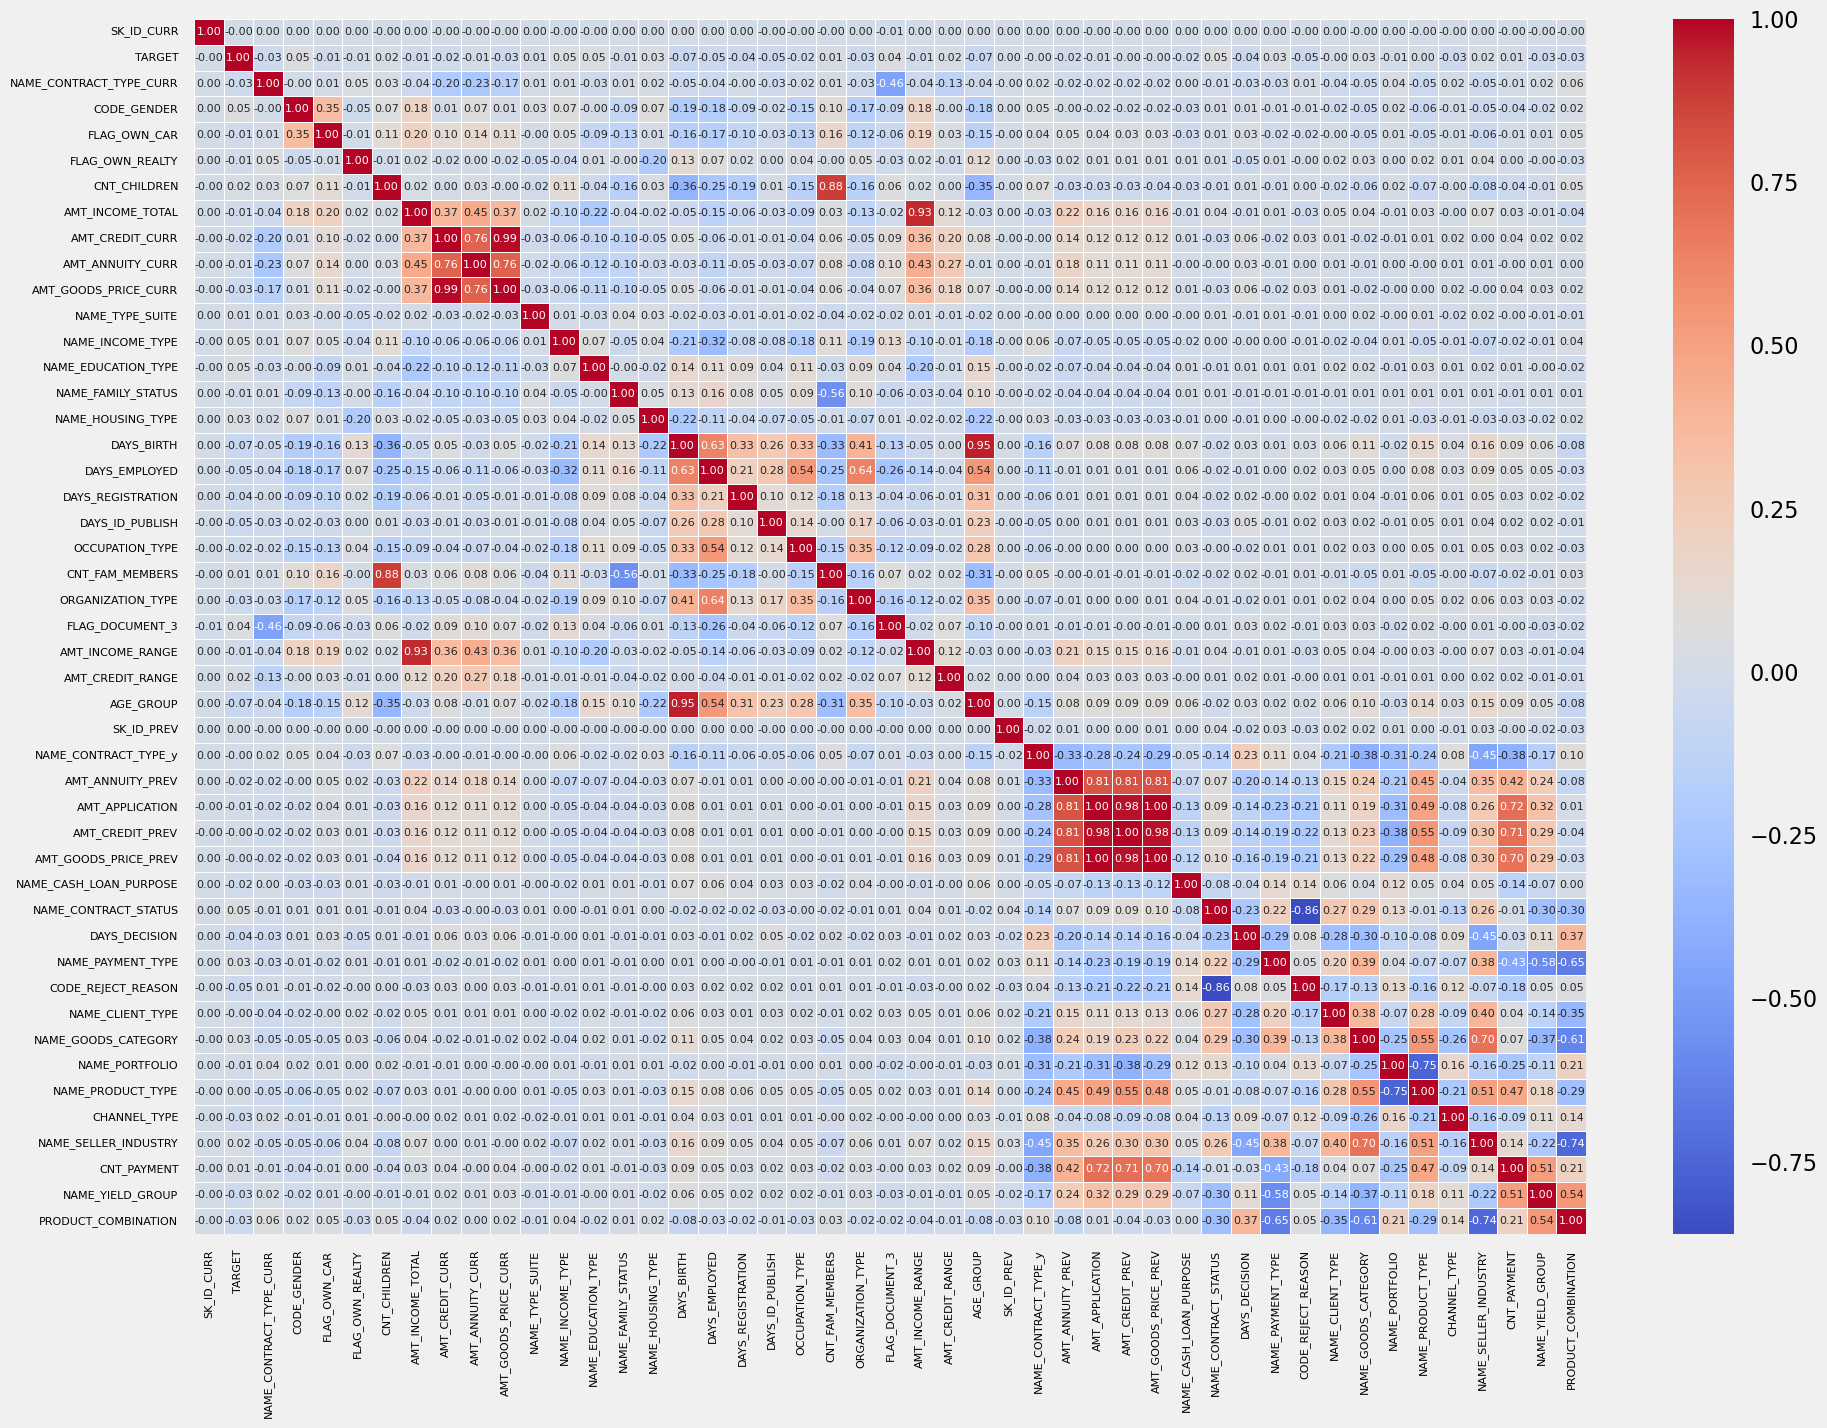

In [304]:
correlation_matrix = loan_process_df.corr()

# Create a heatmap with custom formatting
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", annot_kws={"size": 8})

# Customize column name font size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

# Feature Importance

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc , accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [305]:
x = loan_process_df.drop('TARGET',axis=1)
y = loan_process_df['TARGET']

In [306]:
x

SK_ID_CURR  NAME_CONTRACT_TYPE_CURR  CODE_GENDER  FLAG_OWN_CAR  \
0            100002                        0            1             0   
1            100003                        0            0             0   
2            100003                        0            0             0   
3            100003                        0            0             0   
4            100004                        1            1             1   
...             ...                      ...          ...           ...   
1413696      456255                        0            0             0   
1413697      456255                        0            0             0   
1413698      456255                        0            0             0   
1413699      456255                        0            0             0   
1413700      456255                        0            0             0   

         FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
0                      1             0             2.025         4.065975   
1                      0             0             2.700        12.935025   
2                      0             0             2.700        12.935025   
3                      0             0             2.700        12.935025   
4                      1             0             0.675         1.350000   
...                  ...           ...               ...              ...   
1413696                0             0             1.575         6.750000   
1413697                0             0             1.575         6.750000   
1413698                0             0             1.575         6.750000   
1413699                0             0             1.575         6.750000   
1413700                0             0             1.575         6.750000   

         AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR  NAME_TYPE_SUITE  \
0                 24700.5              351000.0                6   
1                 35698.5             1129500.0                1   
2                 35698.5             1129500.0                1   
3                 35698.5             1129500.0                1   
4                  6750.0              135000.0                6   
...                   ...                   ...              ...   
1413696           49117.5              675000.0                6   
1413697           49117.5              675000.0                6   
1413698           49117.5              675000.0                6   
1413699           49117.5              675000.0                6   
1413700           49117.5              675000.0                6   

         NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                       6                    4                   3   
1                       3                    1                   1   
2                       3                    1                   1   
3                       3                    1                   1   
4                       6                    4                   3   
...                   ...                  ...                 ...   
1413696                 0                    1                   1   
1413697                 0                    1                   1   
1413698                 0                    1                   1   
1413699                 0                    1                   1   
1413700                 0                    1                   1   

         NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        1        9461            637             3648.0   
1                        1       16765           1188             1186.0   
2                        1       16765           1188             1186.0   
3                        1       16765           1188             1186.0   
4                        1       19046            225             4260.0   
...                    ...         ...            ...                

In [307]:
y

0          1
1          0
2          0
3          0
4          0
          ..
1413696    0
1413697    0
1413698    0
1413699    0
1413700    0
Name: TARGET, Length: 1412711, dtype: int64

In [308]:
def model_classification(x,y,algorithm):
    for i in algorithm:
        # Split data
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3) # The training set contains 70% of the data, and the testing set contains 30%

        # Model
        model = i().fit(xtrain,ytrain)

        # Predict for train and test accuracy

        y_train_pred = model.predict(xtrain)
        y_test_pred  = model.predict(xtest)

        # Accuracy score

        training = accuracy_score(ytrain,y_train_pred)
        testing = accuracy_score(ytest,y_test_pred)
        data = {'Algorithm':i.__name__, 'Training Acuuracy':training,'Testing Accuracy':testing}

        print(data)

In [309]:
model_classification(x,y,[DecisionTreeClassifier,ExtraTreesClassifier,RandomForestClassifier])

{'Algorithm': 'DecisionTreeClassifier', 'Training Acuuracy': 1.0, 'Testing Accuracy': 0.9454170933475534}
{'Algorithm': 'ExtraTreesClassifier', 'Training Acuuracy': 1.0, 'Testing Accuracy': 0.9406083800912665}
{'Algorithm': 'RandomForestClassifier', 'Training Acuuracy': 0.9999969663170178, 'Testing Accuracy': 0.9421066788732794}


# DecisionTreeClassifier

In [310]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [311]:
model2 = DecisionTreeClassifier(random_state=42)

In [312]:
model2.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [313]:
predicted_values = model2.predict(xtest)

In [314]:
acc = accuracy_score(ytest,predicted_values)
acc

0.9469213535638823

In [315]:
prec = precision_score(ytest,predicted_values)
prec

0.6850718108659659

In [316]:
recall = recall_score(ytest,predicted_values)
recall

0.722958147094677

In [317]:
f1 = f1_score(ytest,predicted_values)
f1

0.7035052687768135

# ExtraTreeClassifier

In [318]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y, test_size=0.2, random_state=42)

In [319]:
model1 = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [320]:
model1.fit(xtrain, ytrain)

ExtraTreesClassifier(random_state=42)

In [321]:
predicted_values = model1.predict(xtest)

In [322]:
acc = accuracy_score(ytest,predicted_values)
acc

0.942015905543581

In [323]:
prec = precision_score(ytest,predicted_values)
prec

0.9995142683667274

In [324]:
recall = recall_score(ytest,predicted_values)
recall

0.334457537586347

In [325]:
f1 = f1_score(ytest,predicted_values)
f1

0.5012026183589587

# RandomForestClassifier

In [326]:
model6 = RandomForestClassifier(n_estimators=60,random_state=40)

In [327]:
model6.fit(x,y)

RandomForestClassifier(n_estimators=60, random_state=40)

In [328]:
predicted_values = model6.predict(x)

In [329]:
acc = accuracy_score(y,predicted_values)
acc

0.9999518655974222

In [330]:
prec = precision_score(y,predicted_values)
prec

1.0

In [331]:
recall = recall_score(y,predicted_values)
recall

0.9994437582311512

In [332]:
f1 = f1_score(y,predicted_values)
f1

0.9997218017428303

# Save Model

In [333]:
import pickle
with open("risk.pkl",'wb') as f:
    pickle.dump(model6,f)

In [2]:
import pickle
with open('risk.pkl', 'rb') as f:
    pick_model6 = pickle.load(f)

In [335]:
pick_model6

RandomForestClassifier(n_estimators=60, random_state=40)

In [4]:
import numpy as np
data_input = np.array([[100002,0,1,0,1,0,2.025,4.065975,24700.5,351000.0,6,6,4,3,1,9461,637,3648.0,2120,8,1.0,5,1,3,5,1,1038818,1,9251.775,179055.0,179055.0,179055.0,23,0,606,3,7,0,24,3,0,7,0,24.0,3,15]])

In [5]:
priedicted = pick_model6.predict(data_input)

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [6]:
if priedicted == 0.0:
    print('Repayer')
else:
    print('Defaulter')

Defaulter


In [339]:
x.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_CURR', 'AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'FLAG_DOCUMENT_3', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AGE_GROUP',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_PREV',
       'AMT_APPLICATION', 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_CO